In [ ]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset
!unzip "/content/cardiovascular-diseases-risk-prediction-dataset.zip" -d "/content"

Dataset URL: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 118MB/s]
Archive:  /content/cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: /content/CVD_cleaned.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/CVD_cleaned.csv")

In [ ]:
copy_df = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul



*   Our focus is on disease prediction through multivariate analysis, specifically targeting conditions such as heart disease, skin cancer, and depression.



In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
focus_cols = ["Heart_Disease", "Skin_Cancer", "Depression", "Diabetes", "Arthritis", "Other_Cancer"]

In [ ]:
axes = []
for i in range(2):
  for j in range(3):
    tup = (i, j)
    axes.append(tup)

In [ ]:
axes

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

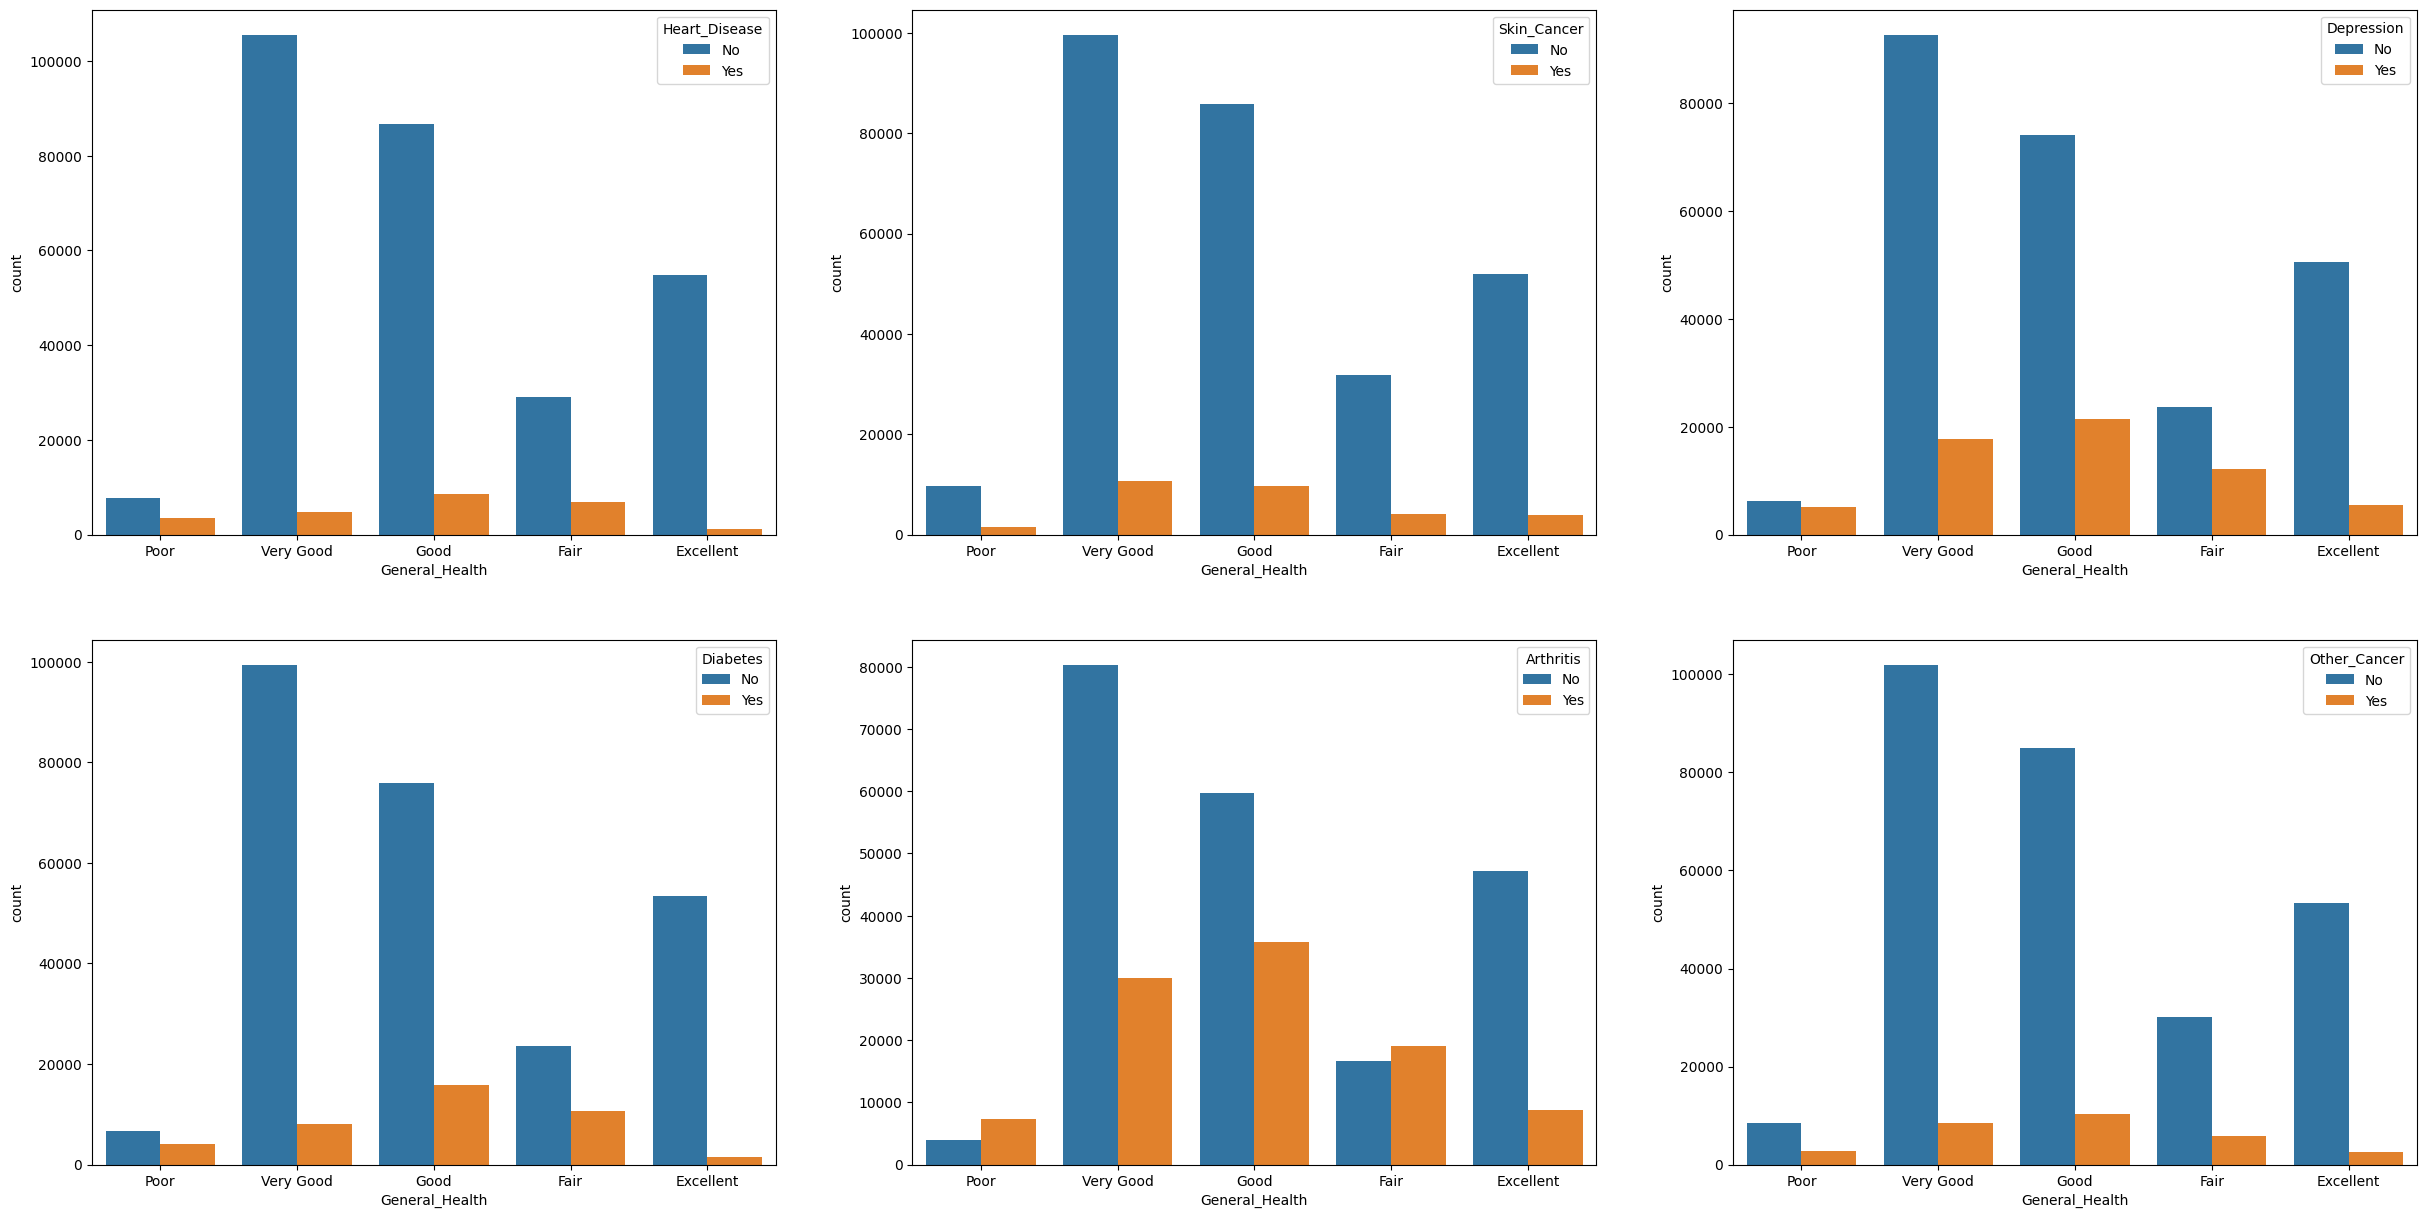

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  sns.countplot(data = df, x = "General_Health", hue = focus_cols[k], hue_order = ["No", "Yes"], ax = ax[i, j])
  k = k+1



*   The bar plot appears somewhat biased, as it shows that individuals in good health are more likely to have a disease compared to those in poor health. This bias is likely due to the imbalance in the data regarding general health.


In [ ]:
health_categories = df.General_Health.value_counts().index

In [ ]:
focus_cols

['Heart_Disease',
 'Skin_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Other_Cancer']

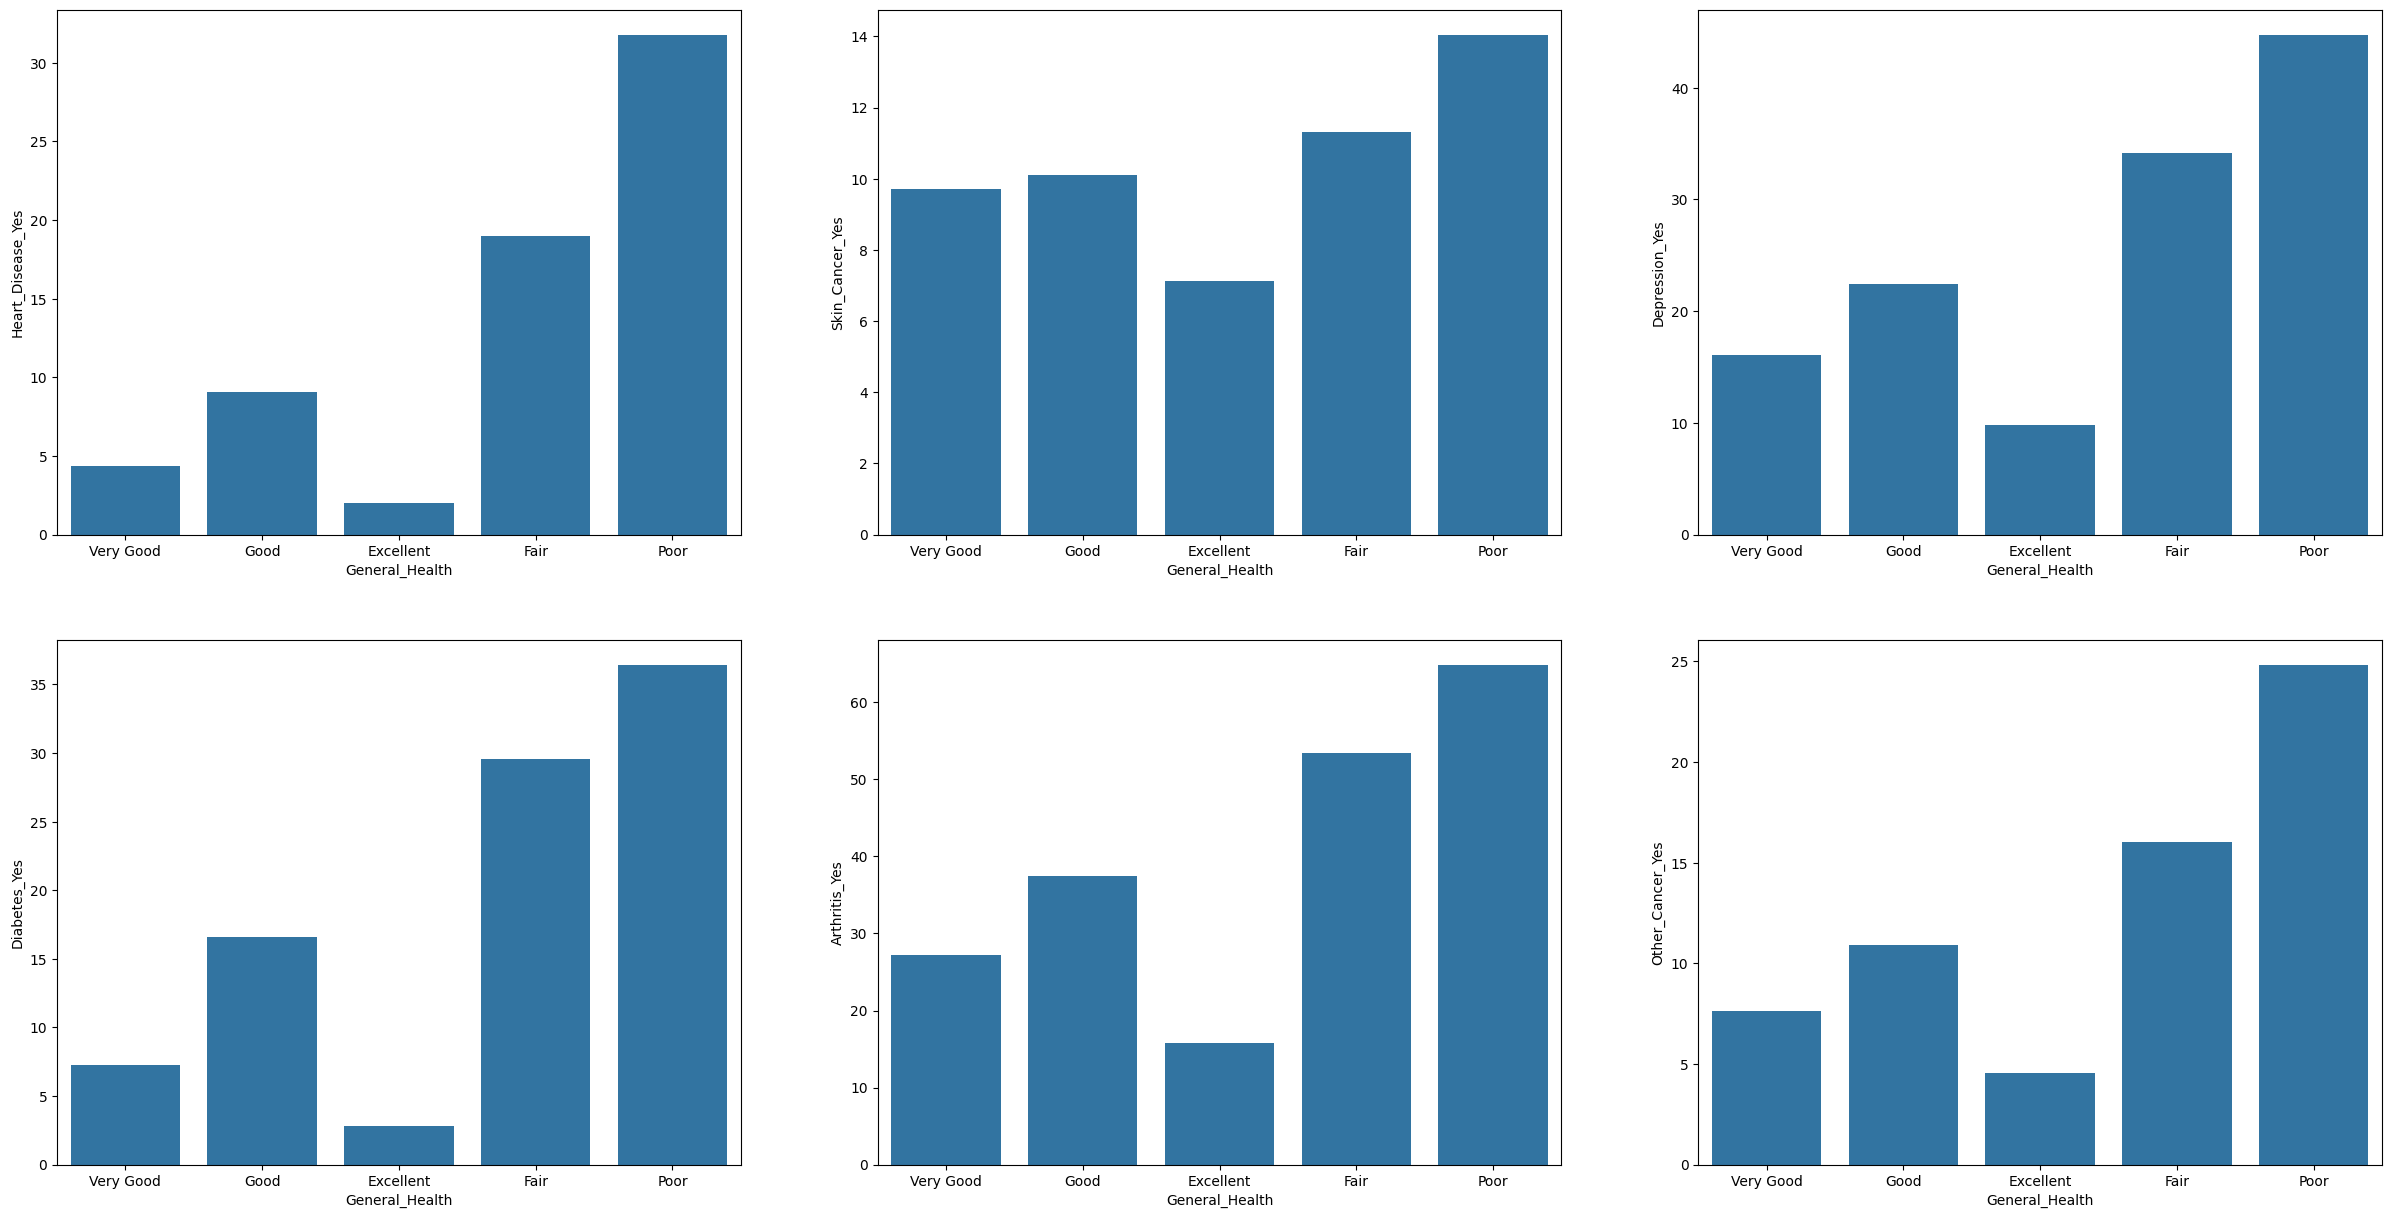

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["General_Health", f"{focus_cols[k]}_Yes"])
  for c in range(len(health_categories)):
    temp = df.groupby("General_Health")[focus_cols[k]].value_counts()[health_categories[c]]
    disease_df.loc[c] = [health_categories[c], ((temp/temp.sum())*100)["Yes"]]
  sns.barplot(data = disease_df, x = "General_Health", y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
  k = k+1



*   After comparing the percentages, we can see that the poor health category is likely to be associated with major diseases.



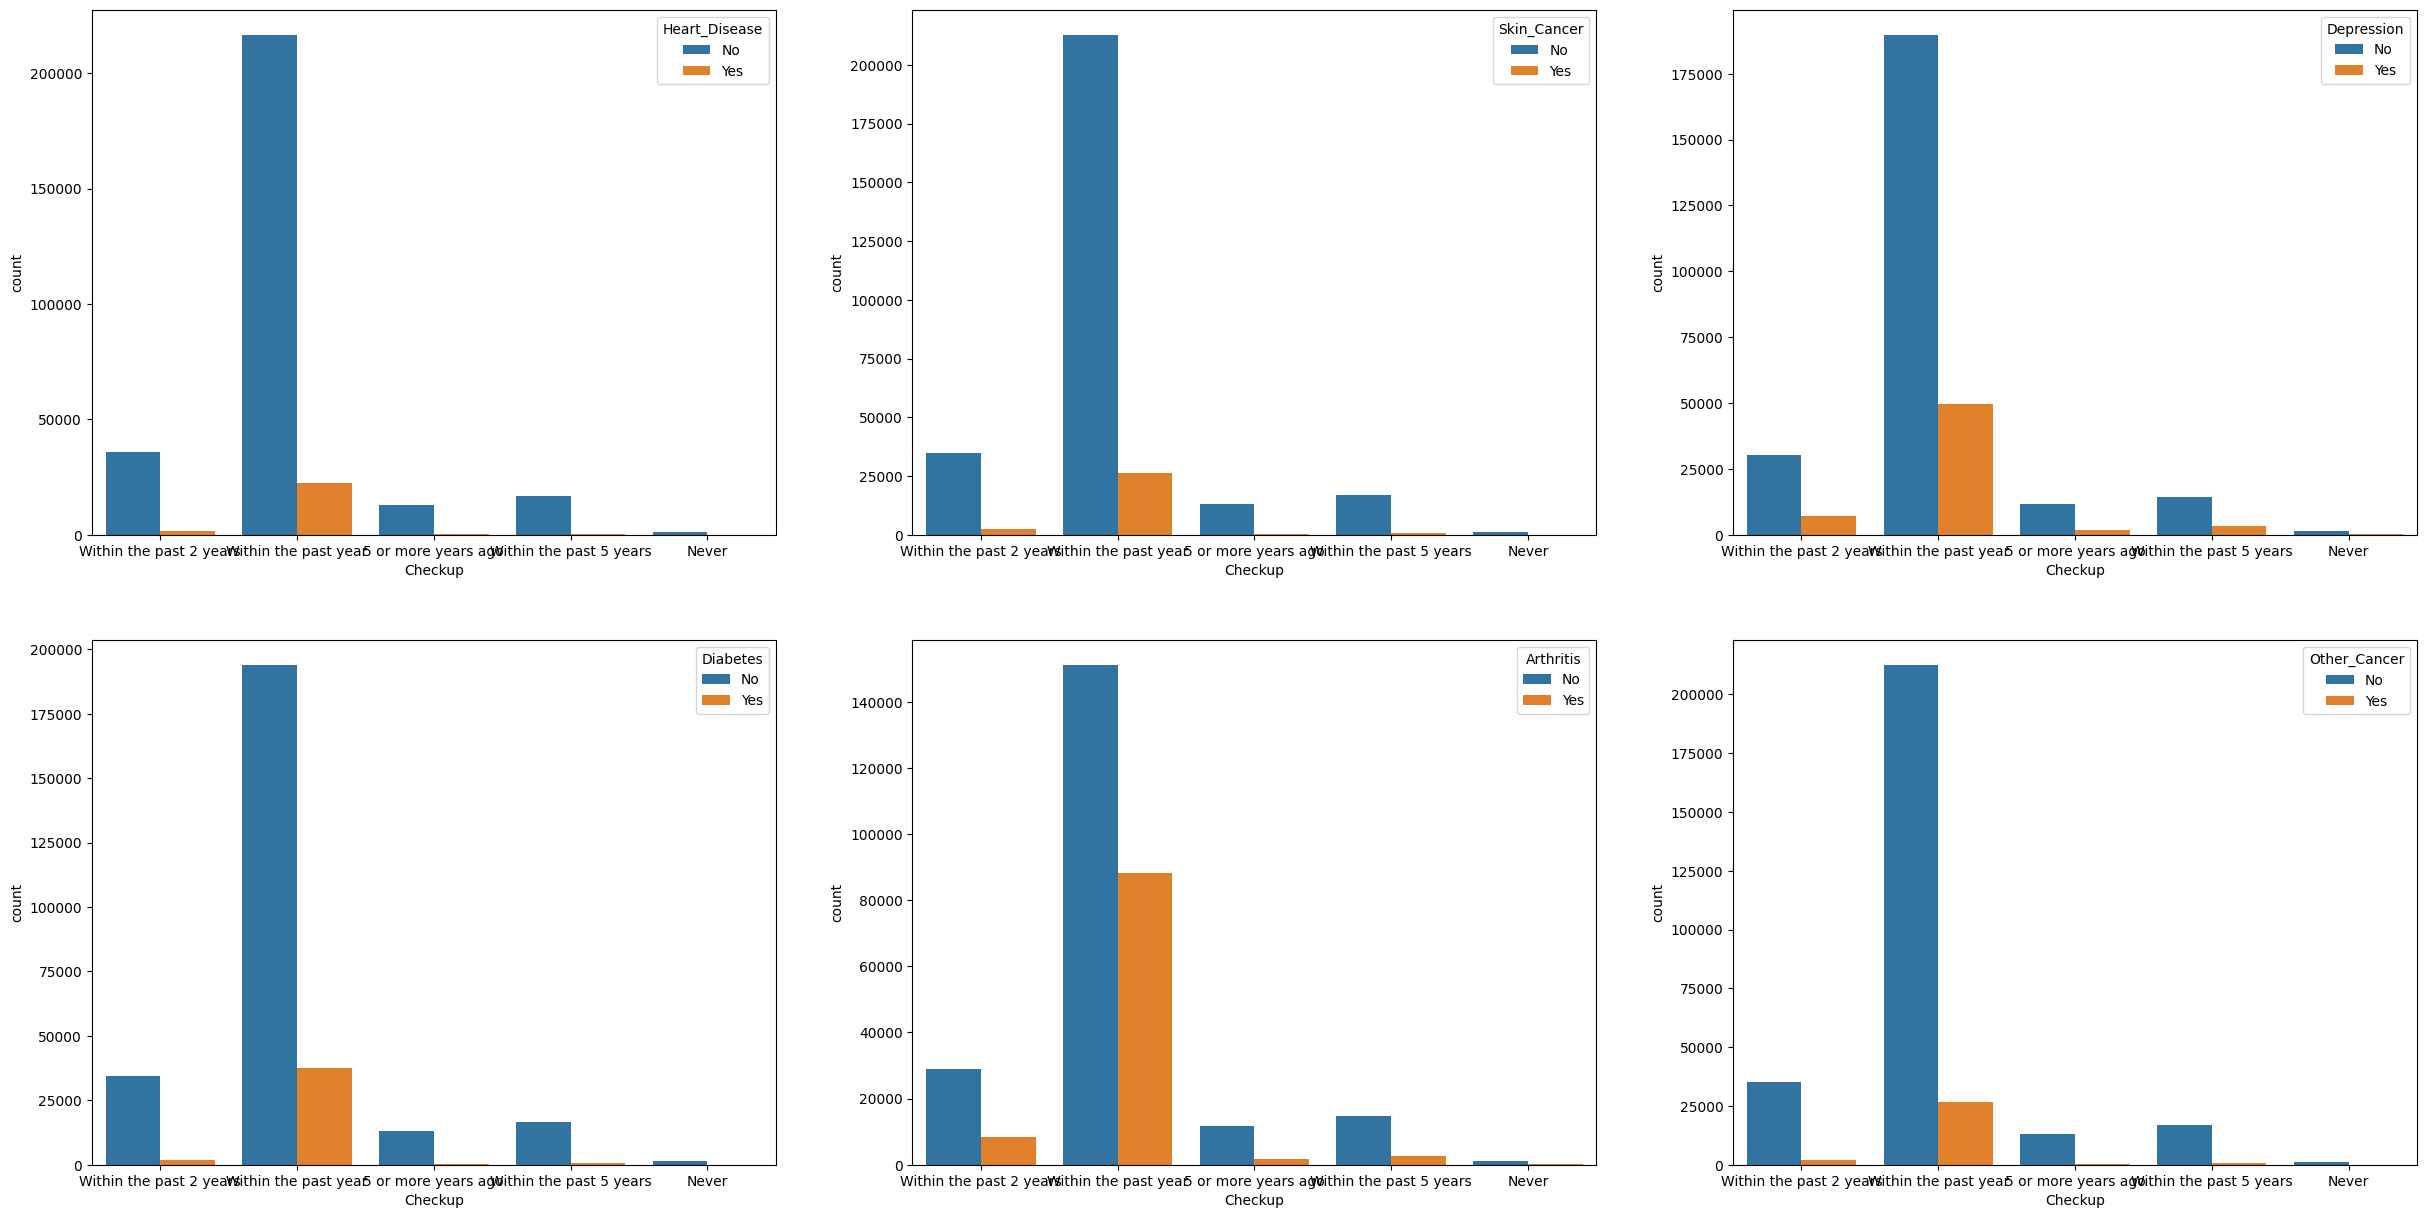

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  sns.countplot(data = df, x = "Checkup", hue = focus_cols[k], hue_order = ["No", "Yes"], ax = ax[i, j])
  k = k+1

In [ ]:
checkup_cat = df["Checkup"].value_counts().index

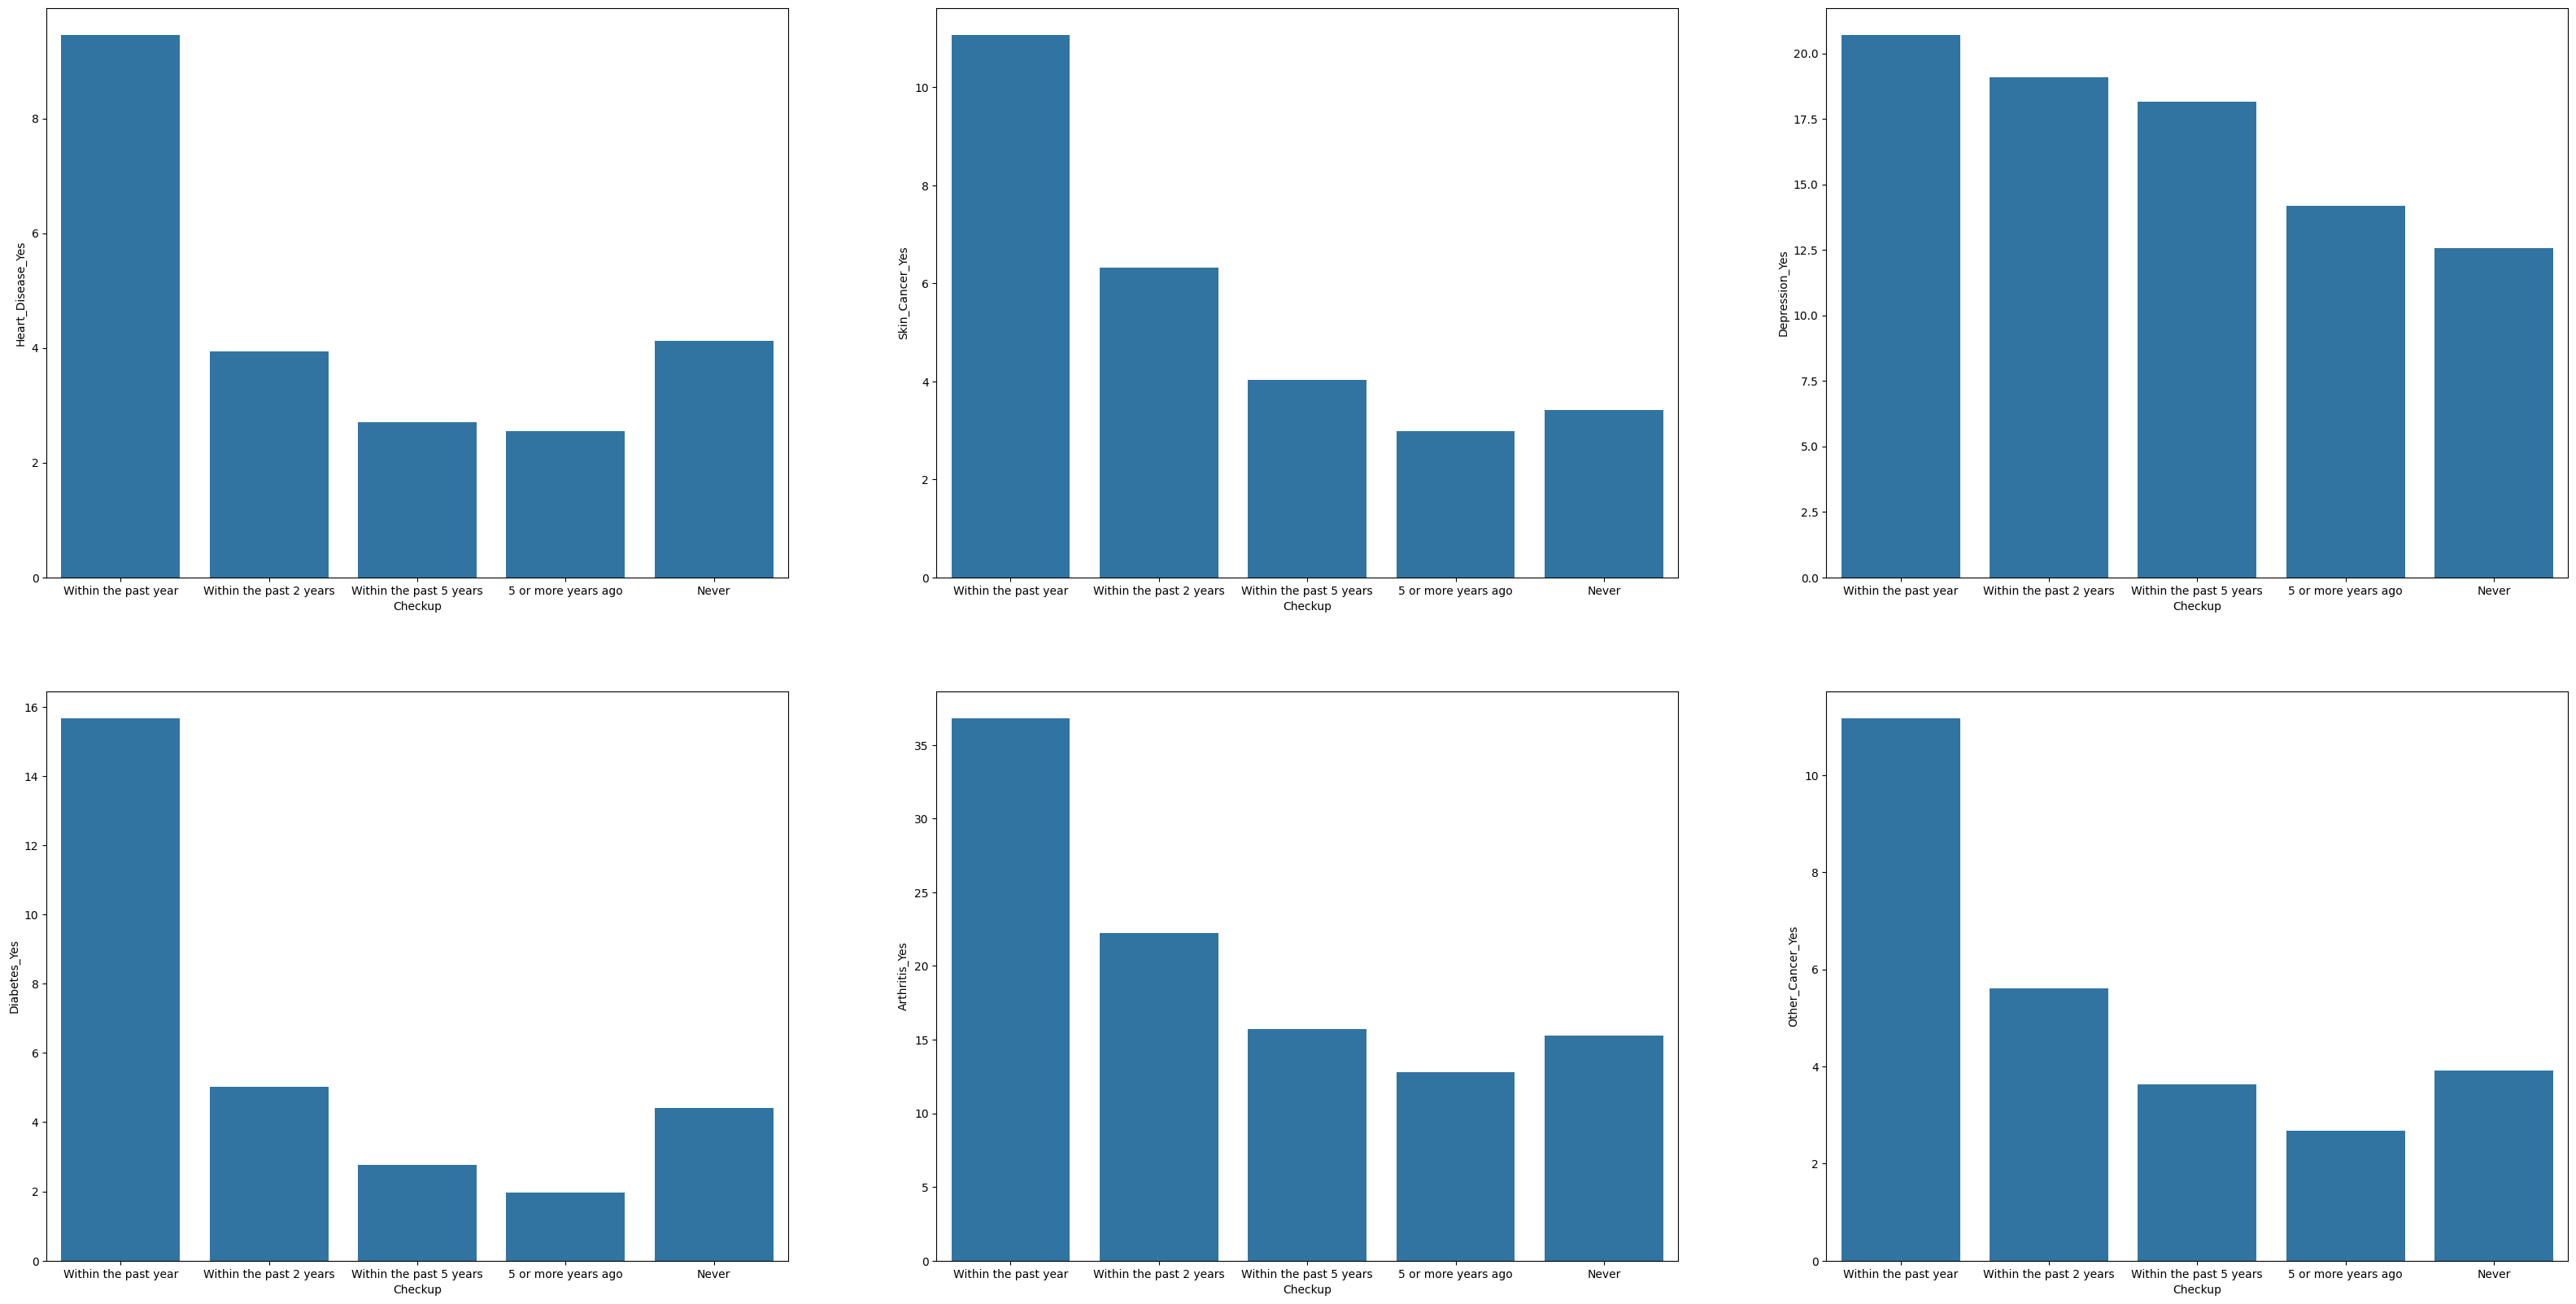

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["Checkup", f"{focus_cols[k]}_Yes"])
  for c in range(len(checkup_cat)):
    temp = df.groupby("Checkup")[focus_cols[k]].value_counts()[checkup_cat[c]]
    disease_df.loc[c] = [checkup_cat[c], ((temp/temp.sum())*100)["Yes"]]
  sns.barplot(data = disease_df, x = "Checkup", y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
  k = k+1



*   This data shows people who have had checkups in the past year are more likely to have diseases. This correlation may exist because individuals who are sick are more inclined to seek yearly checkups.



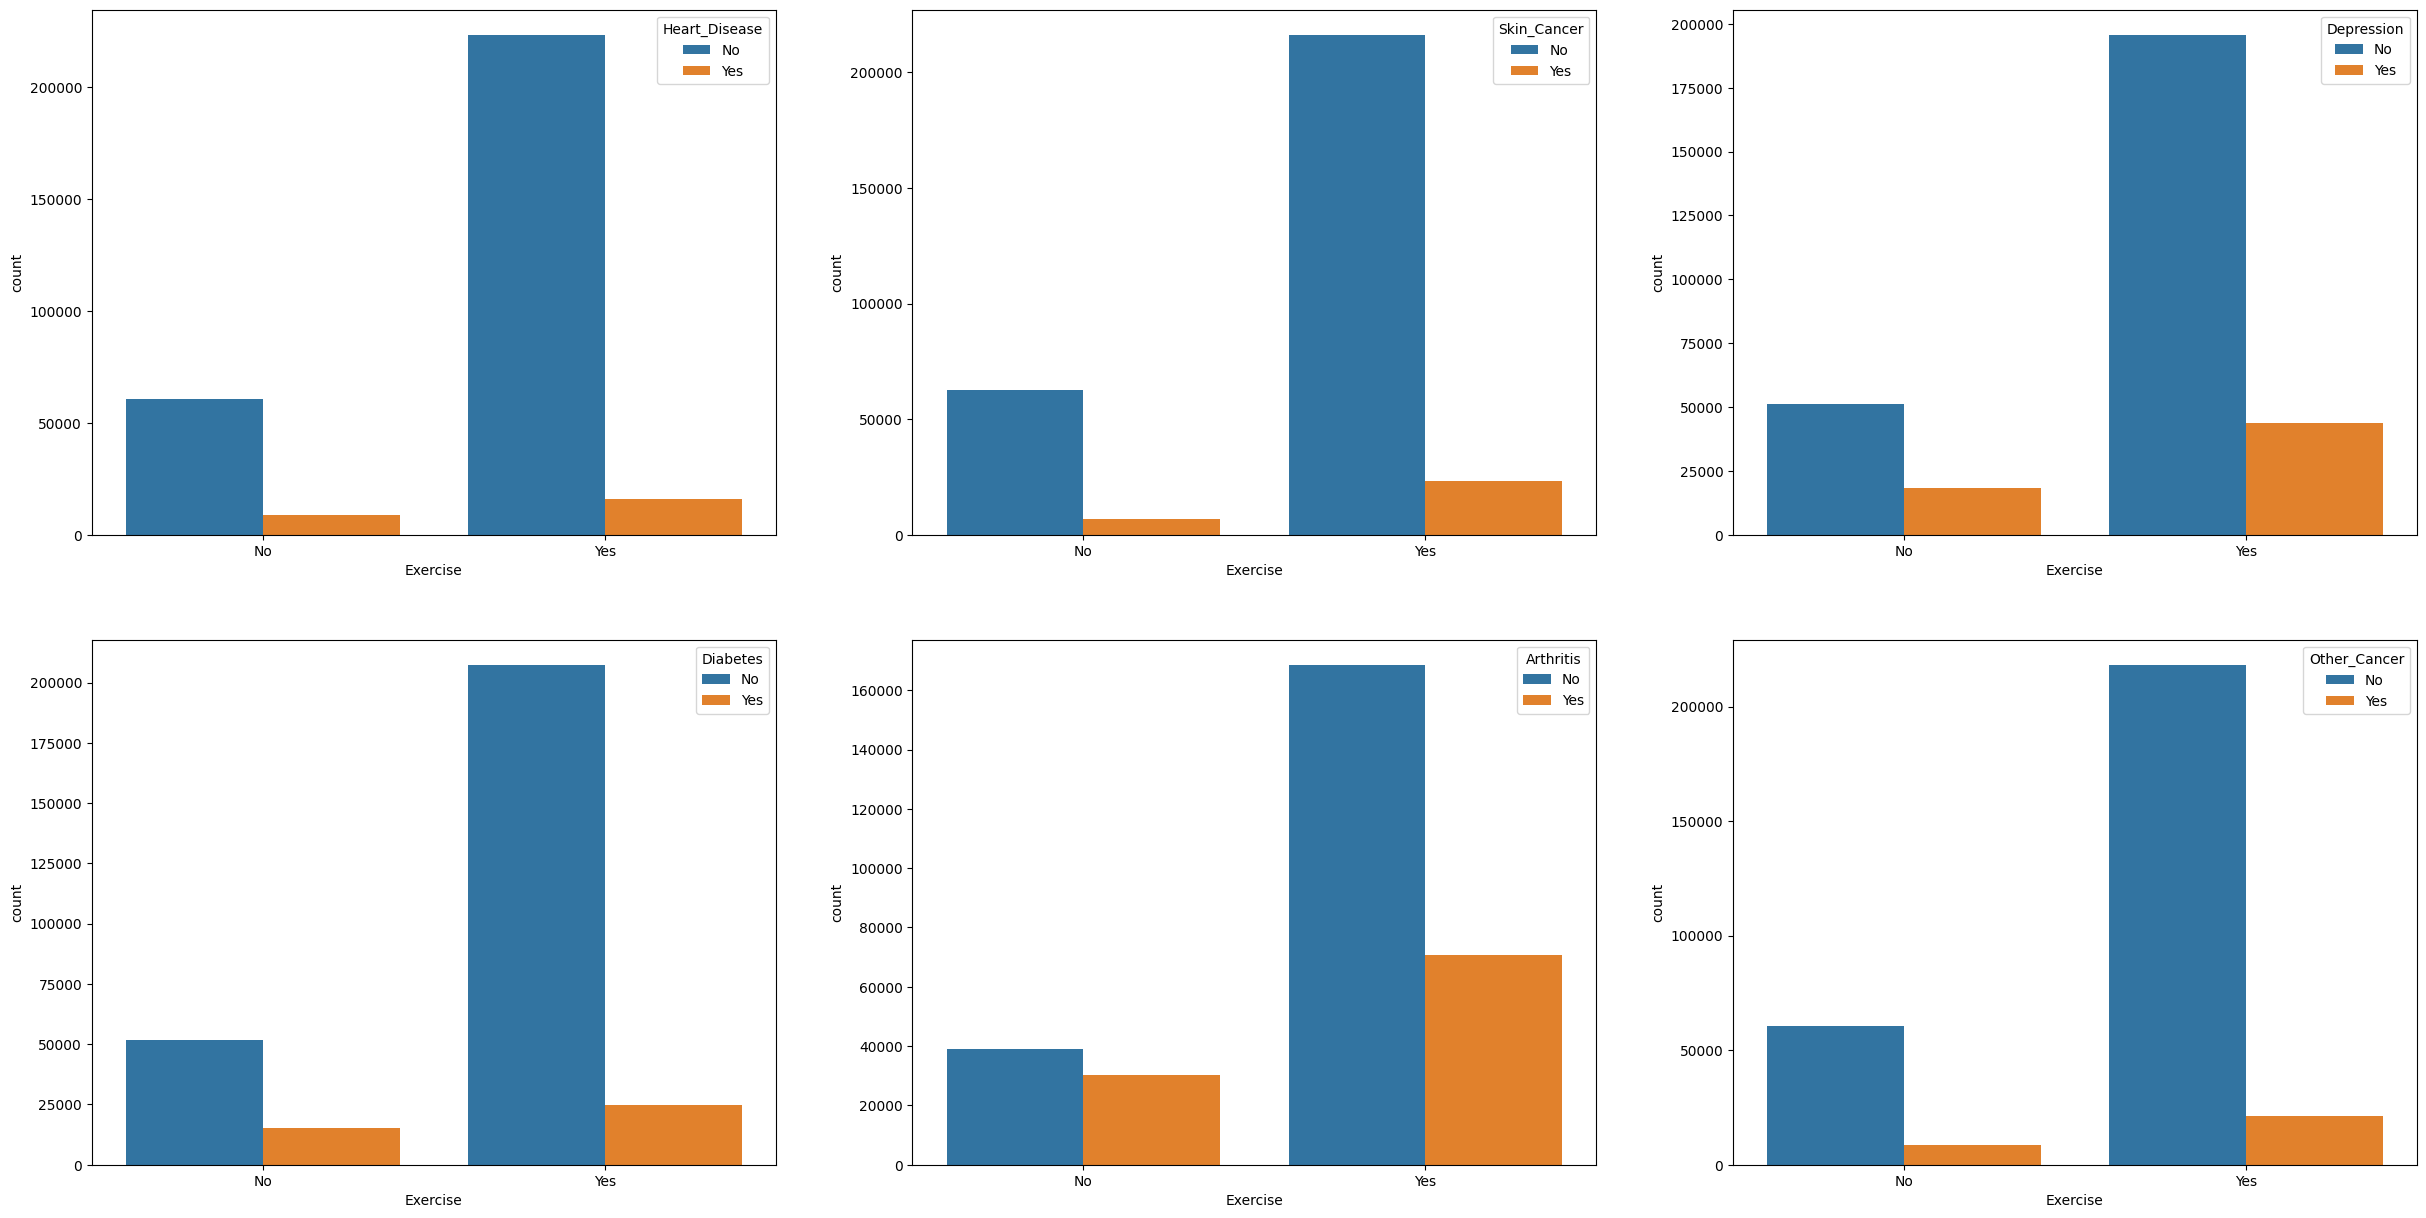

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  sns.countplot(data = df, x = "Exercise", hue = focus_cols[k], hue_order = ["No", "Yes"], ax = ax[i, j])
  k = k+1

In [ ]:
exercise_cat = df["Exercise"].value_counts().index

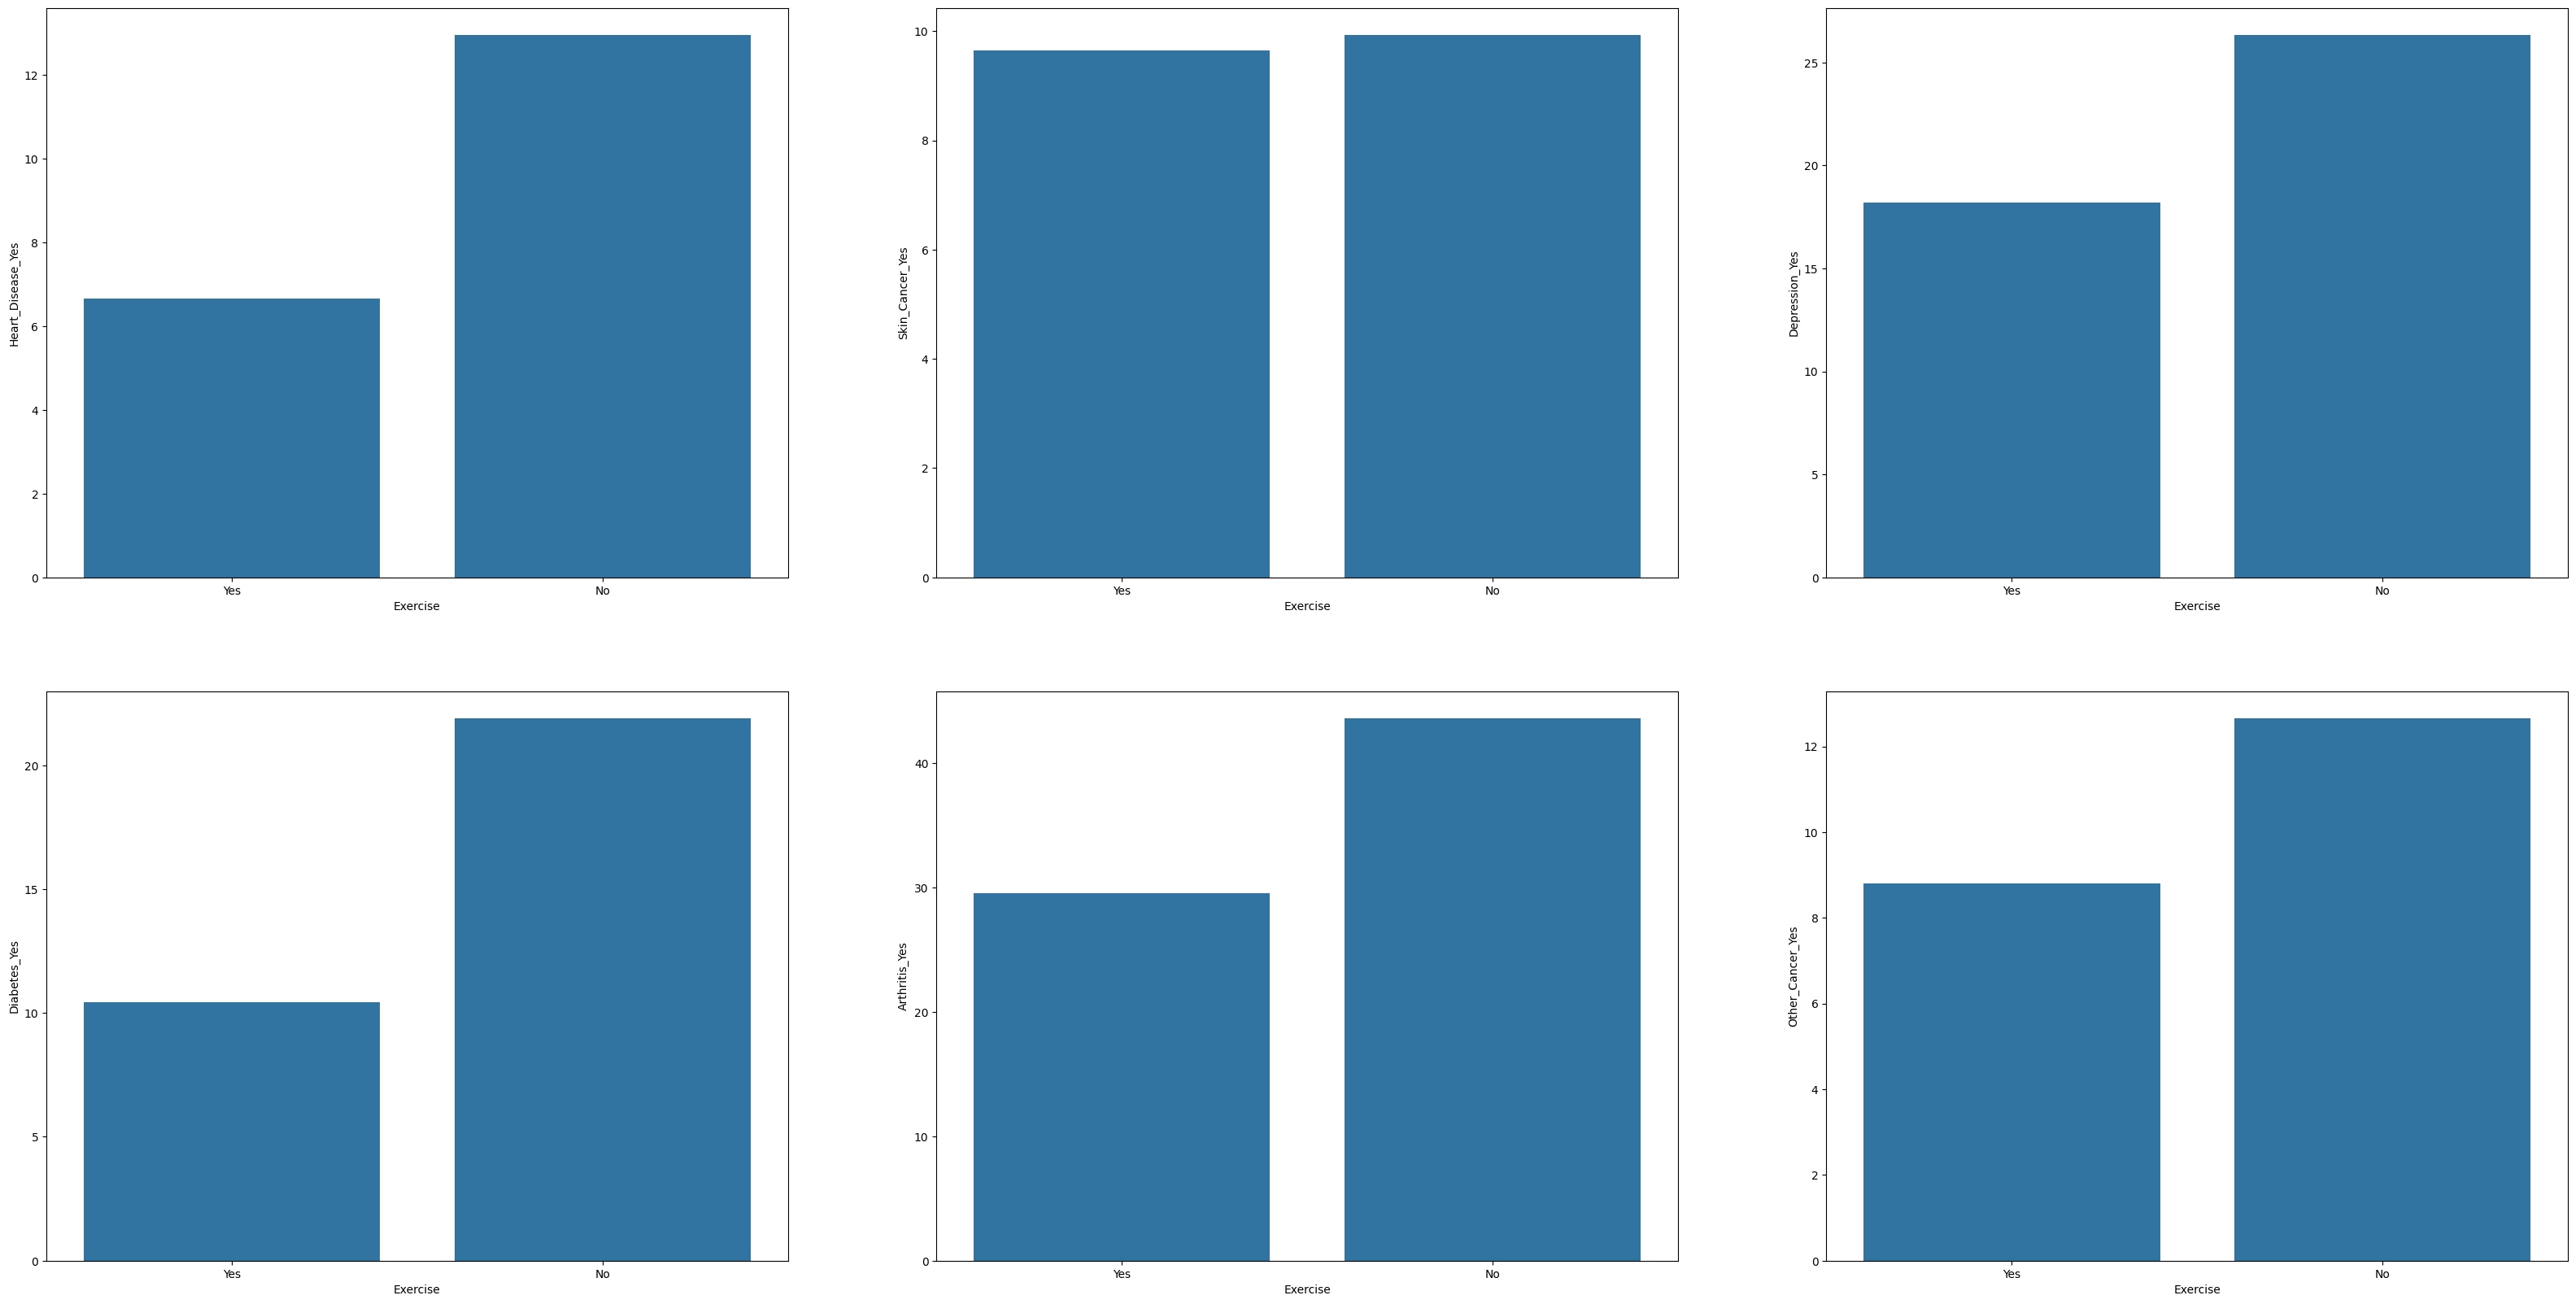

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["Exercise", f"{focus_cols[k]}_Yes"])
  for c in range(len(exercise_cat)):
    temp = df.groupby("Exercise")[focus_cols[k]].value_counts()[exercise_cat[c]]
    disease_df.loc[c] = [exercise_cat[c], ((temp/temp.sum())*100)["Yes"]]
  sns.barplot(data = disease_df, x = "Exercise", y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
  k = k+1



*   The data indicate that exercise has a low correlation with skin cancer risk. While exercise can boost the immune system and improve overall health, it does not directly prevent skin cancer.


In [ ]:
heart_cat = df["Heart_Disease"].value_counts().index

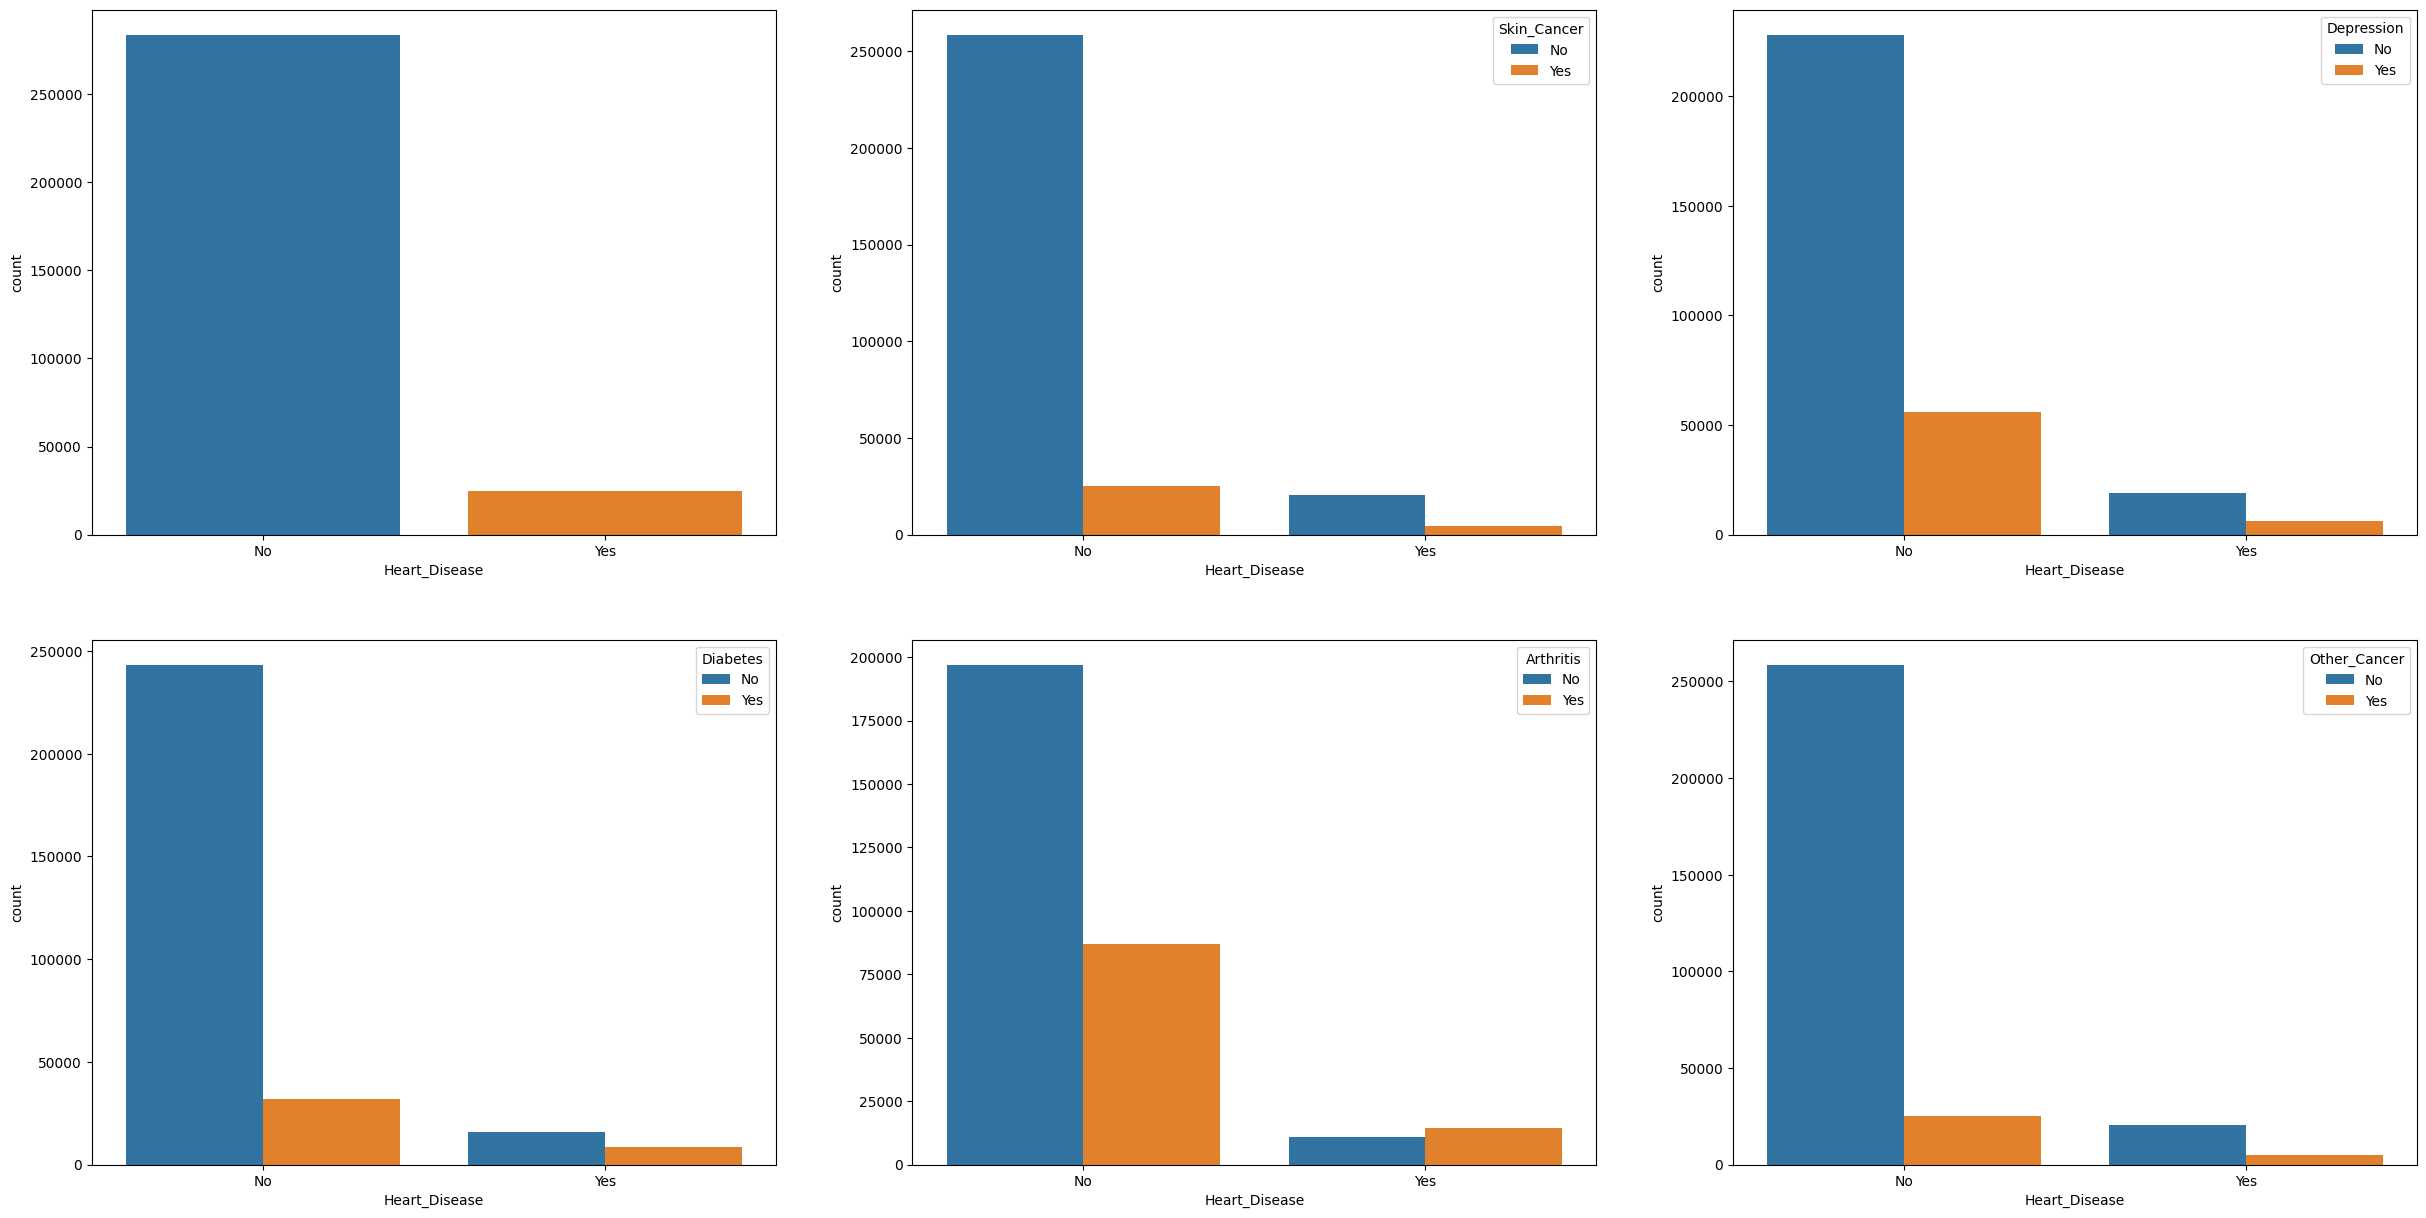

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  sns.countplot(data = df, x = "Heart_Disease", hue = focus_cols[k], hue_order = ["No", "Yes"], ax = ax[i, j])
  k = k+1

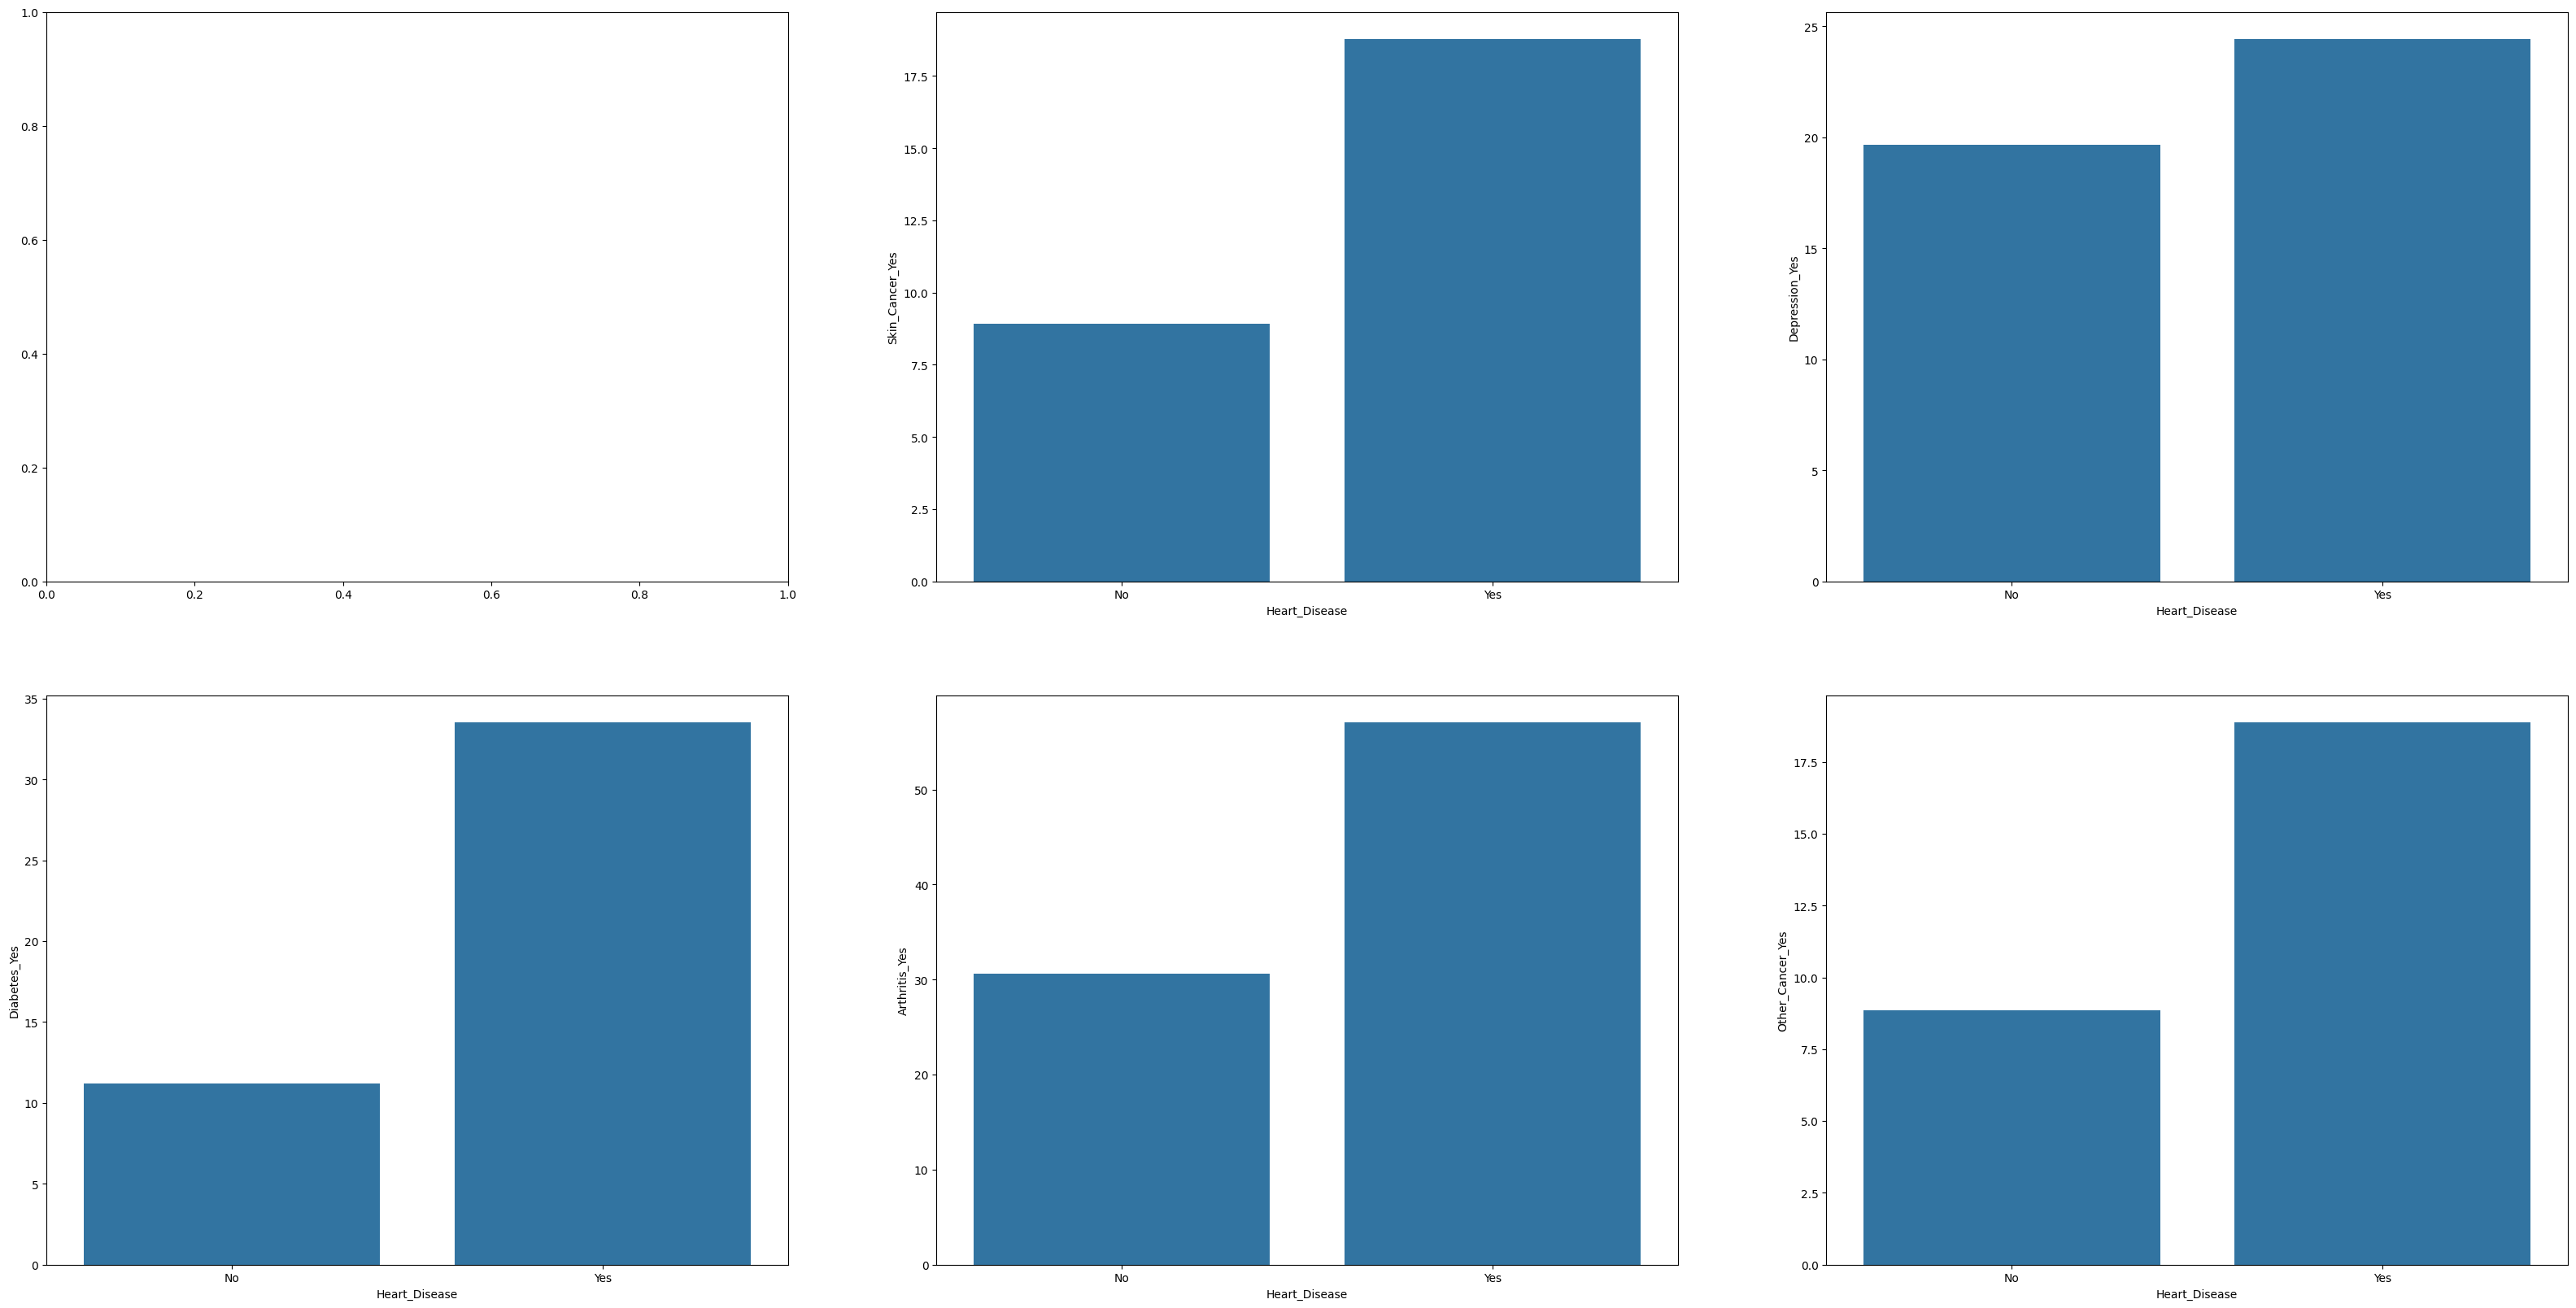

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["Heart_Disease", f"{focus_cols[k]}_Yes"])
  try:
    for c in range(len(heart_cat)):
      temp = df.groupby("Heart_Disease")[focus_cols[k]].value_counts()[heart_cat[c]]
      disease_df.loc[c] = [heart_cat[c], ((temp/temp.sum())*100)["Yes"]]
    sns.barplot(data = disease_df, x = "Heart_Disease", y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
  except:
    pass
  finally:
    k = k+1



*   The graphs indicate that, unlike depression, other diseases show a positive correlation when heart disease is present. This suggests that there may be some bias in the data.

In [ ]:
df.groupby("Heart_Disease")[focus_cols[0]].value_counts()

,count
Heart_Disease,
No,283883
Yes,24971


In [ ]:
try:
  print("YO")

except:
  print("NO")

finally:
  print("Works everytime")

YO
Works everytime


In [ ]:
skin_cat = df.Skin_Cancer.value_counts().index

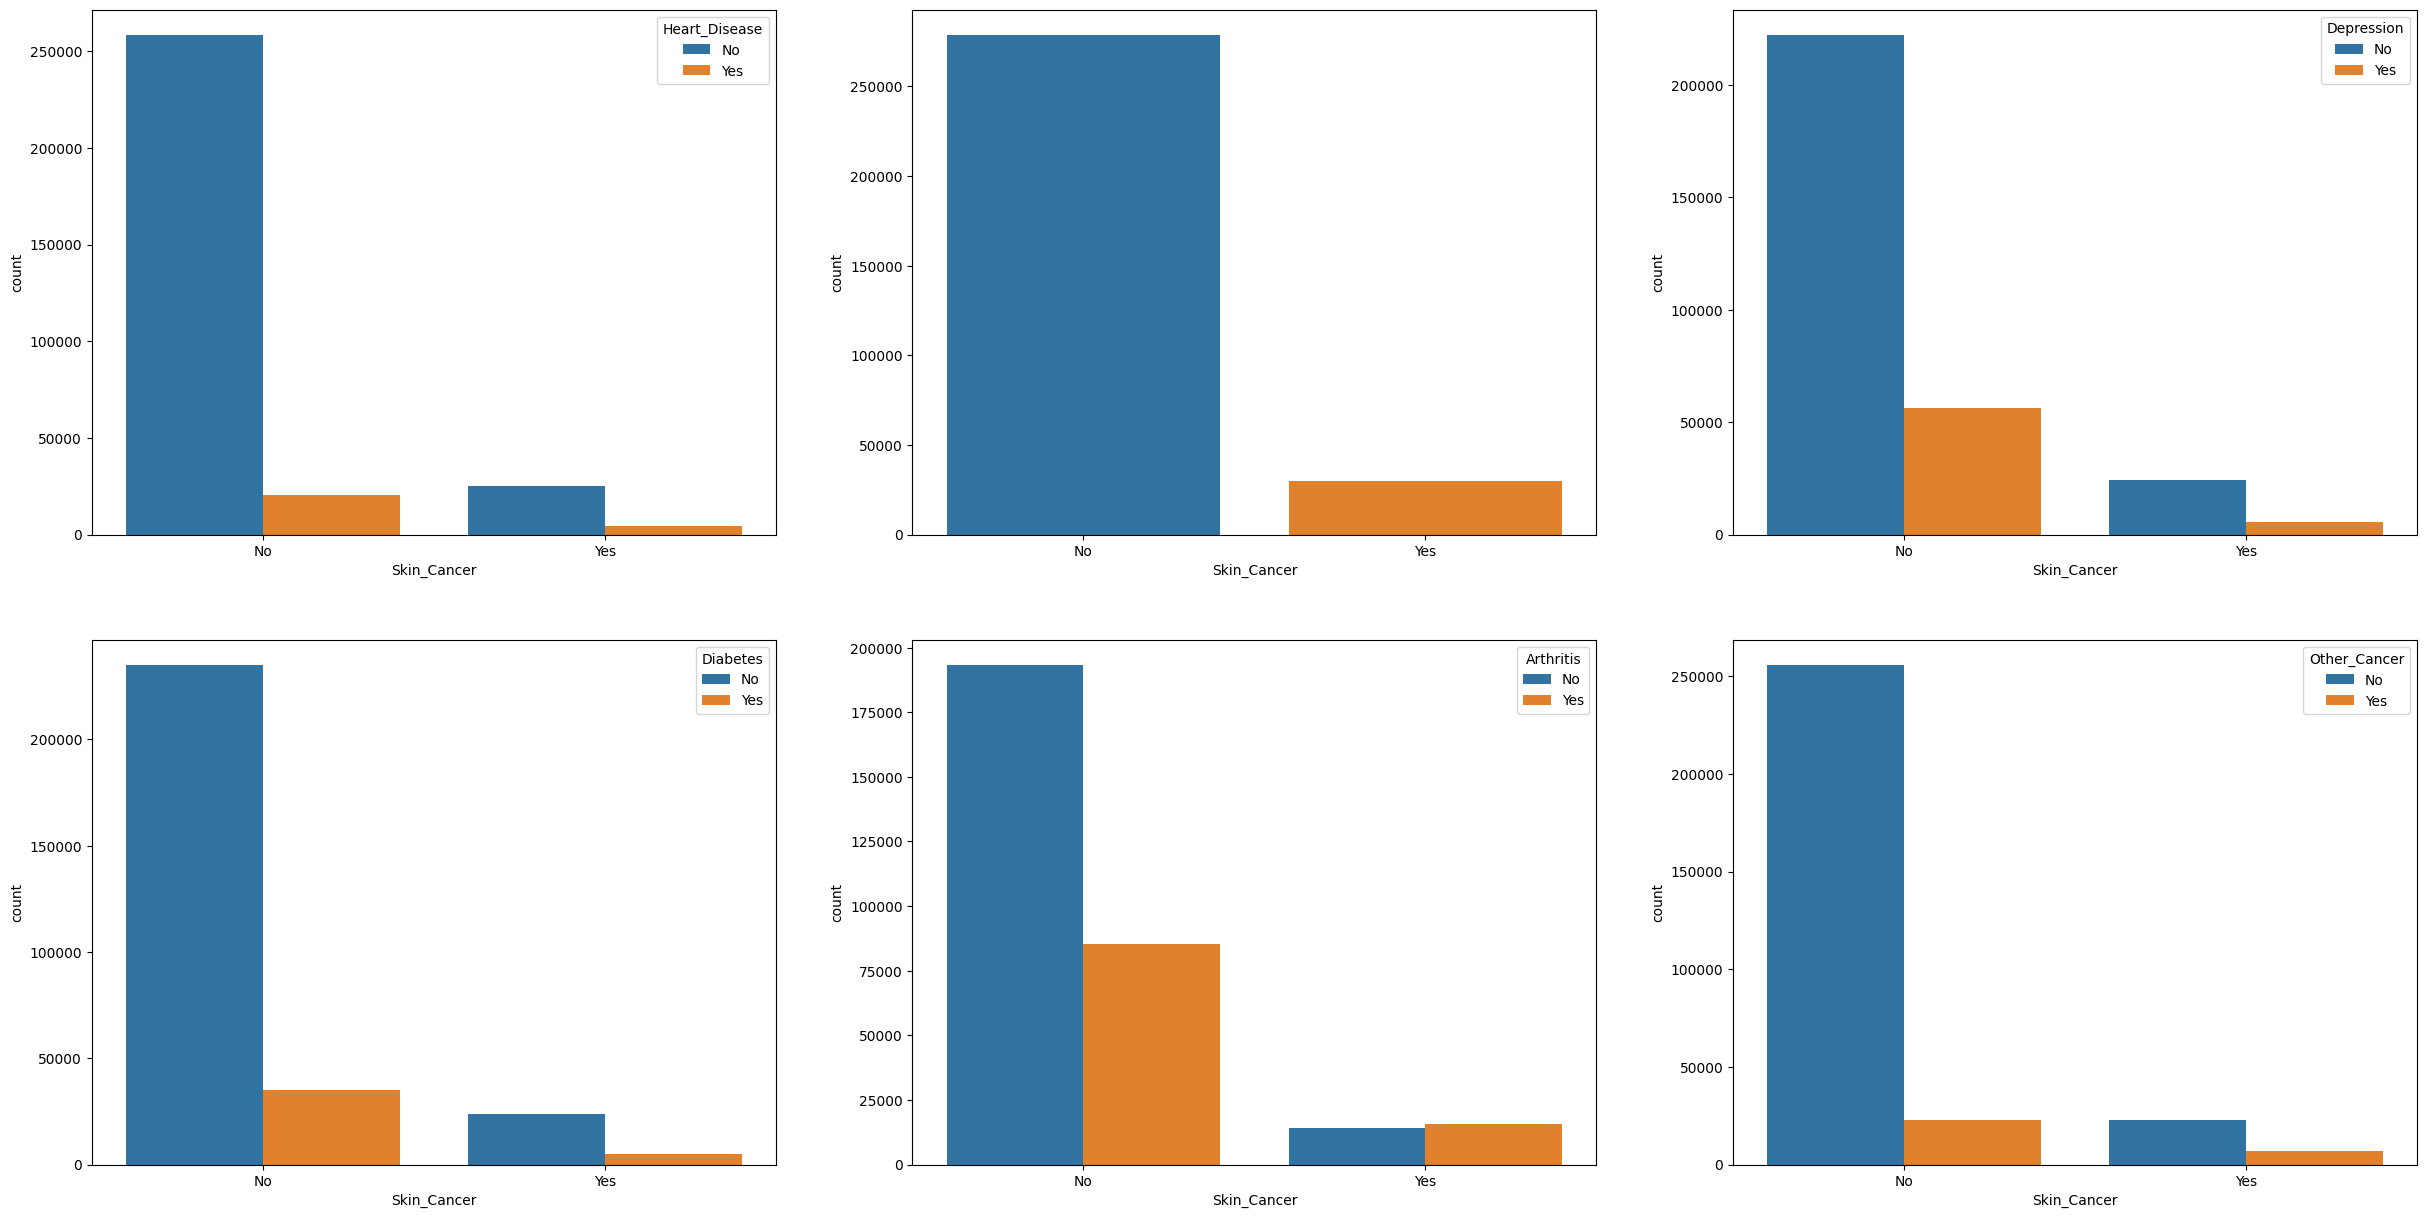

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30,15))
k = 0
for i, j in axes:
  sns.countplot(data = df, x = "Skin_Cancer", hue = focus_cols[k], hue_order = ["No", "Yes"], ax = ax[i, j])
  k = k+1

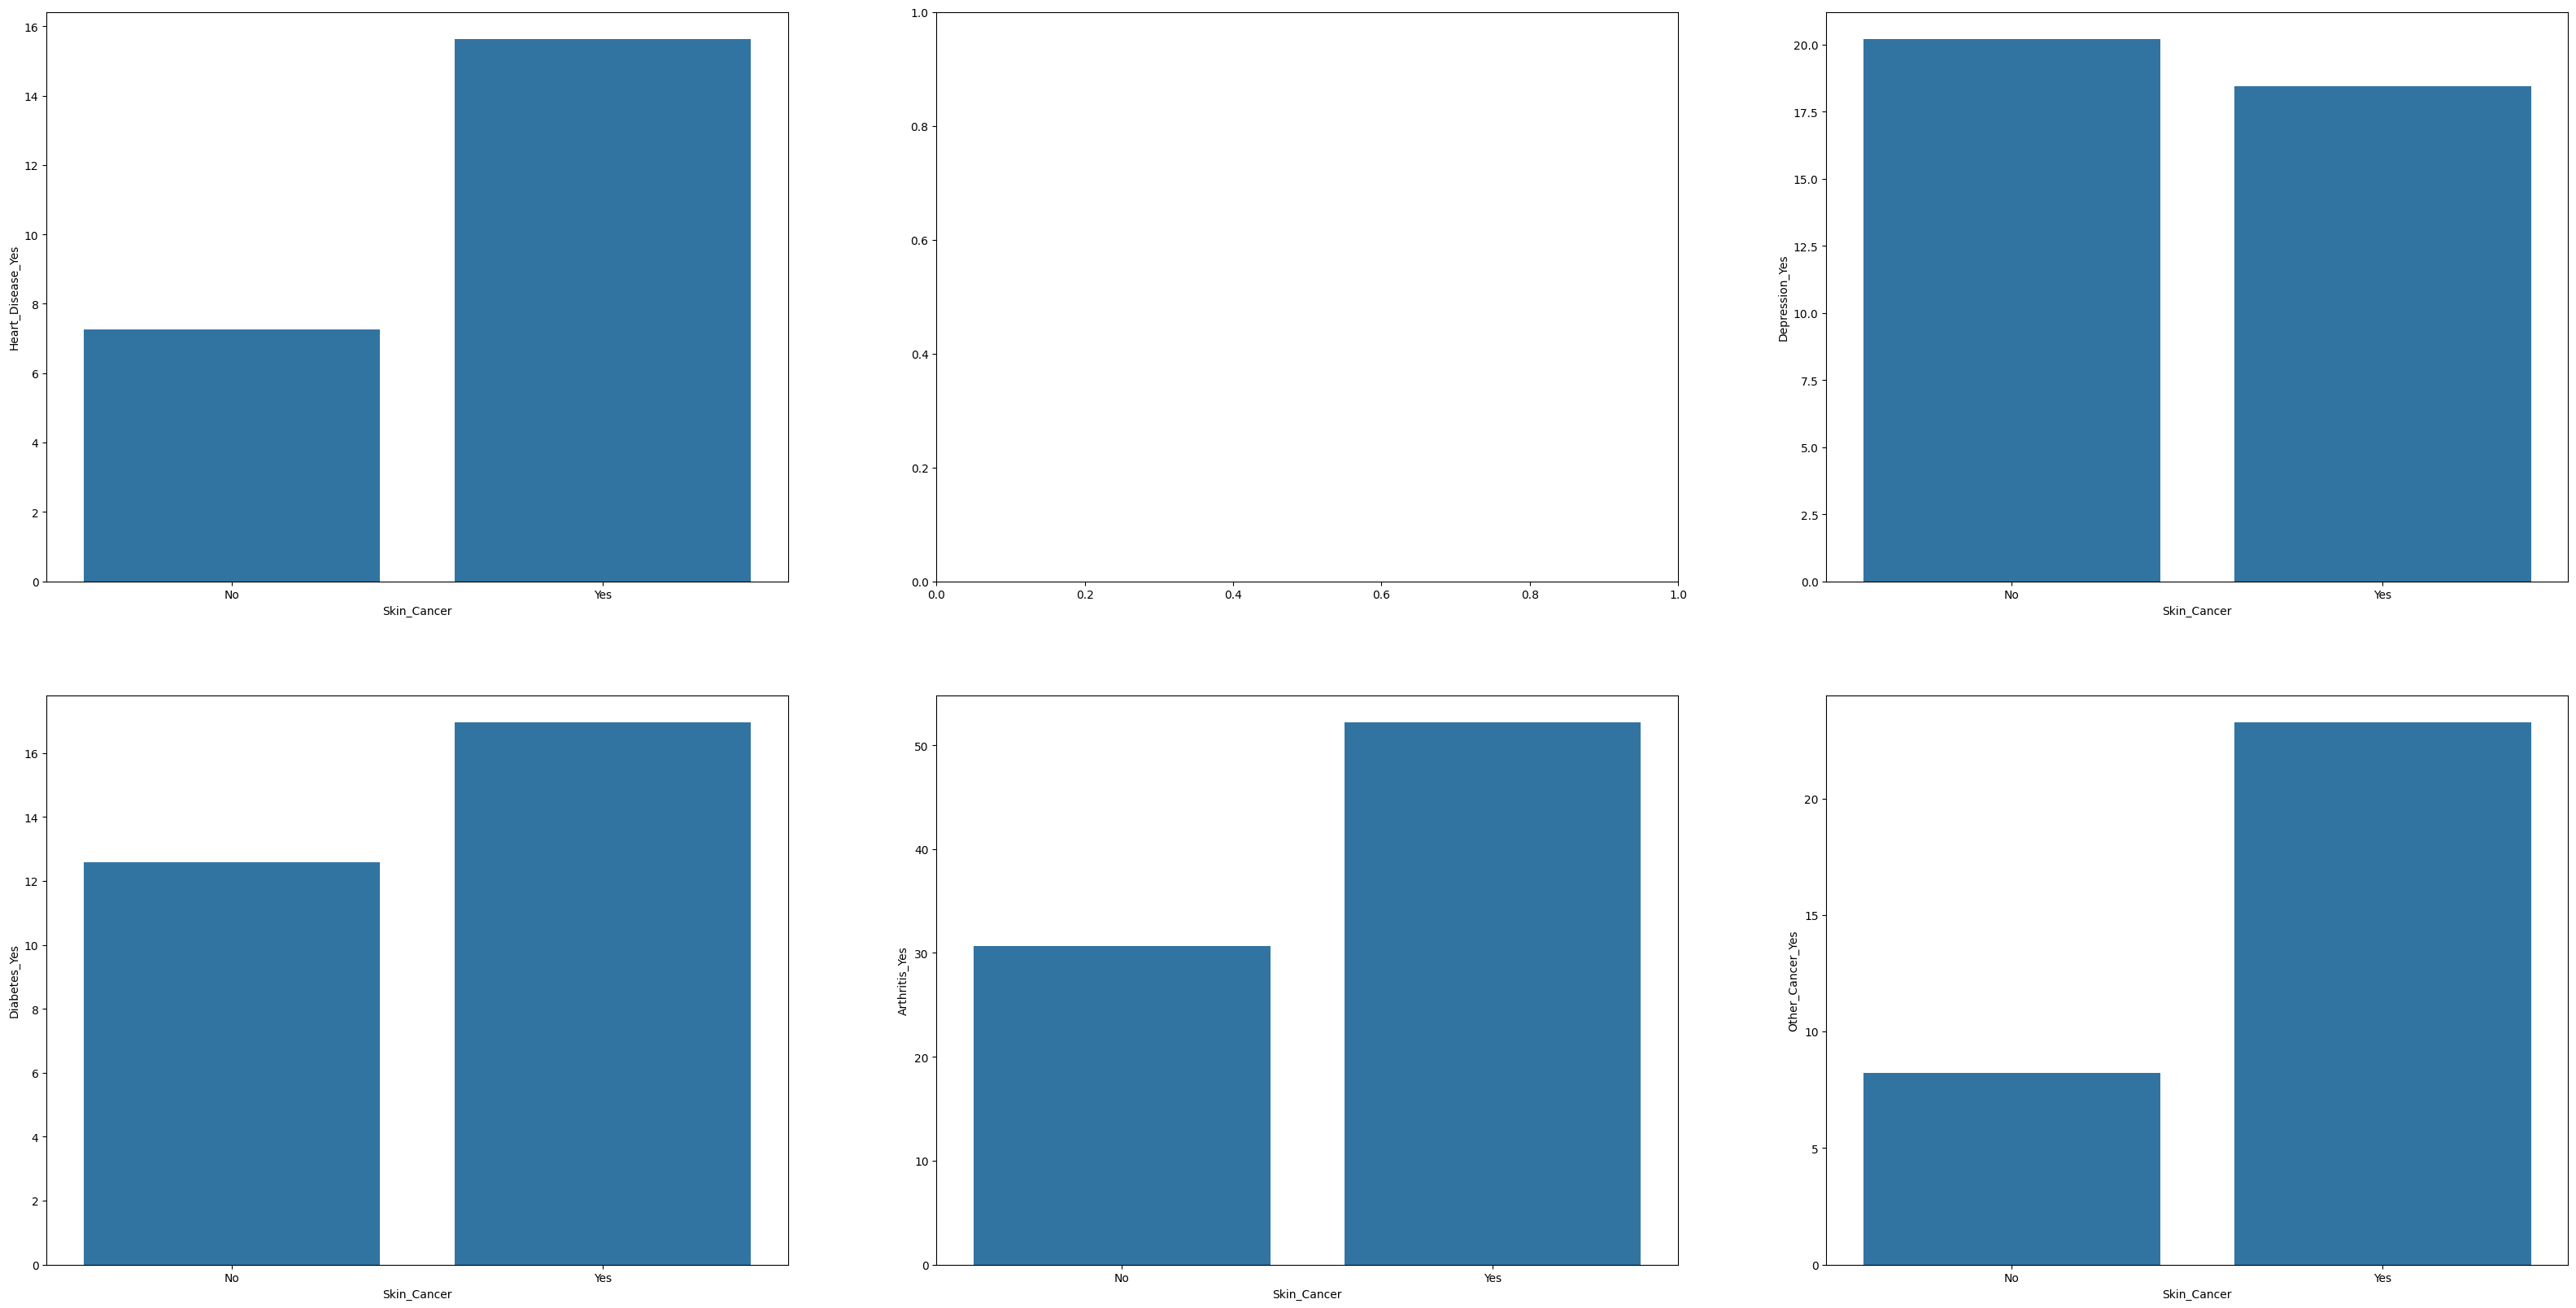

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["Skin_Cancer", f"{focus_cols[k]}_Yes"])
  try:
    for c in range(len(skin_cat)):
      temp = df.groupby("Skin_Cancer")[focus_cols[k]].value_counts()[skin_cat[c]]
      disease_df.loc[c] = [skin_cat[c], ((temp/temp.sum())*100)["Yes"]]
    sns.barplot(data = disease_df, x = "Skin_Cancer", y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
  except:
    pass
  finally:
    k = k+1



*   Skin cancer also shows a positive correlation with other diseases.



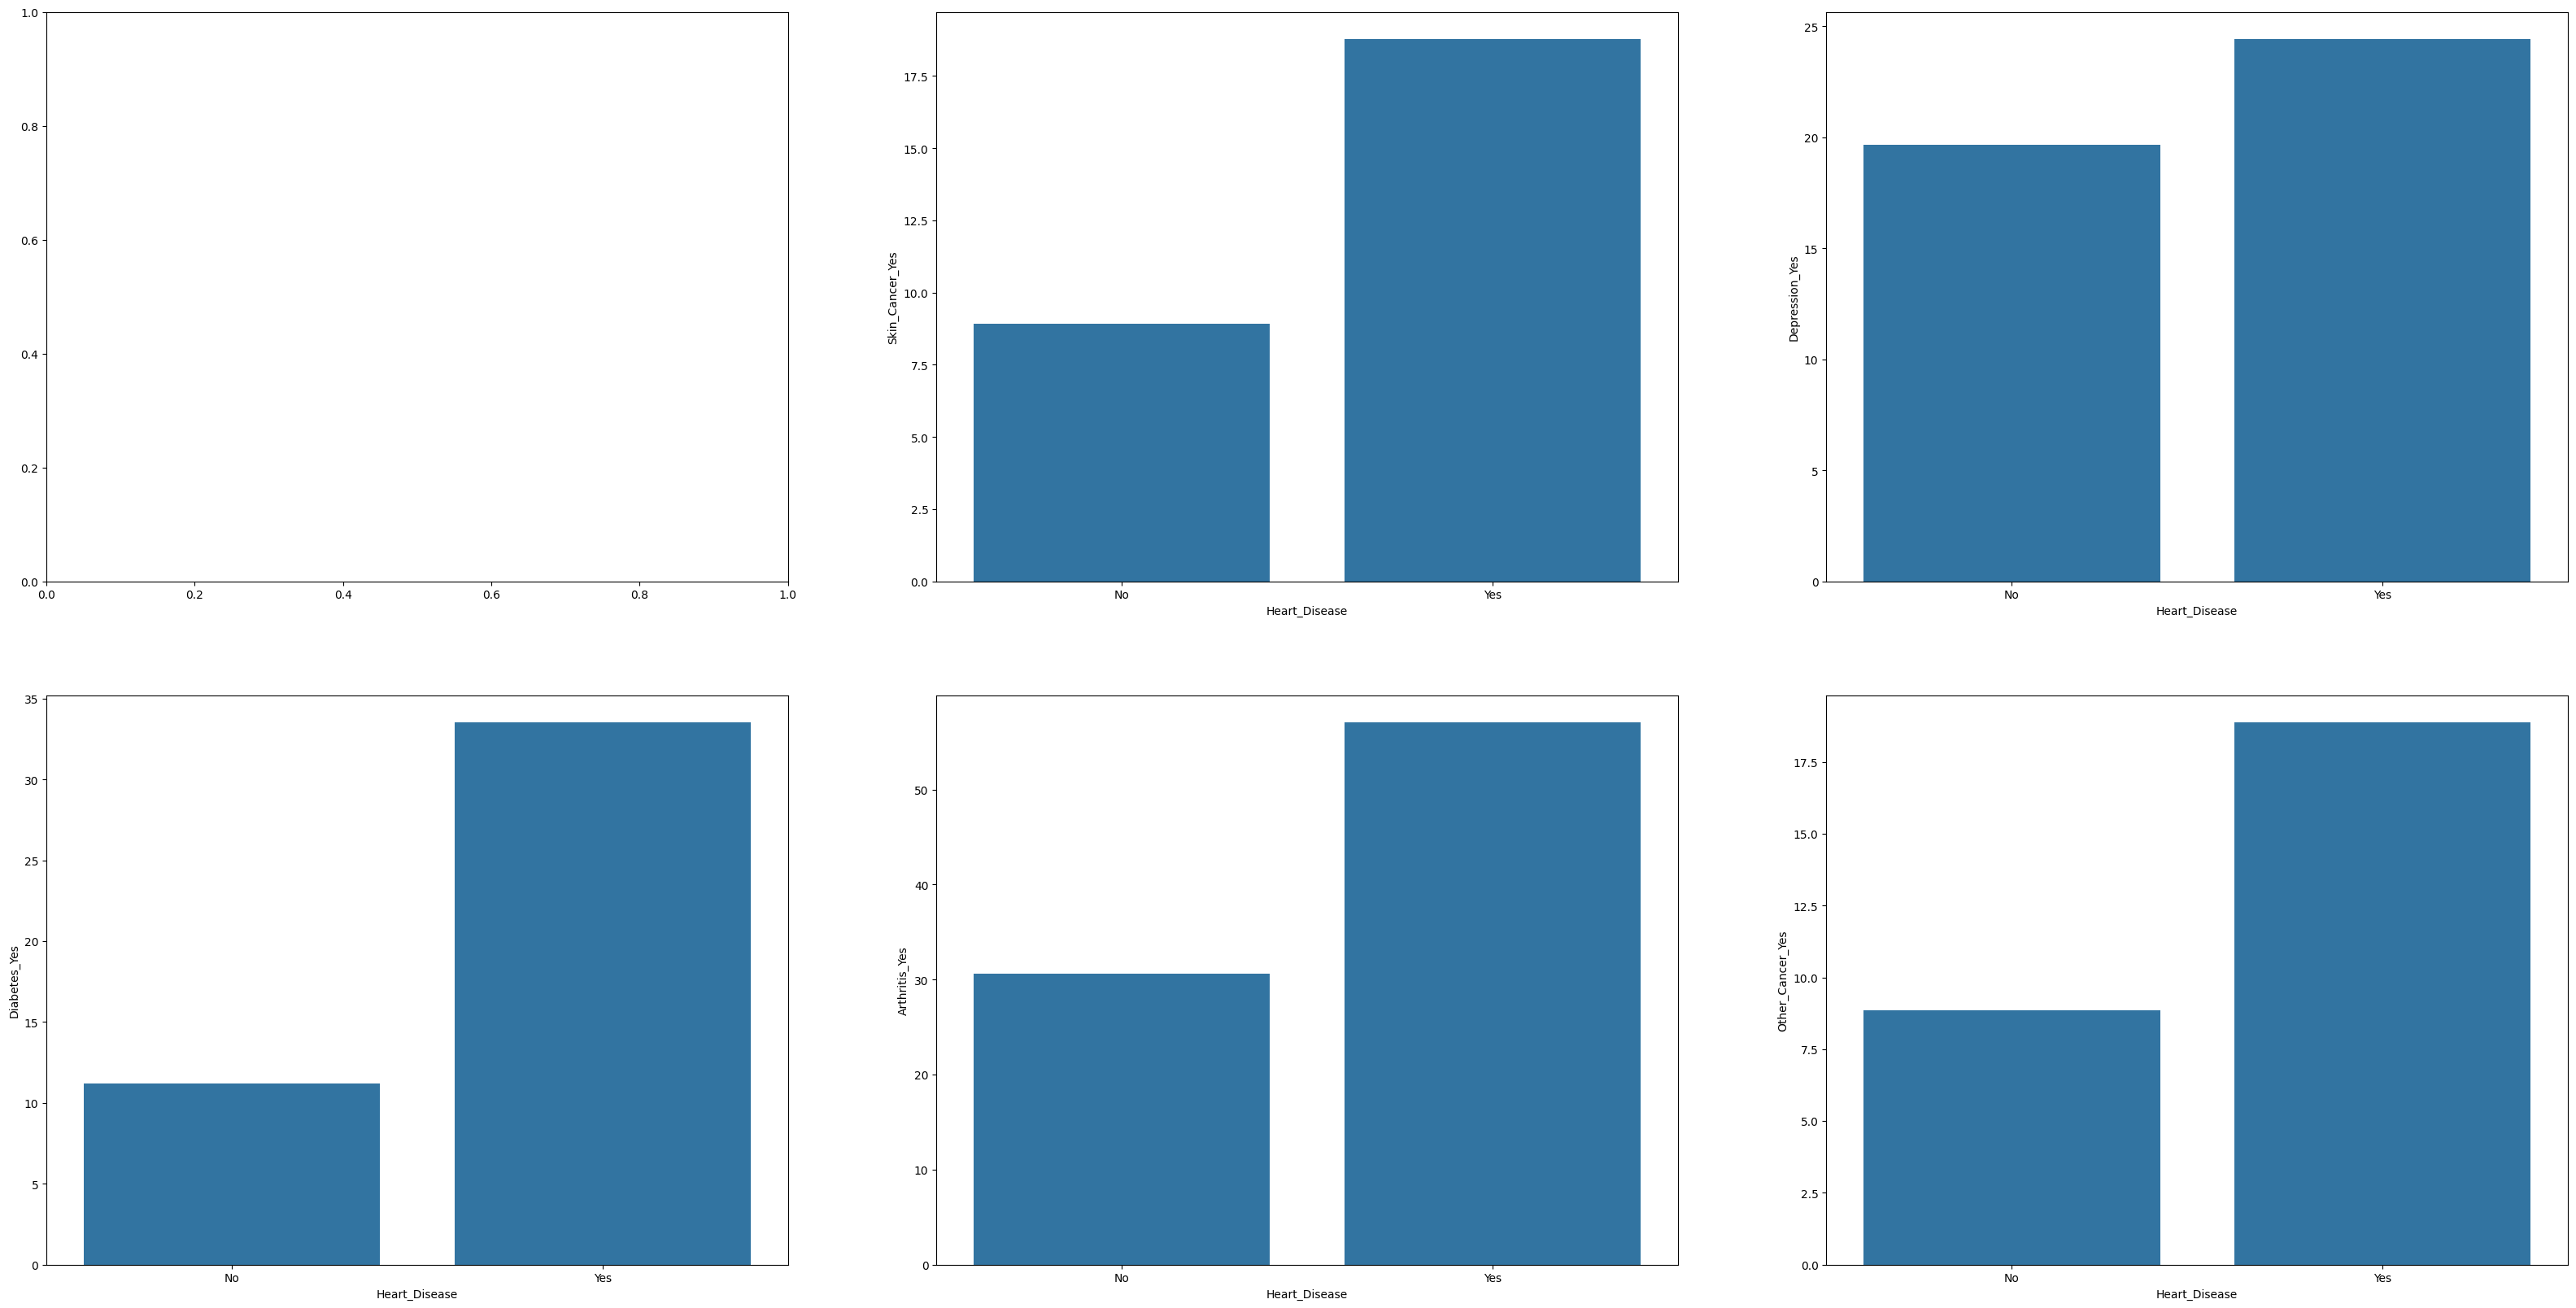

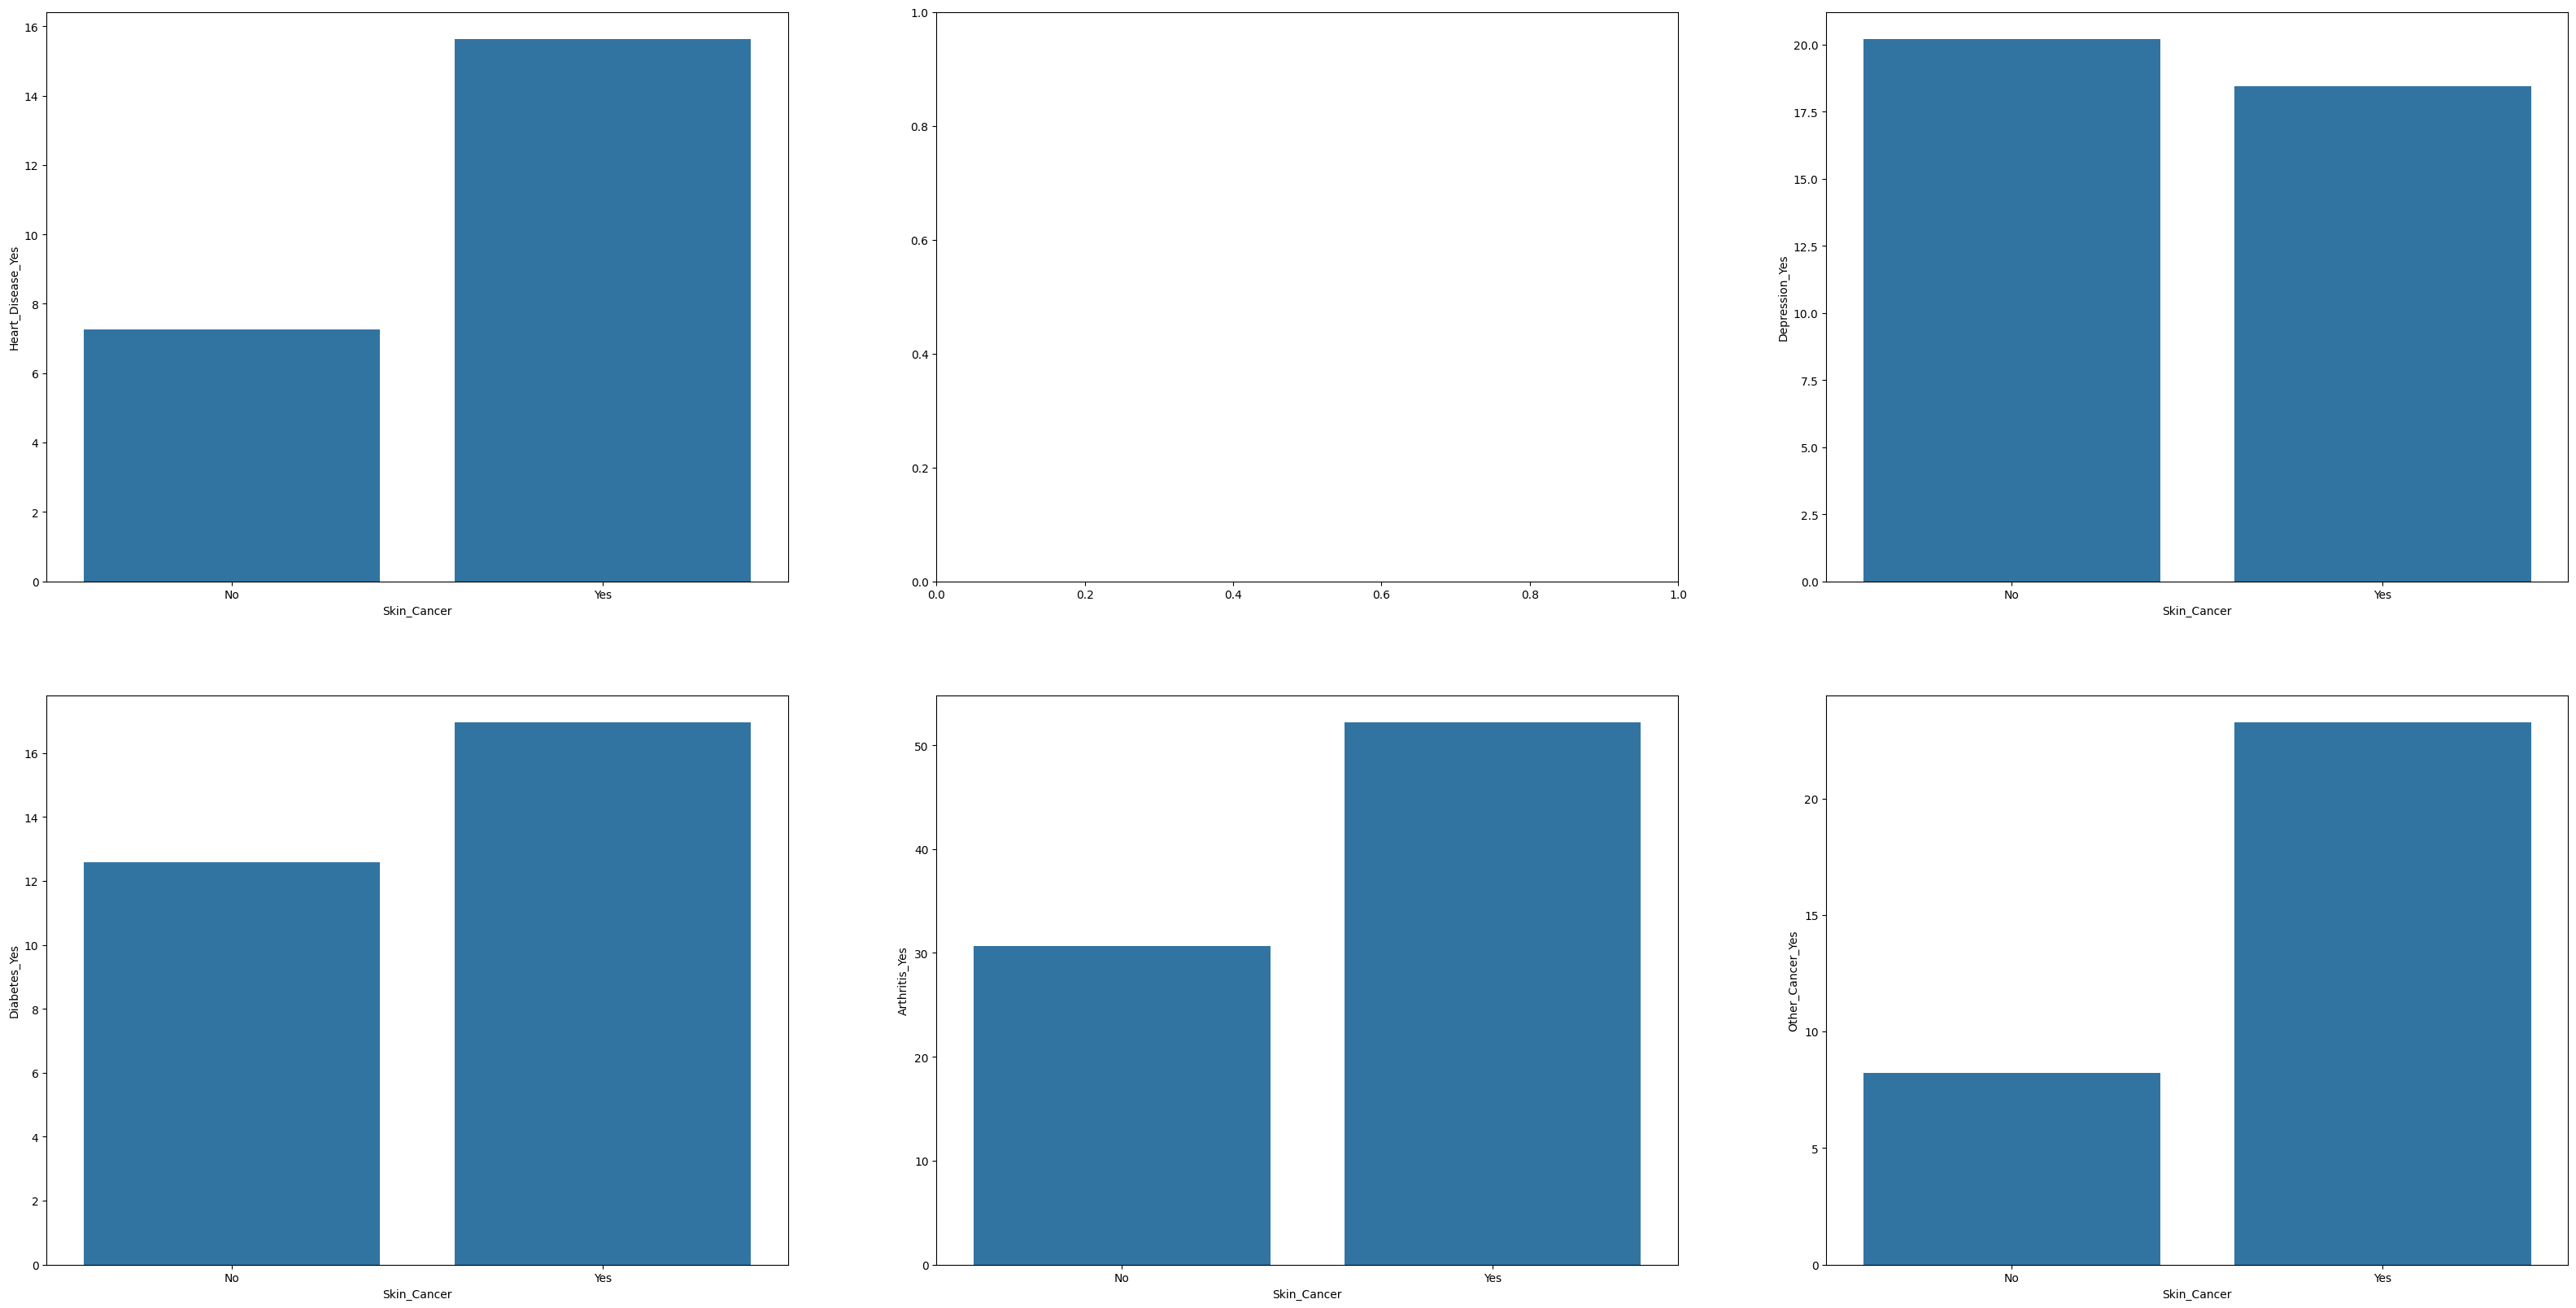

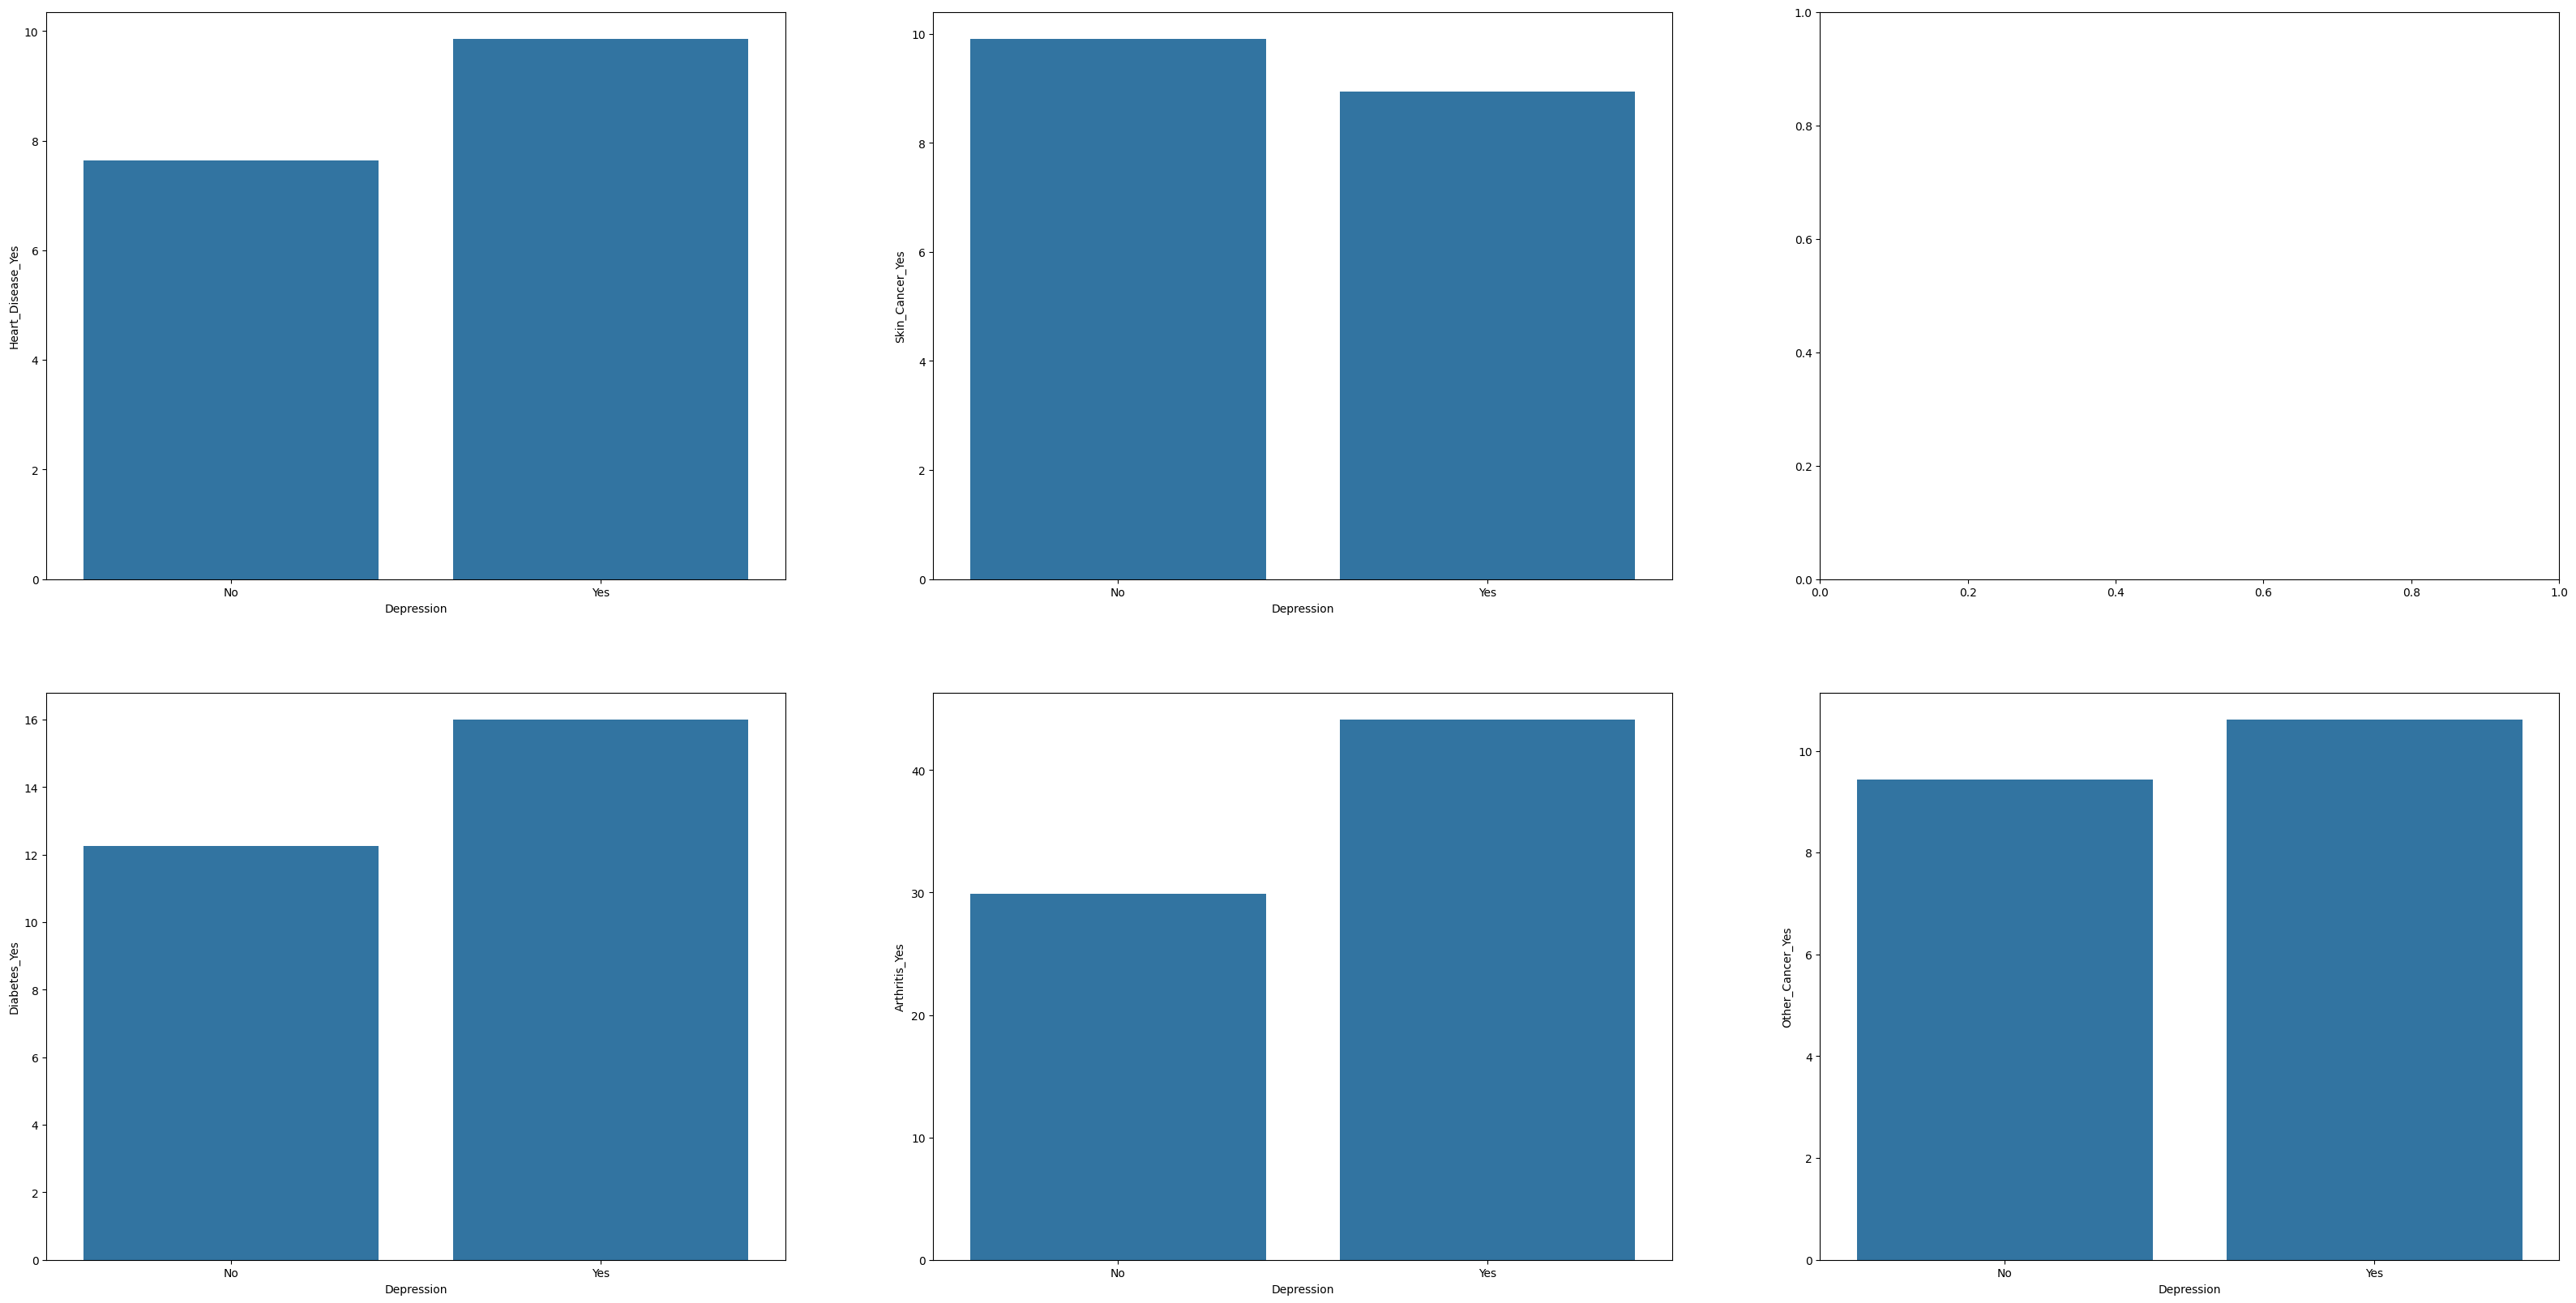

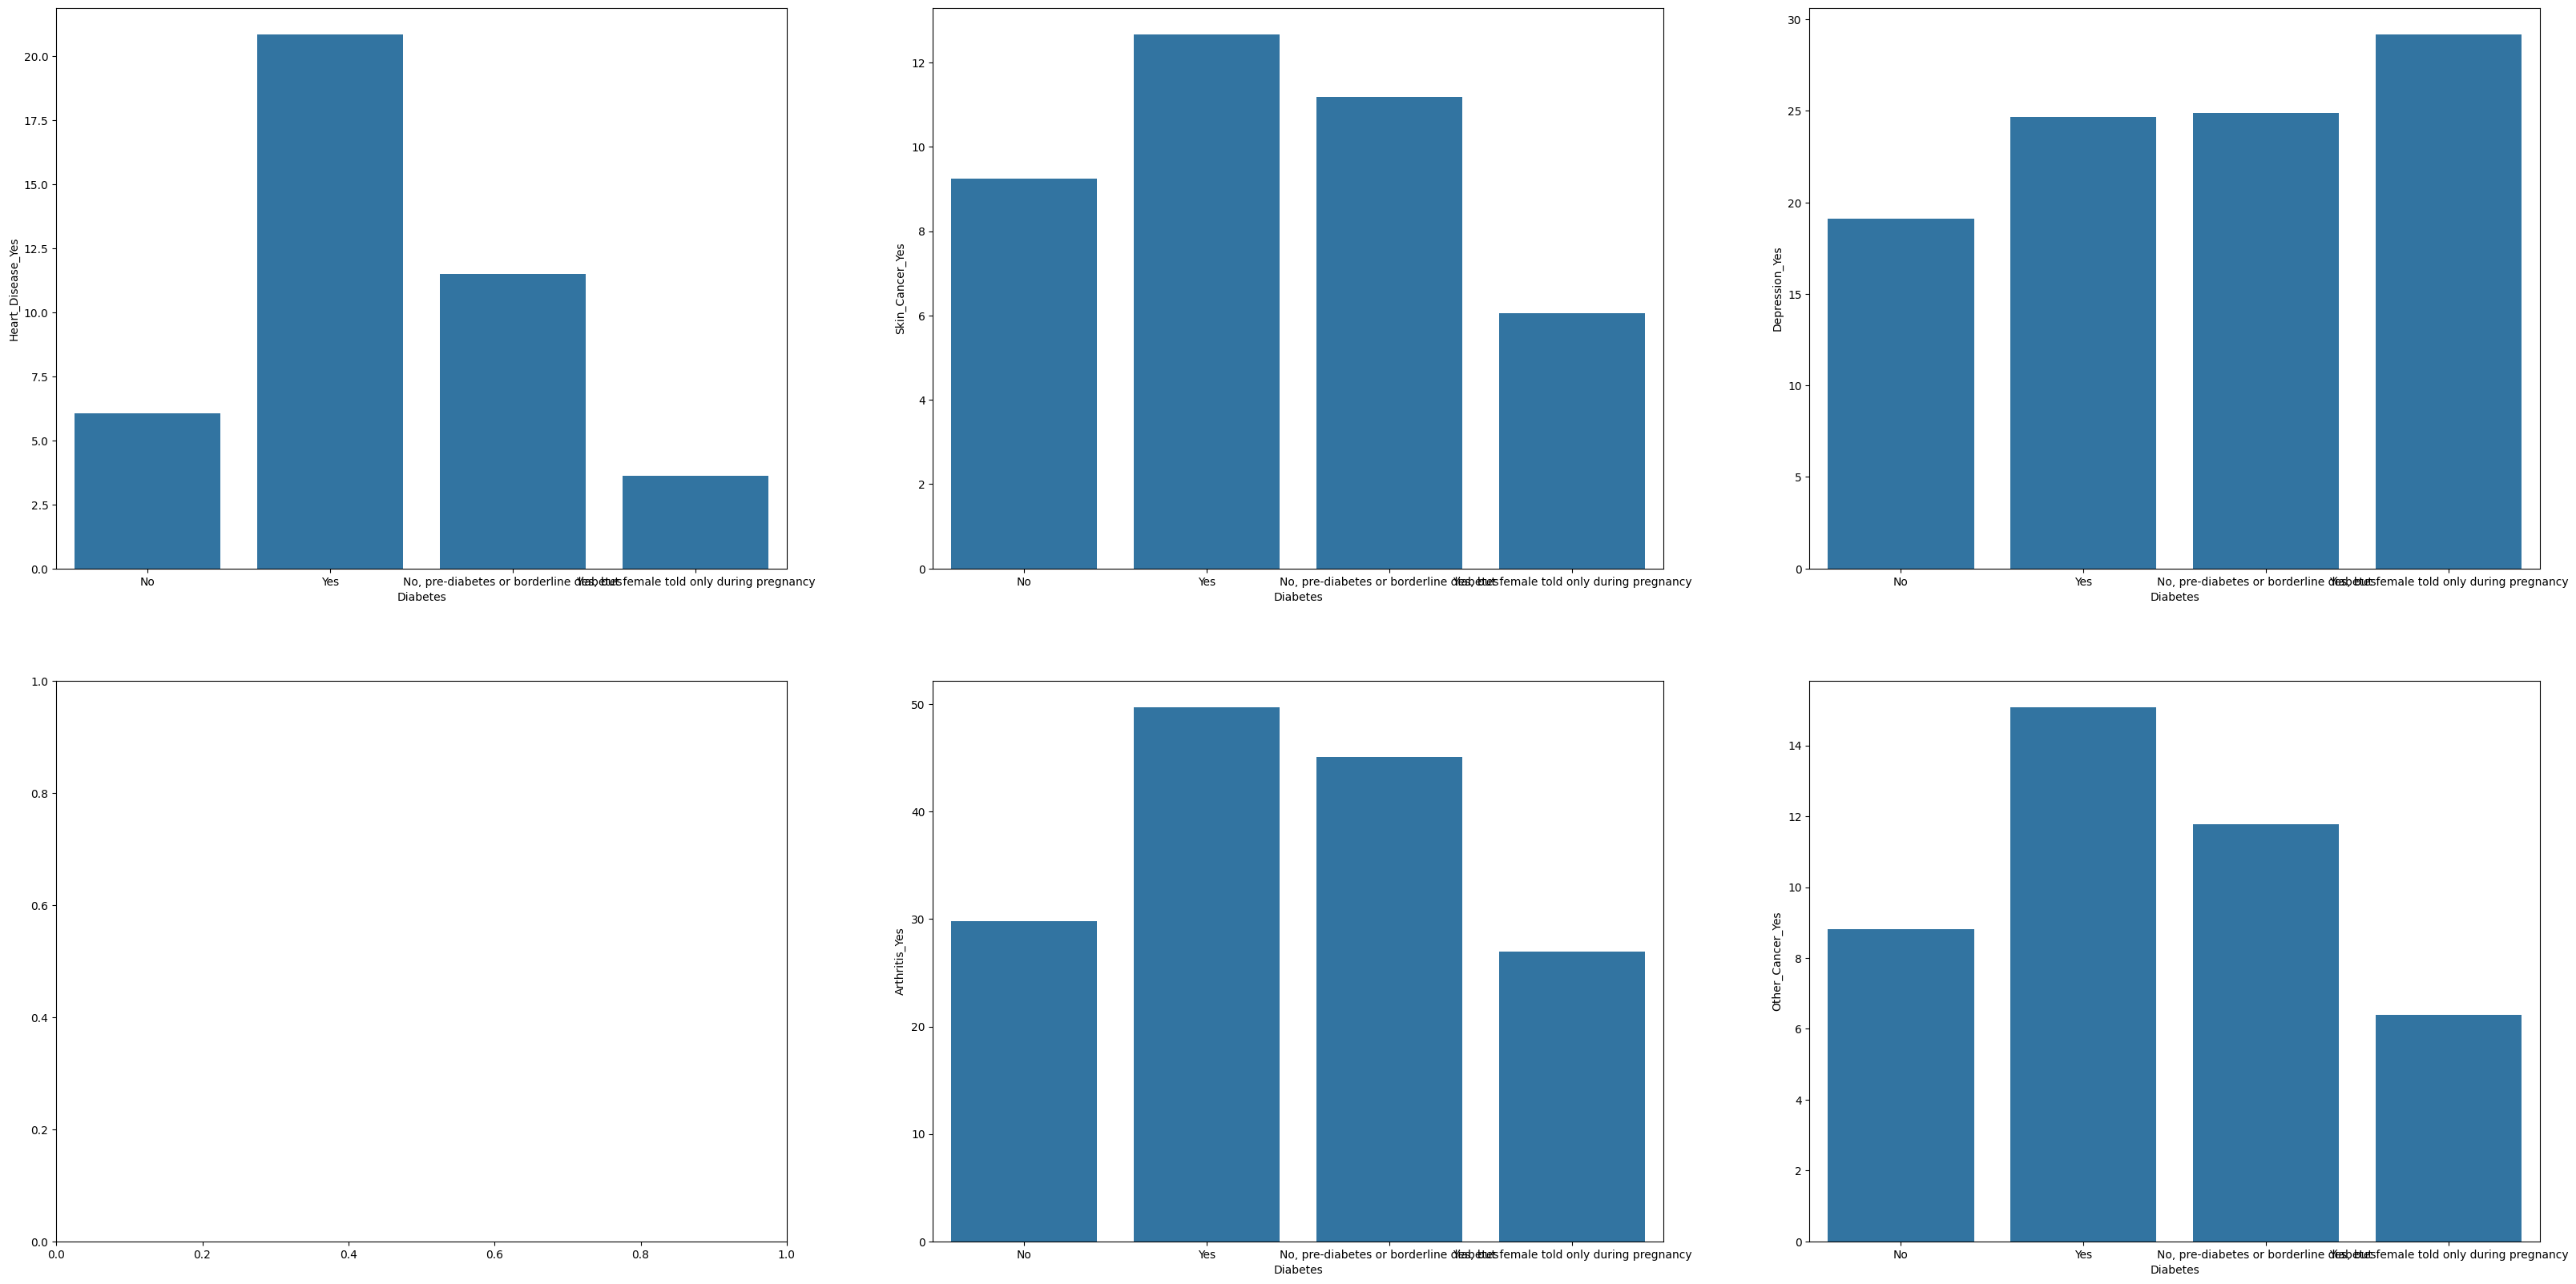

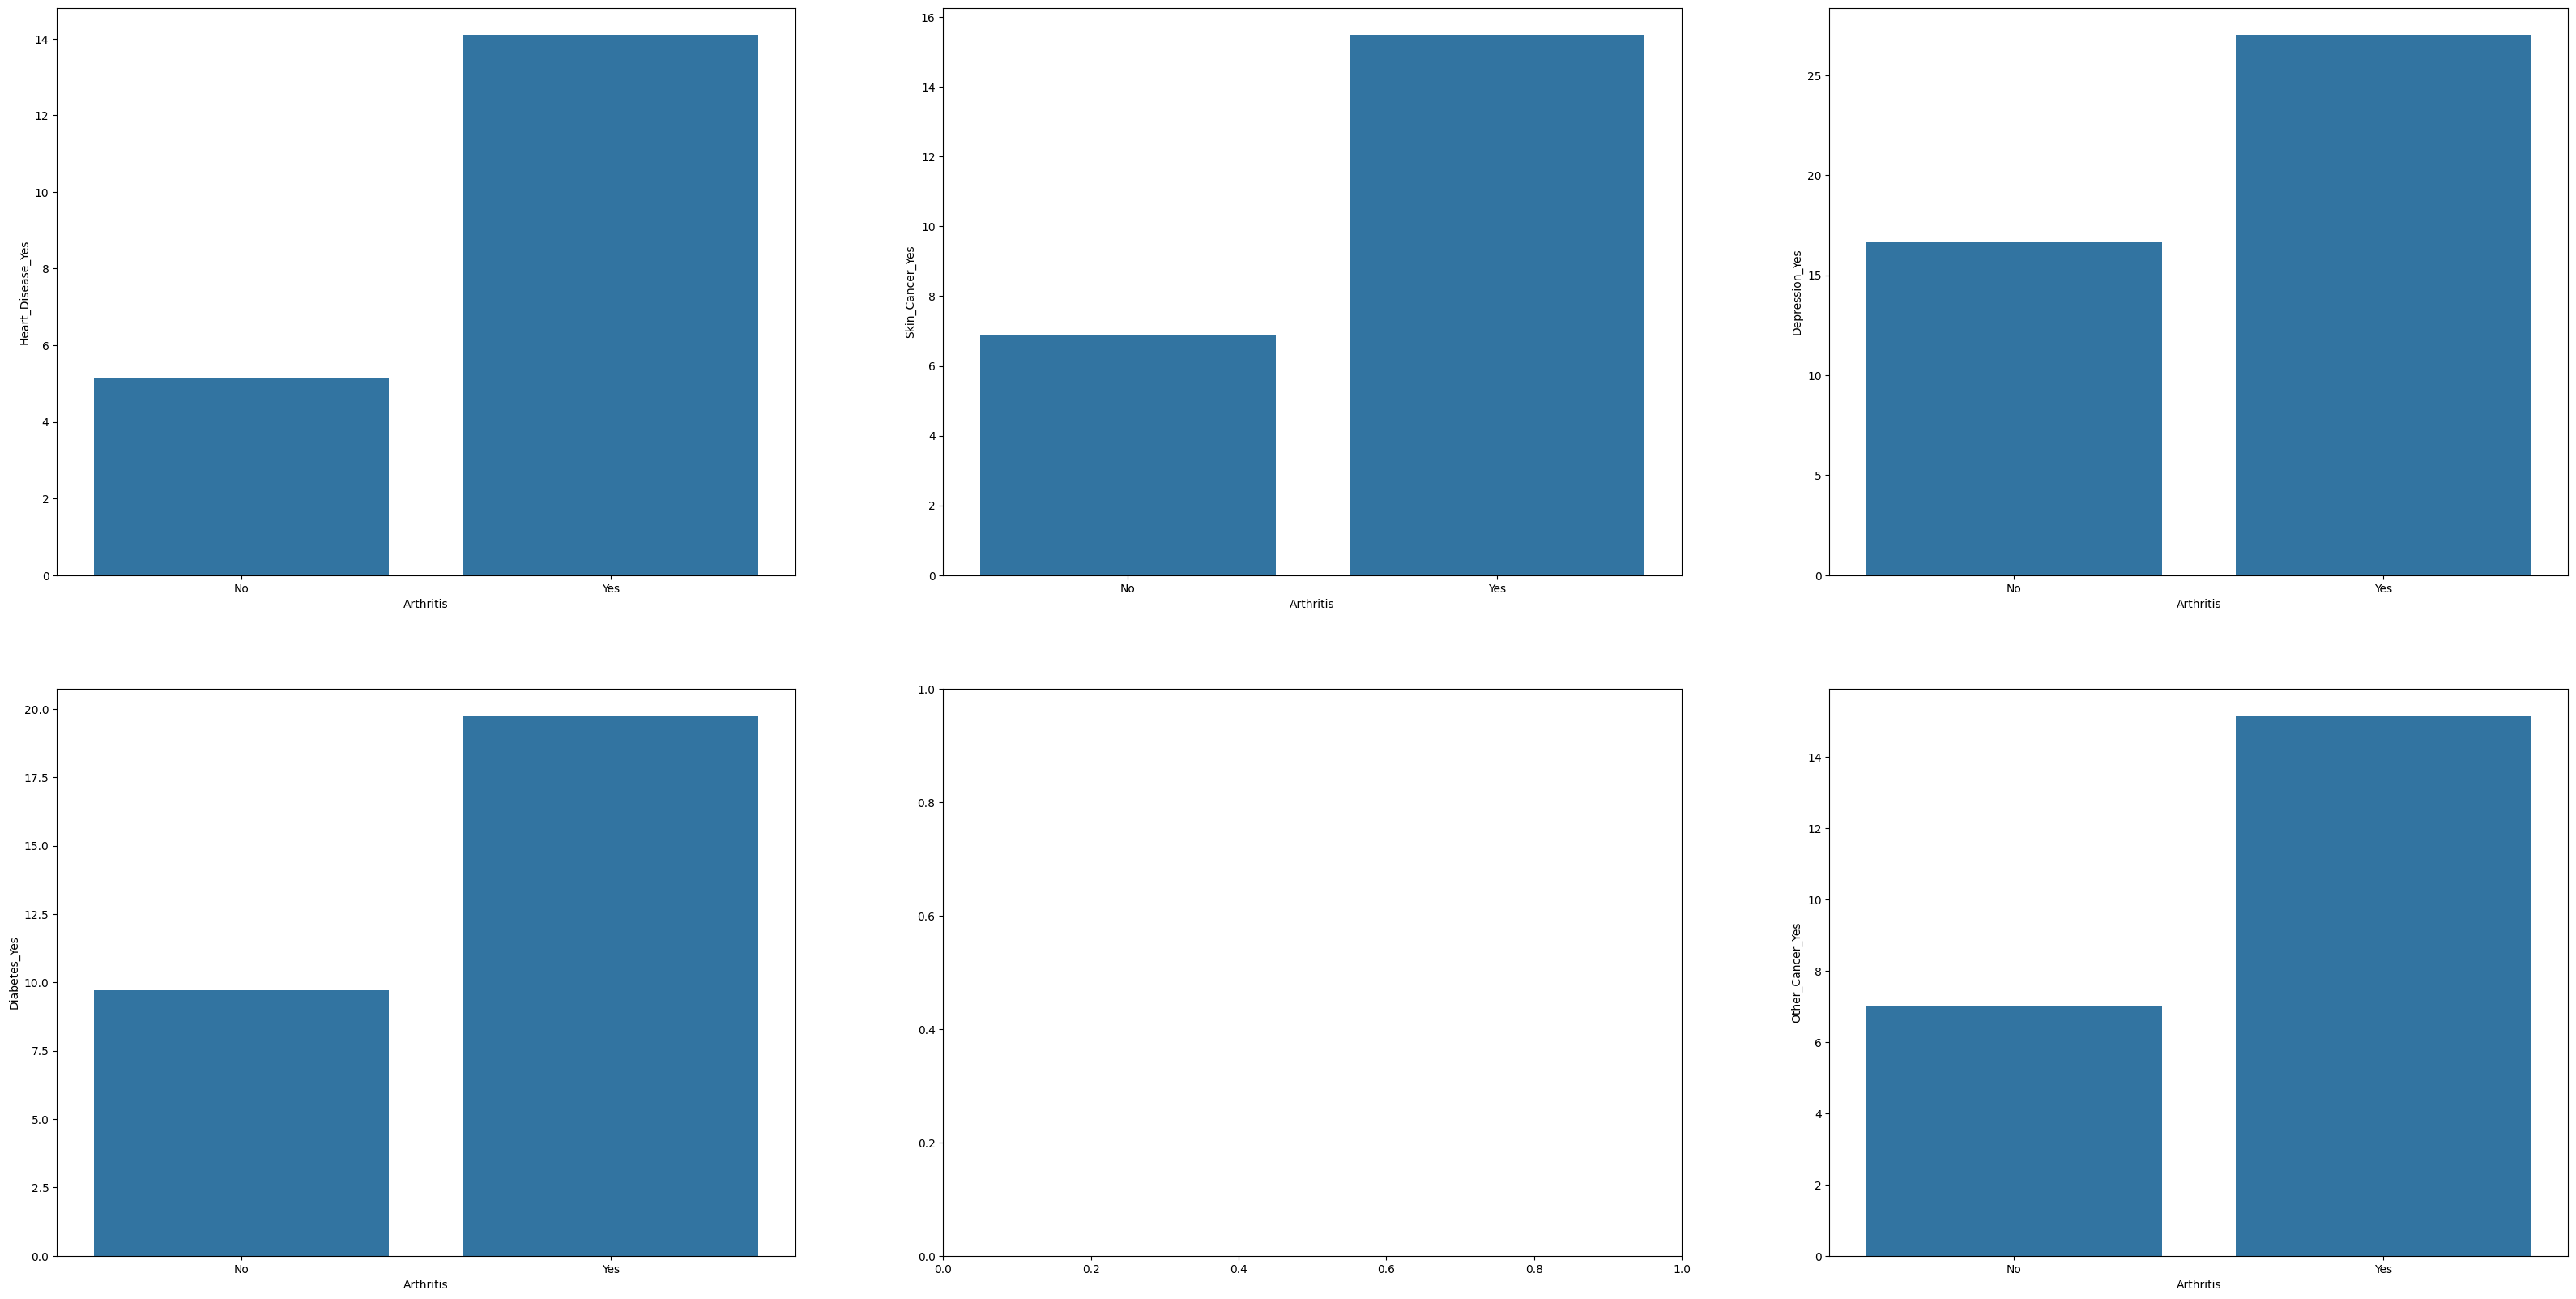

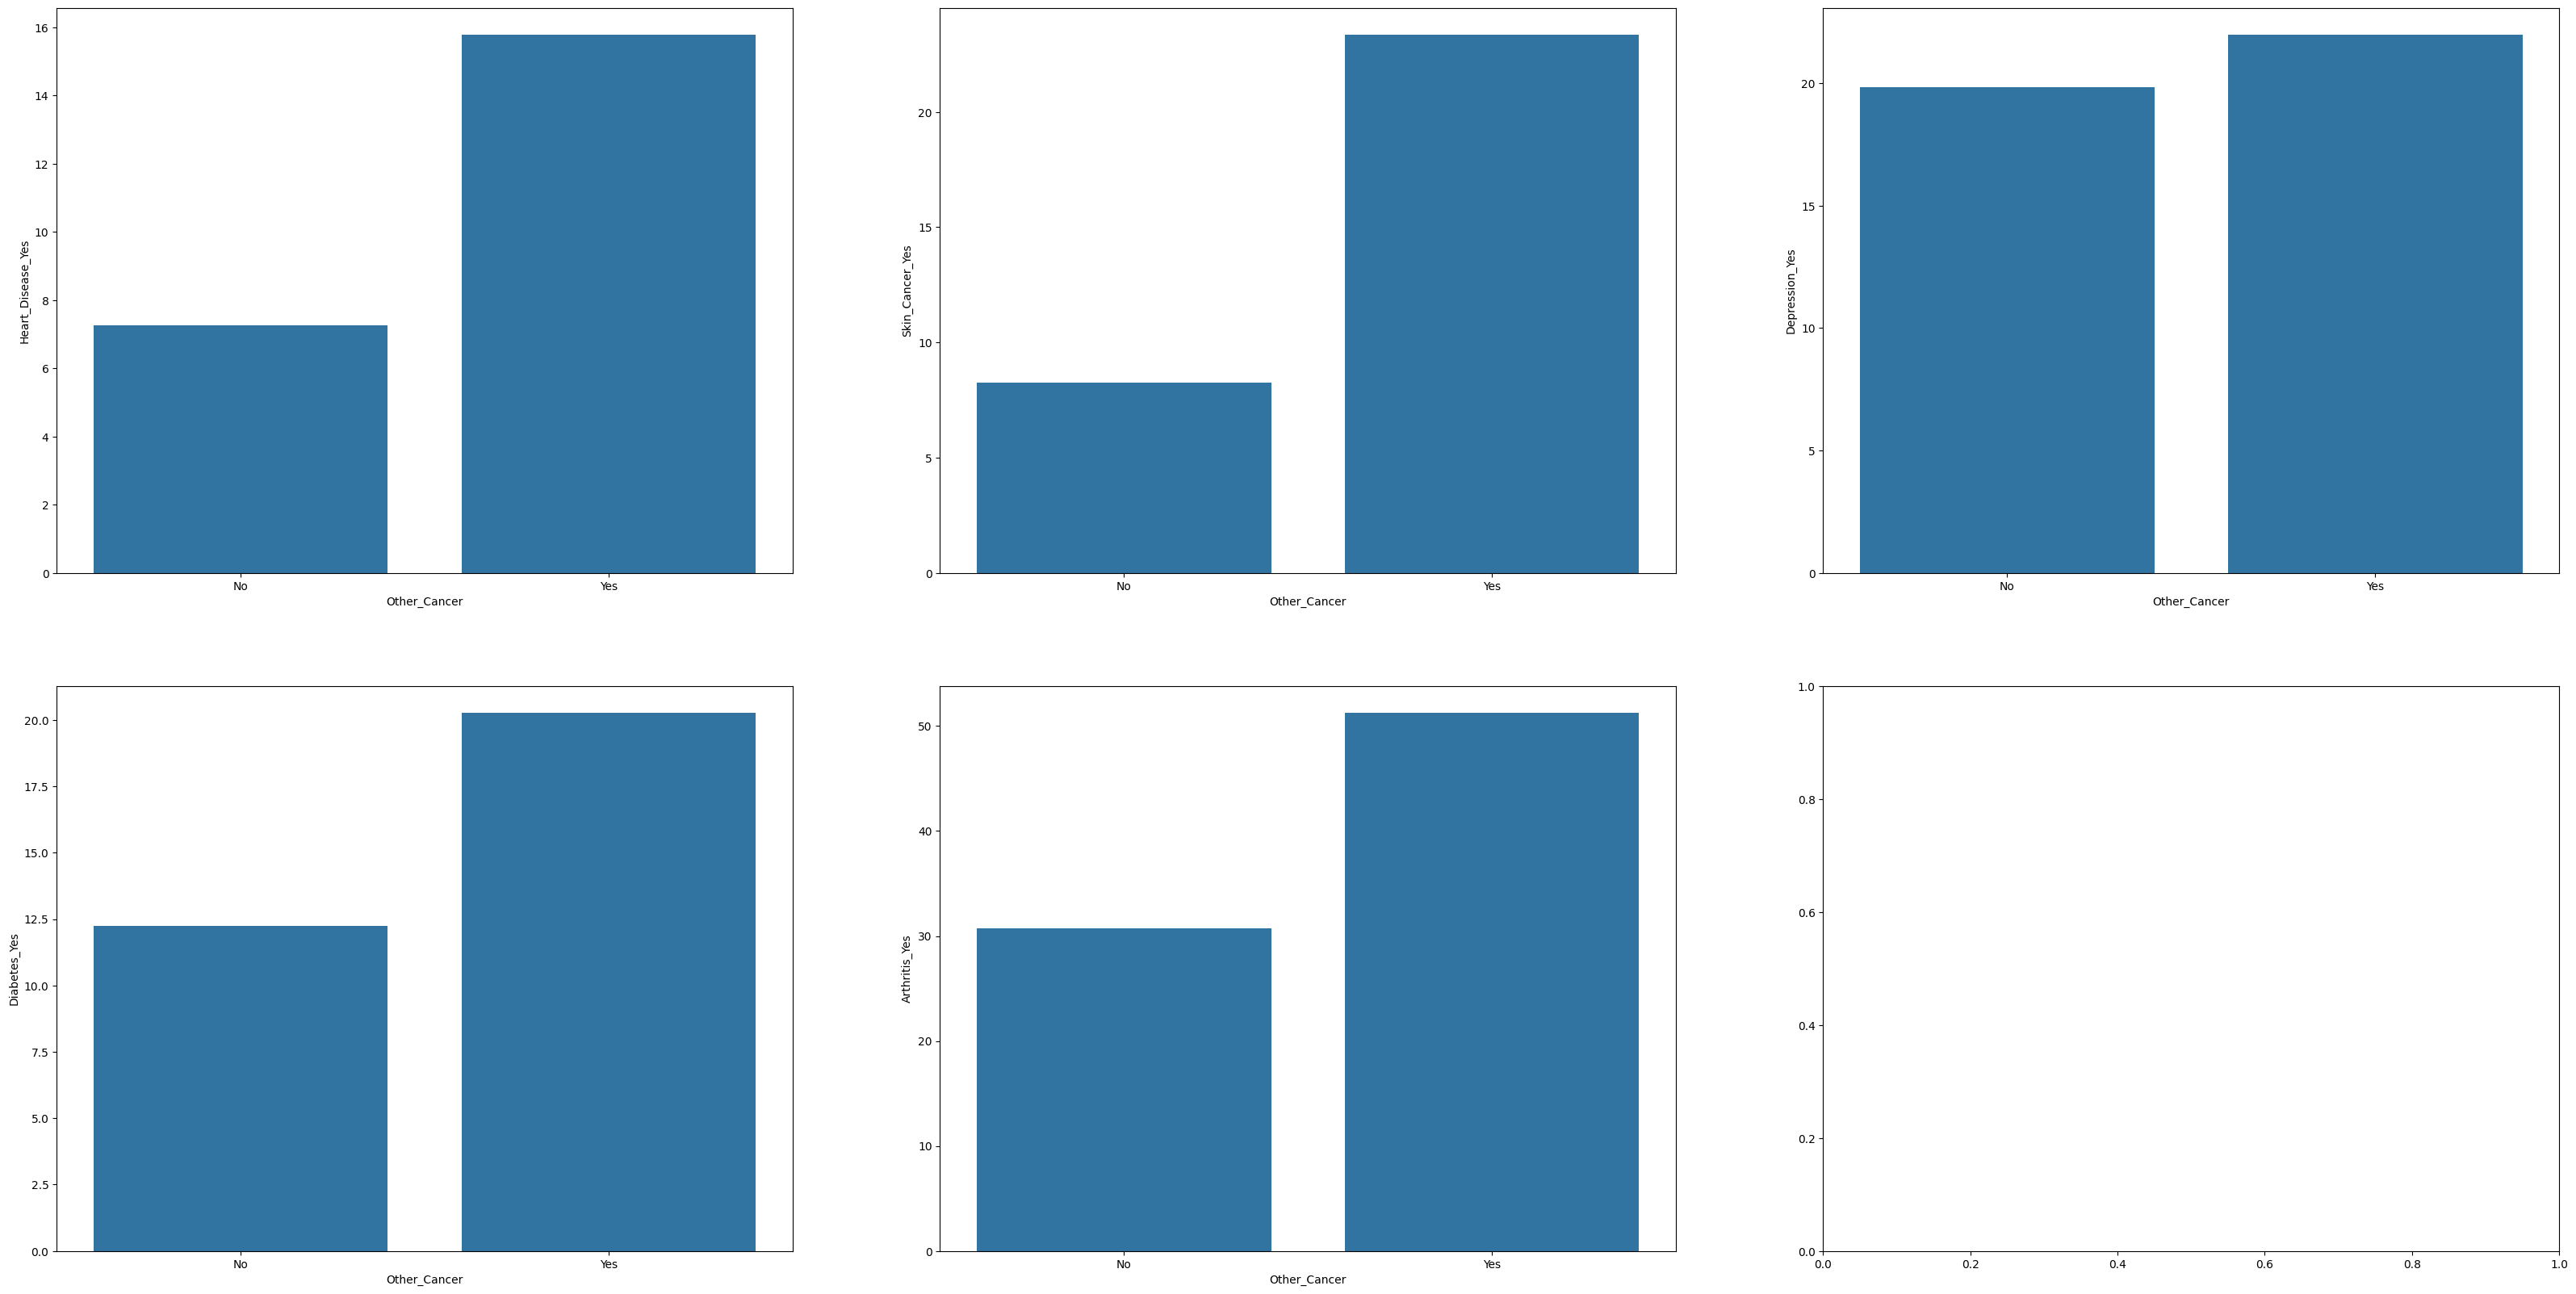

In [ ]:
for foc in focus_cols:

  disease_cat = df[foc].value_counts().index

  fig, ax = plt.subplots(2, 3, figsize = (40,20))
  k = 0
  for i, j in axes:
    disease_df = pd.DataFrame(columns = [foc, f"{focus_cols[k]}_Yes"])
    try:
      for c in range(len(disease_cat)):
        temp = df.groupby(foc)[focus_cols[k]].value_counts()[disease_cat[c]]
        disease_df.loc[c] = [disease_cat[c], ((temp/temp.sum())*100)["Yes"]]
      sns.barplot(data = disease_df, x = foc, y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
    except:
      pass
    finally:
      k = k+1



*   I used a loop to analyze the correlations, and it appears that our data may be somewhat biased. Most diseases show a positive correlation with each other, except for depression.


*   Having bias at this level can hinder the performance of our predictive model.





In [ ]:
remaining_cat_cols = ["Sex", "Age_Category", "Smoking_History"]

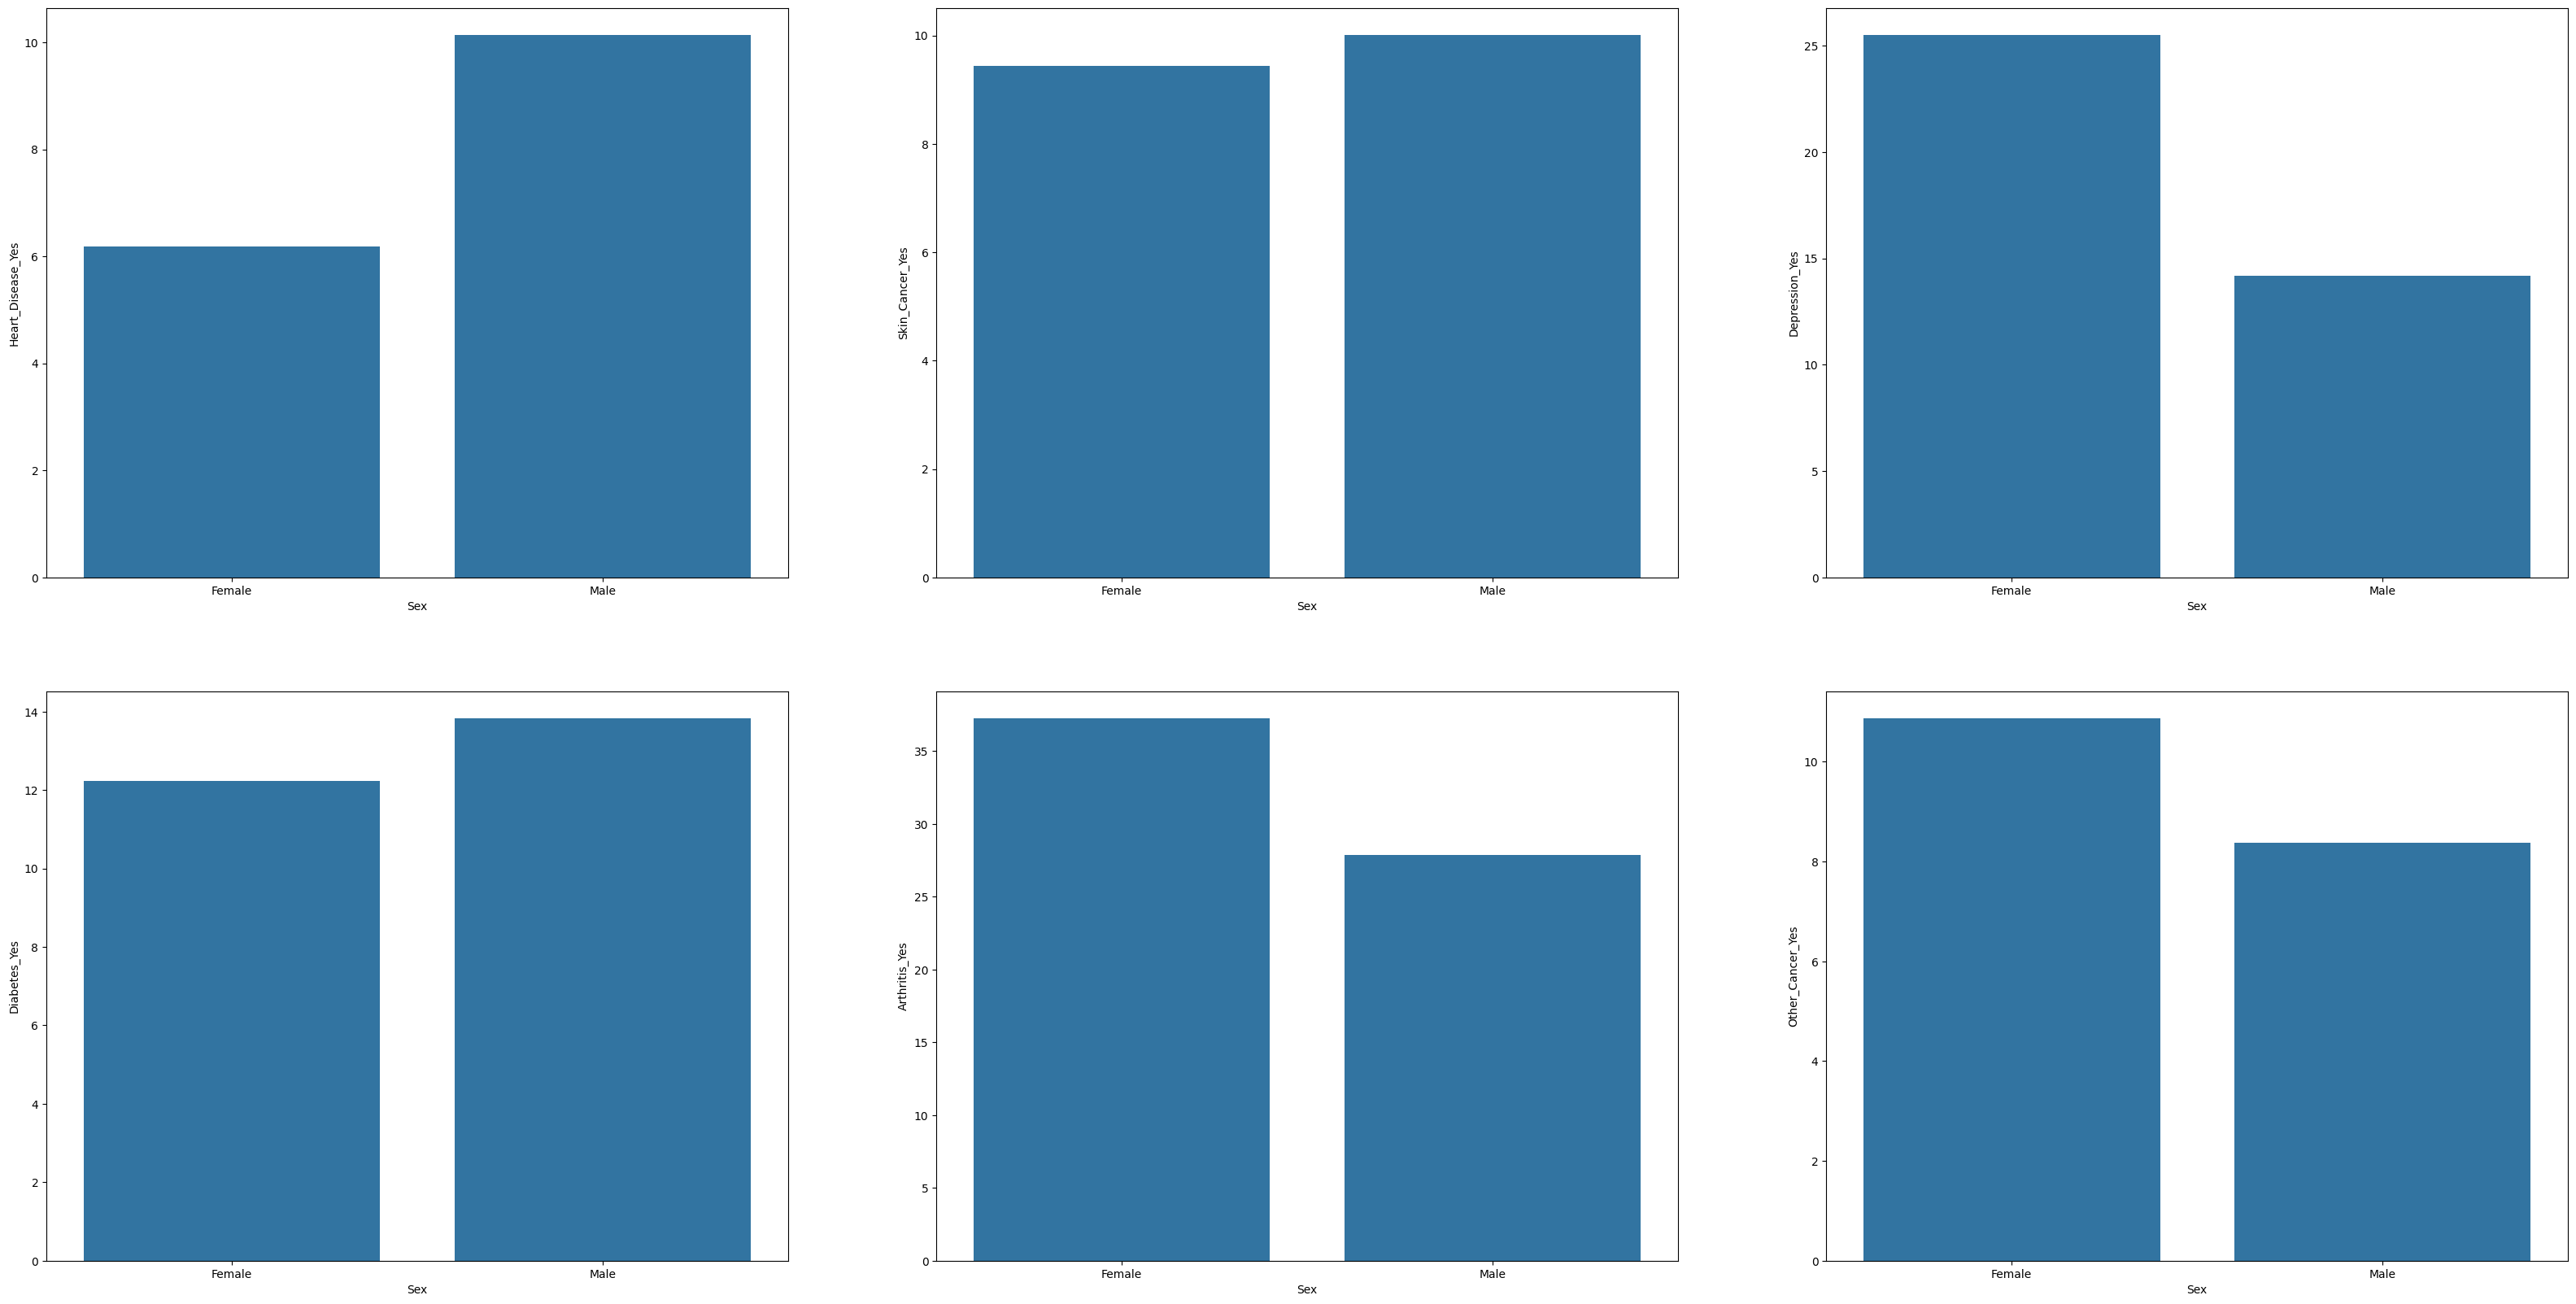

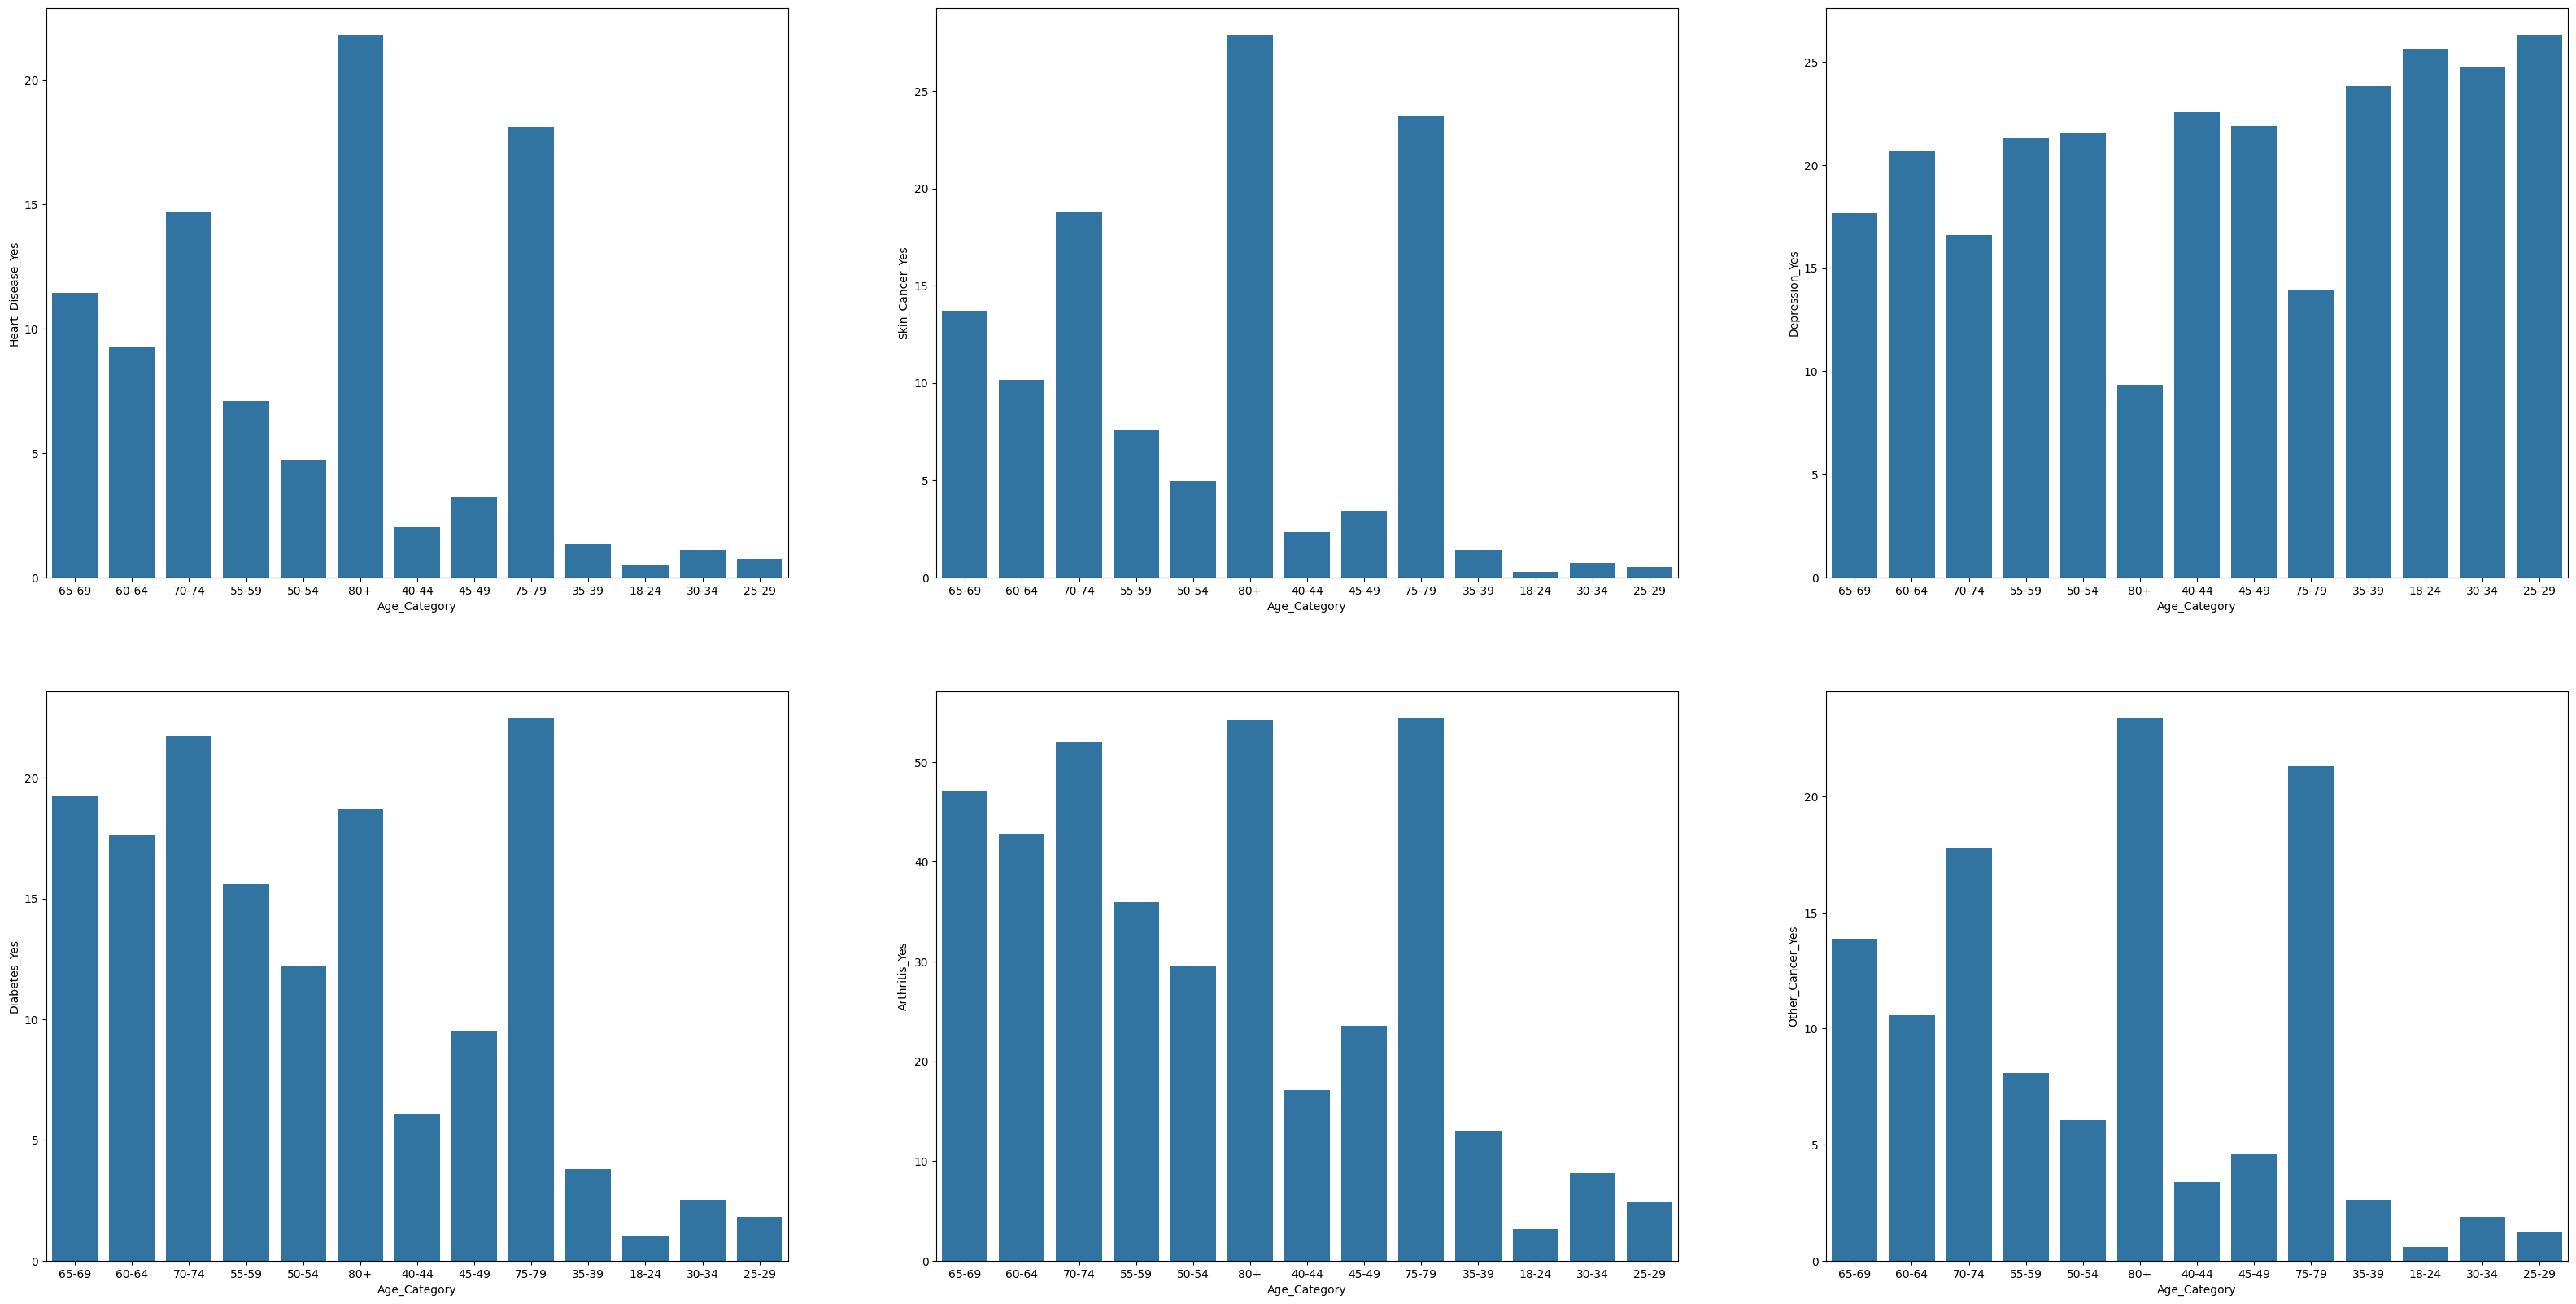

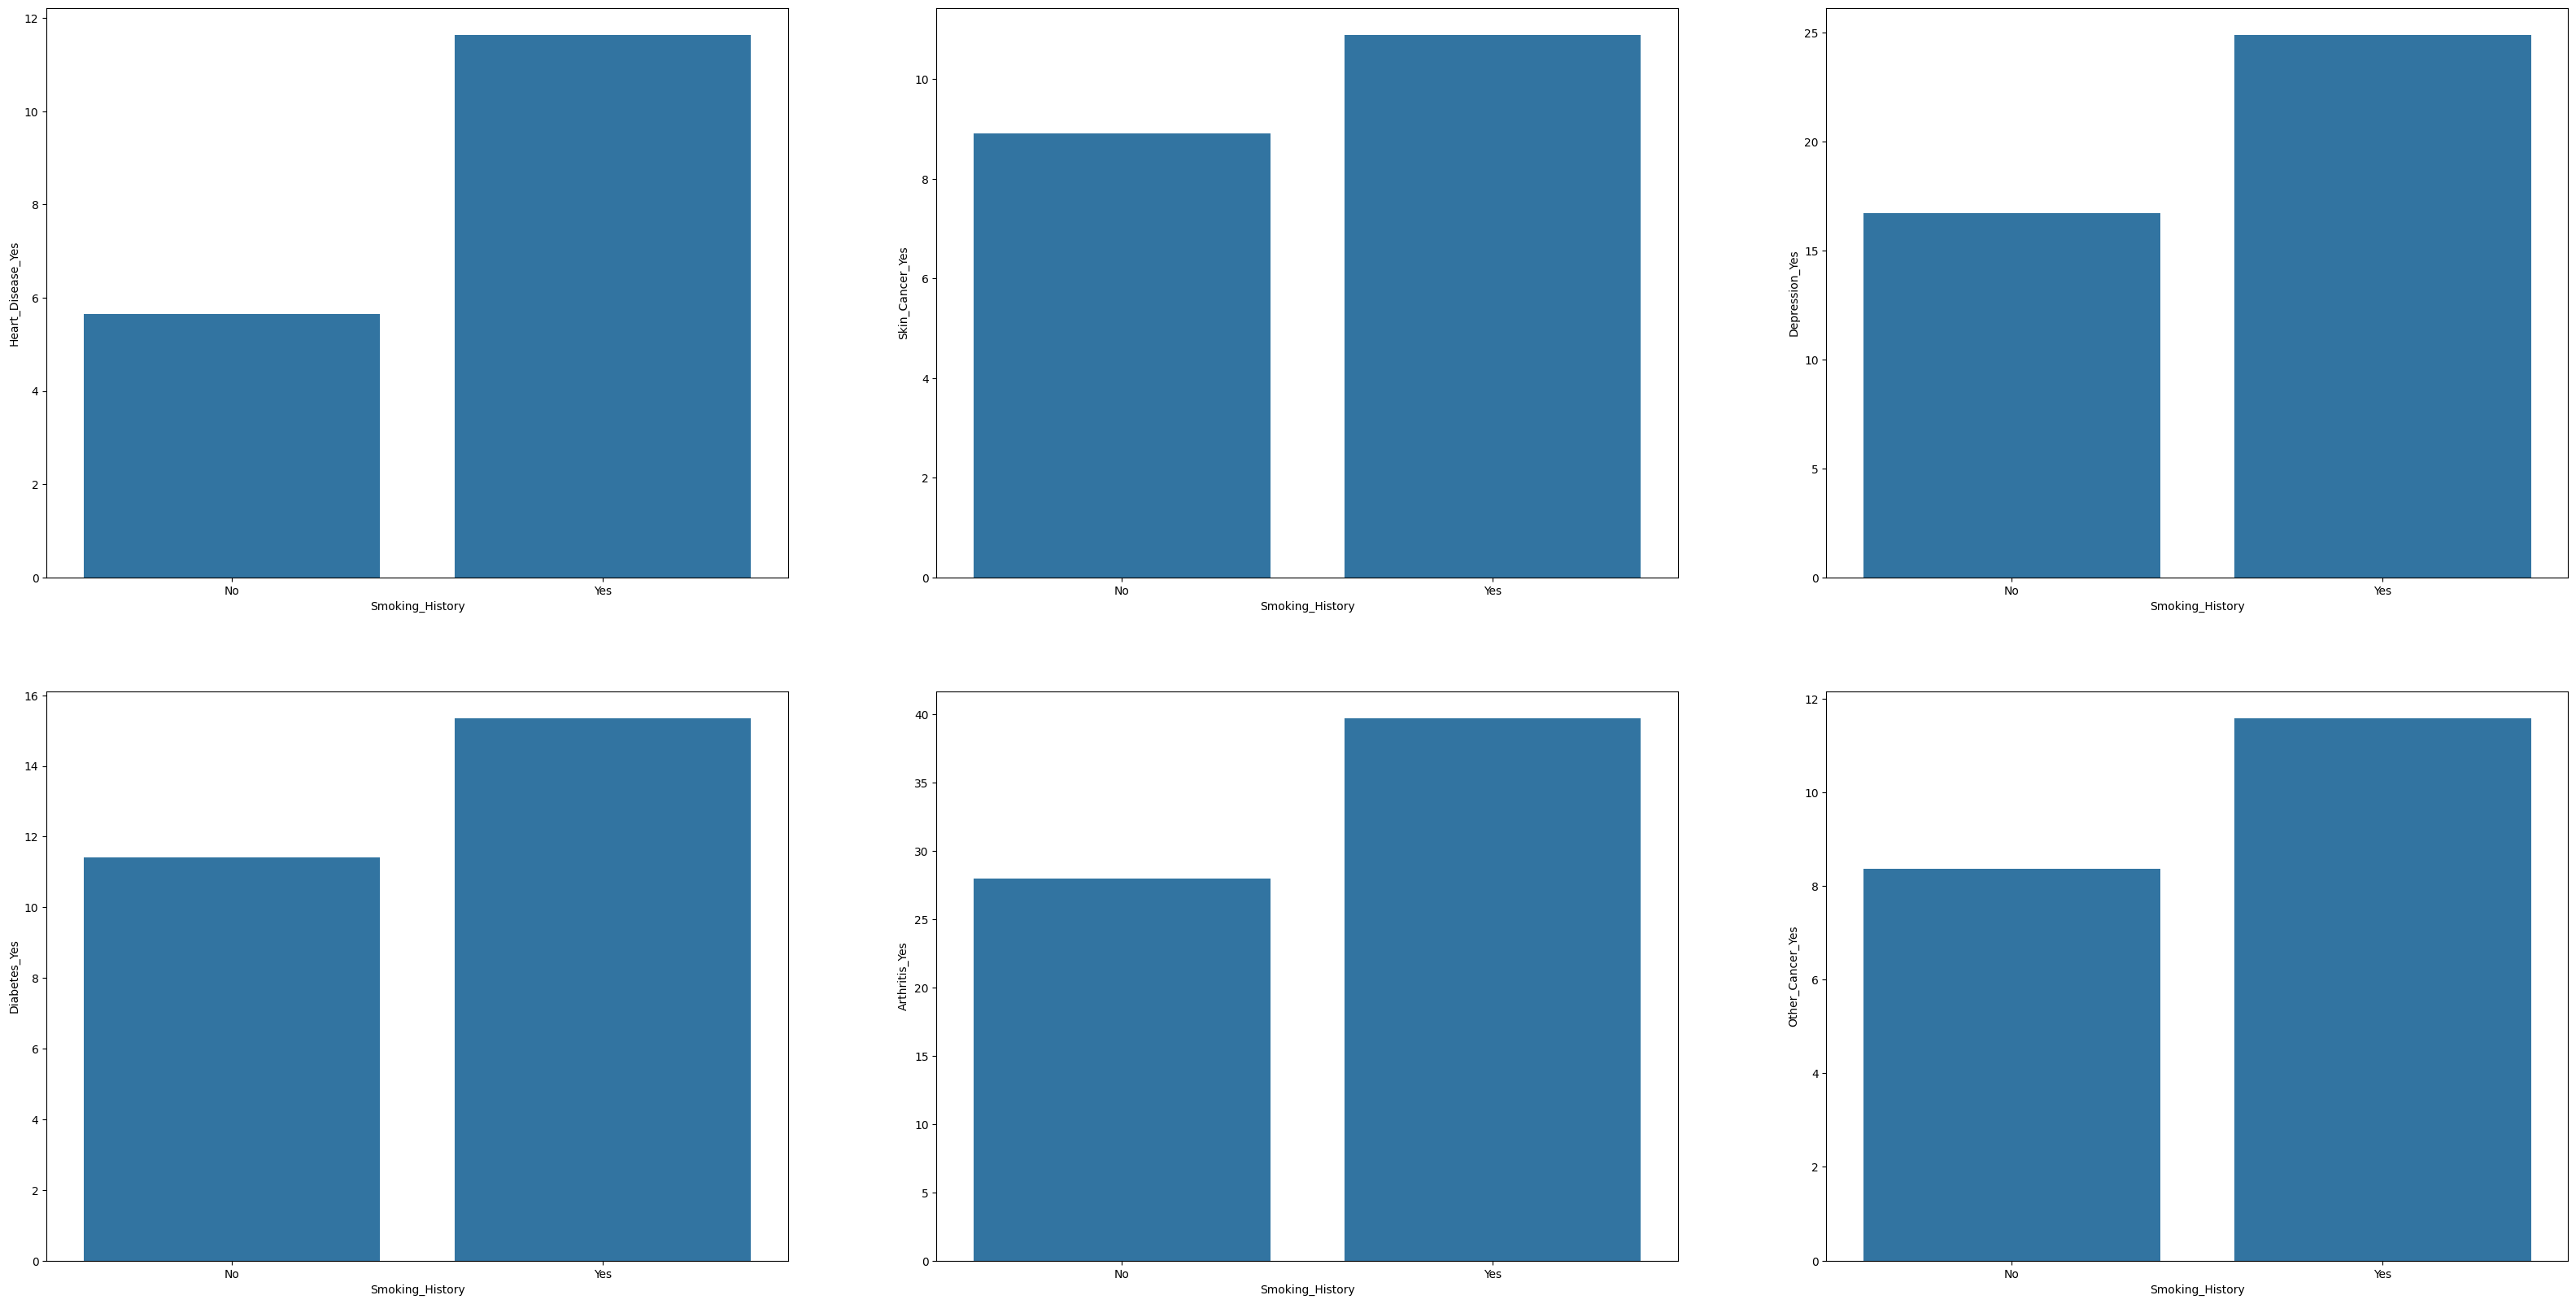

In [ ]:
for rem in remaining_cat_cols:

  disease_cat = df[rem].value_counts().index

  fig, ax = plt.subplots(2, 3, figsize = (40,20))
  k = 0
  for i, j in axes:
    disease_df = pd.DataFrame(columns = [rem, f"{focus_cols[k]}_Yes"])
    try:
      for c in range(len(disease_cat)):
        temp = df.groupby(rem)[focus_cols[k]].value_counts()[disease_cat[c]]
        disease_df.loc[c] = [disease_cat[c], ((temp/temp.sum())*100)["Yes"]]
      sns.barplot(data = disease_df, x = rem, y = f"{focus_cols[k]}_Yes", ax = ax[i, j])
    except:
      pass
    finally:
      k = k+1



*   There is a significant correlation between sex and depression.
*   Age category is also crucial for our predictive model, as many diseases are influenced by age.


In [ ]:
heart_height = (df.groupby("Heart_Disease")["Height_(cm)"].mean()).reset_index()

<Axes: xlabel='Heart_Disease', ylabel='Height_(cm)'>

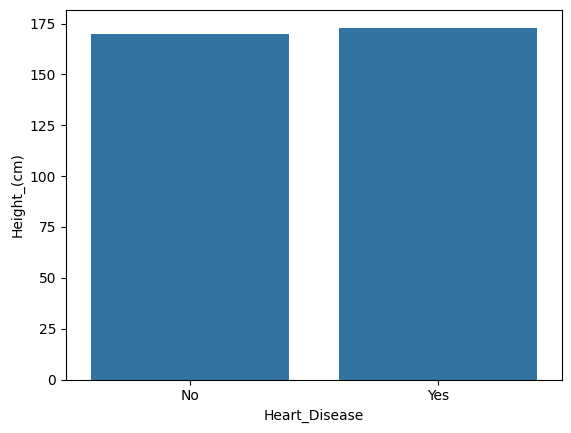

In [ ]:
sns.barplot(x = df["Heart_Disease"], y = df["Height_(cm)"], estimator = np.median)

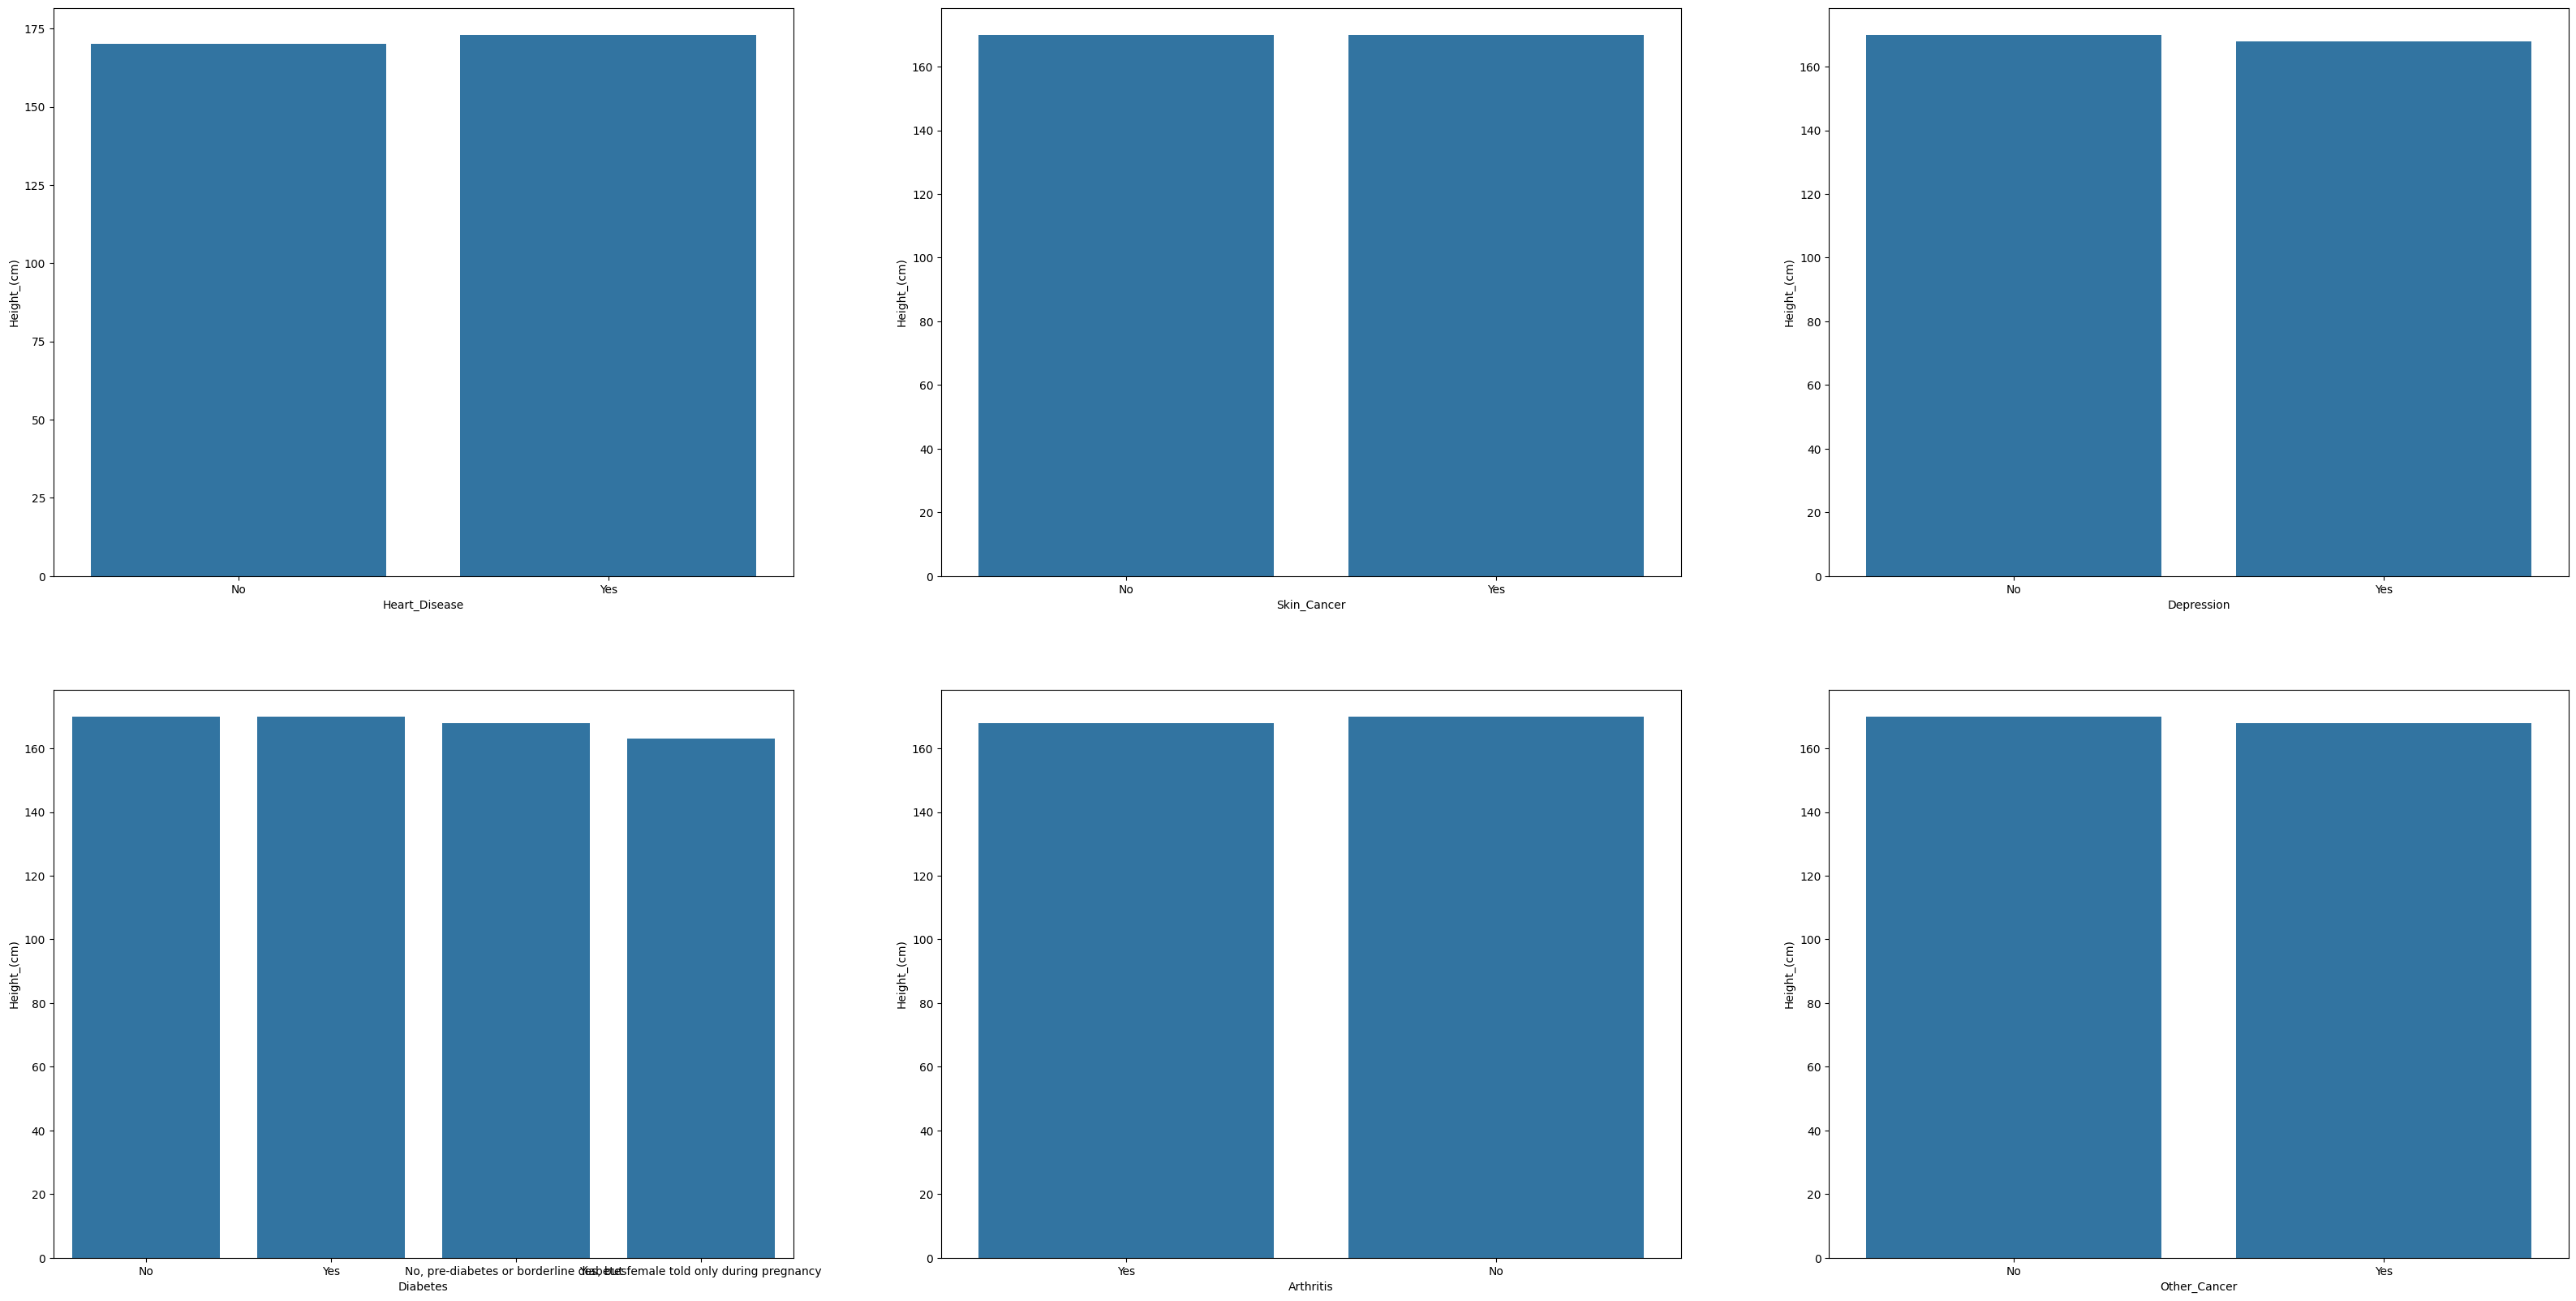

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  sns.barplot(x = df[focus_cols[k]], y = df["Height_(cm)"], ax = ax[i, j], estimator = np.median)
  k = k+1



*   This clearly shows that the height column is not associated with any diseases.


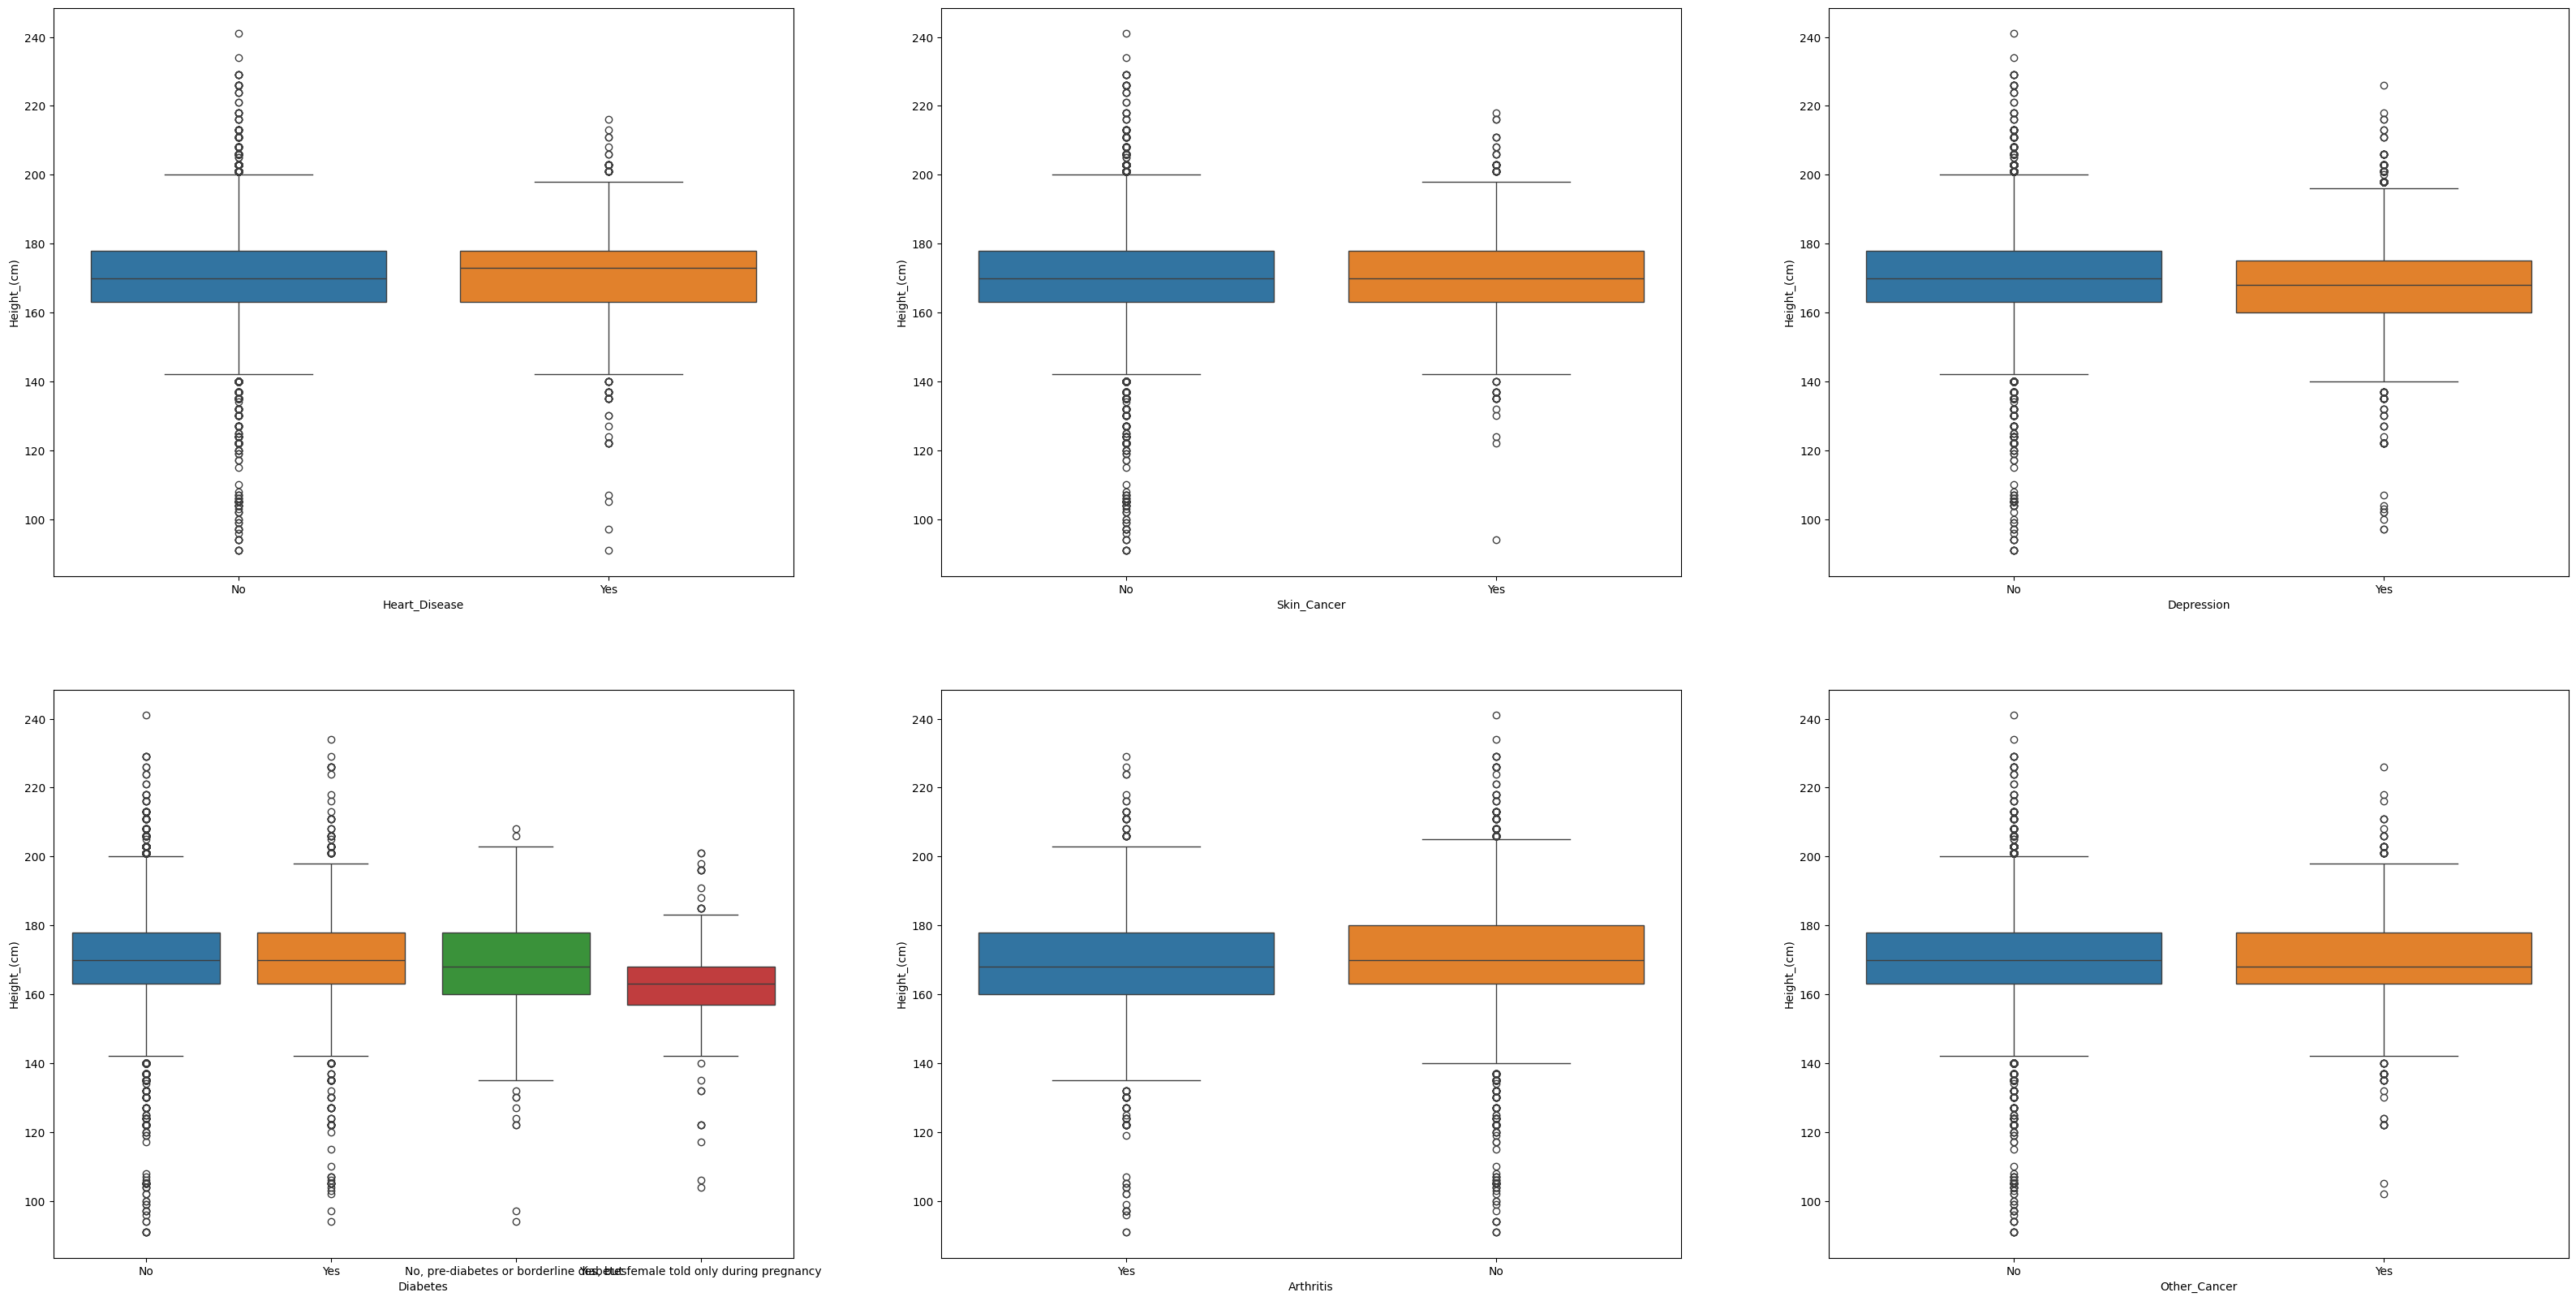

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  sns.boxplot(x = df[focus_cols[k]], y = df["Height_(cm)"], ax = ax[i, j], hue = df[focus_cols[k]])
  k = k+1

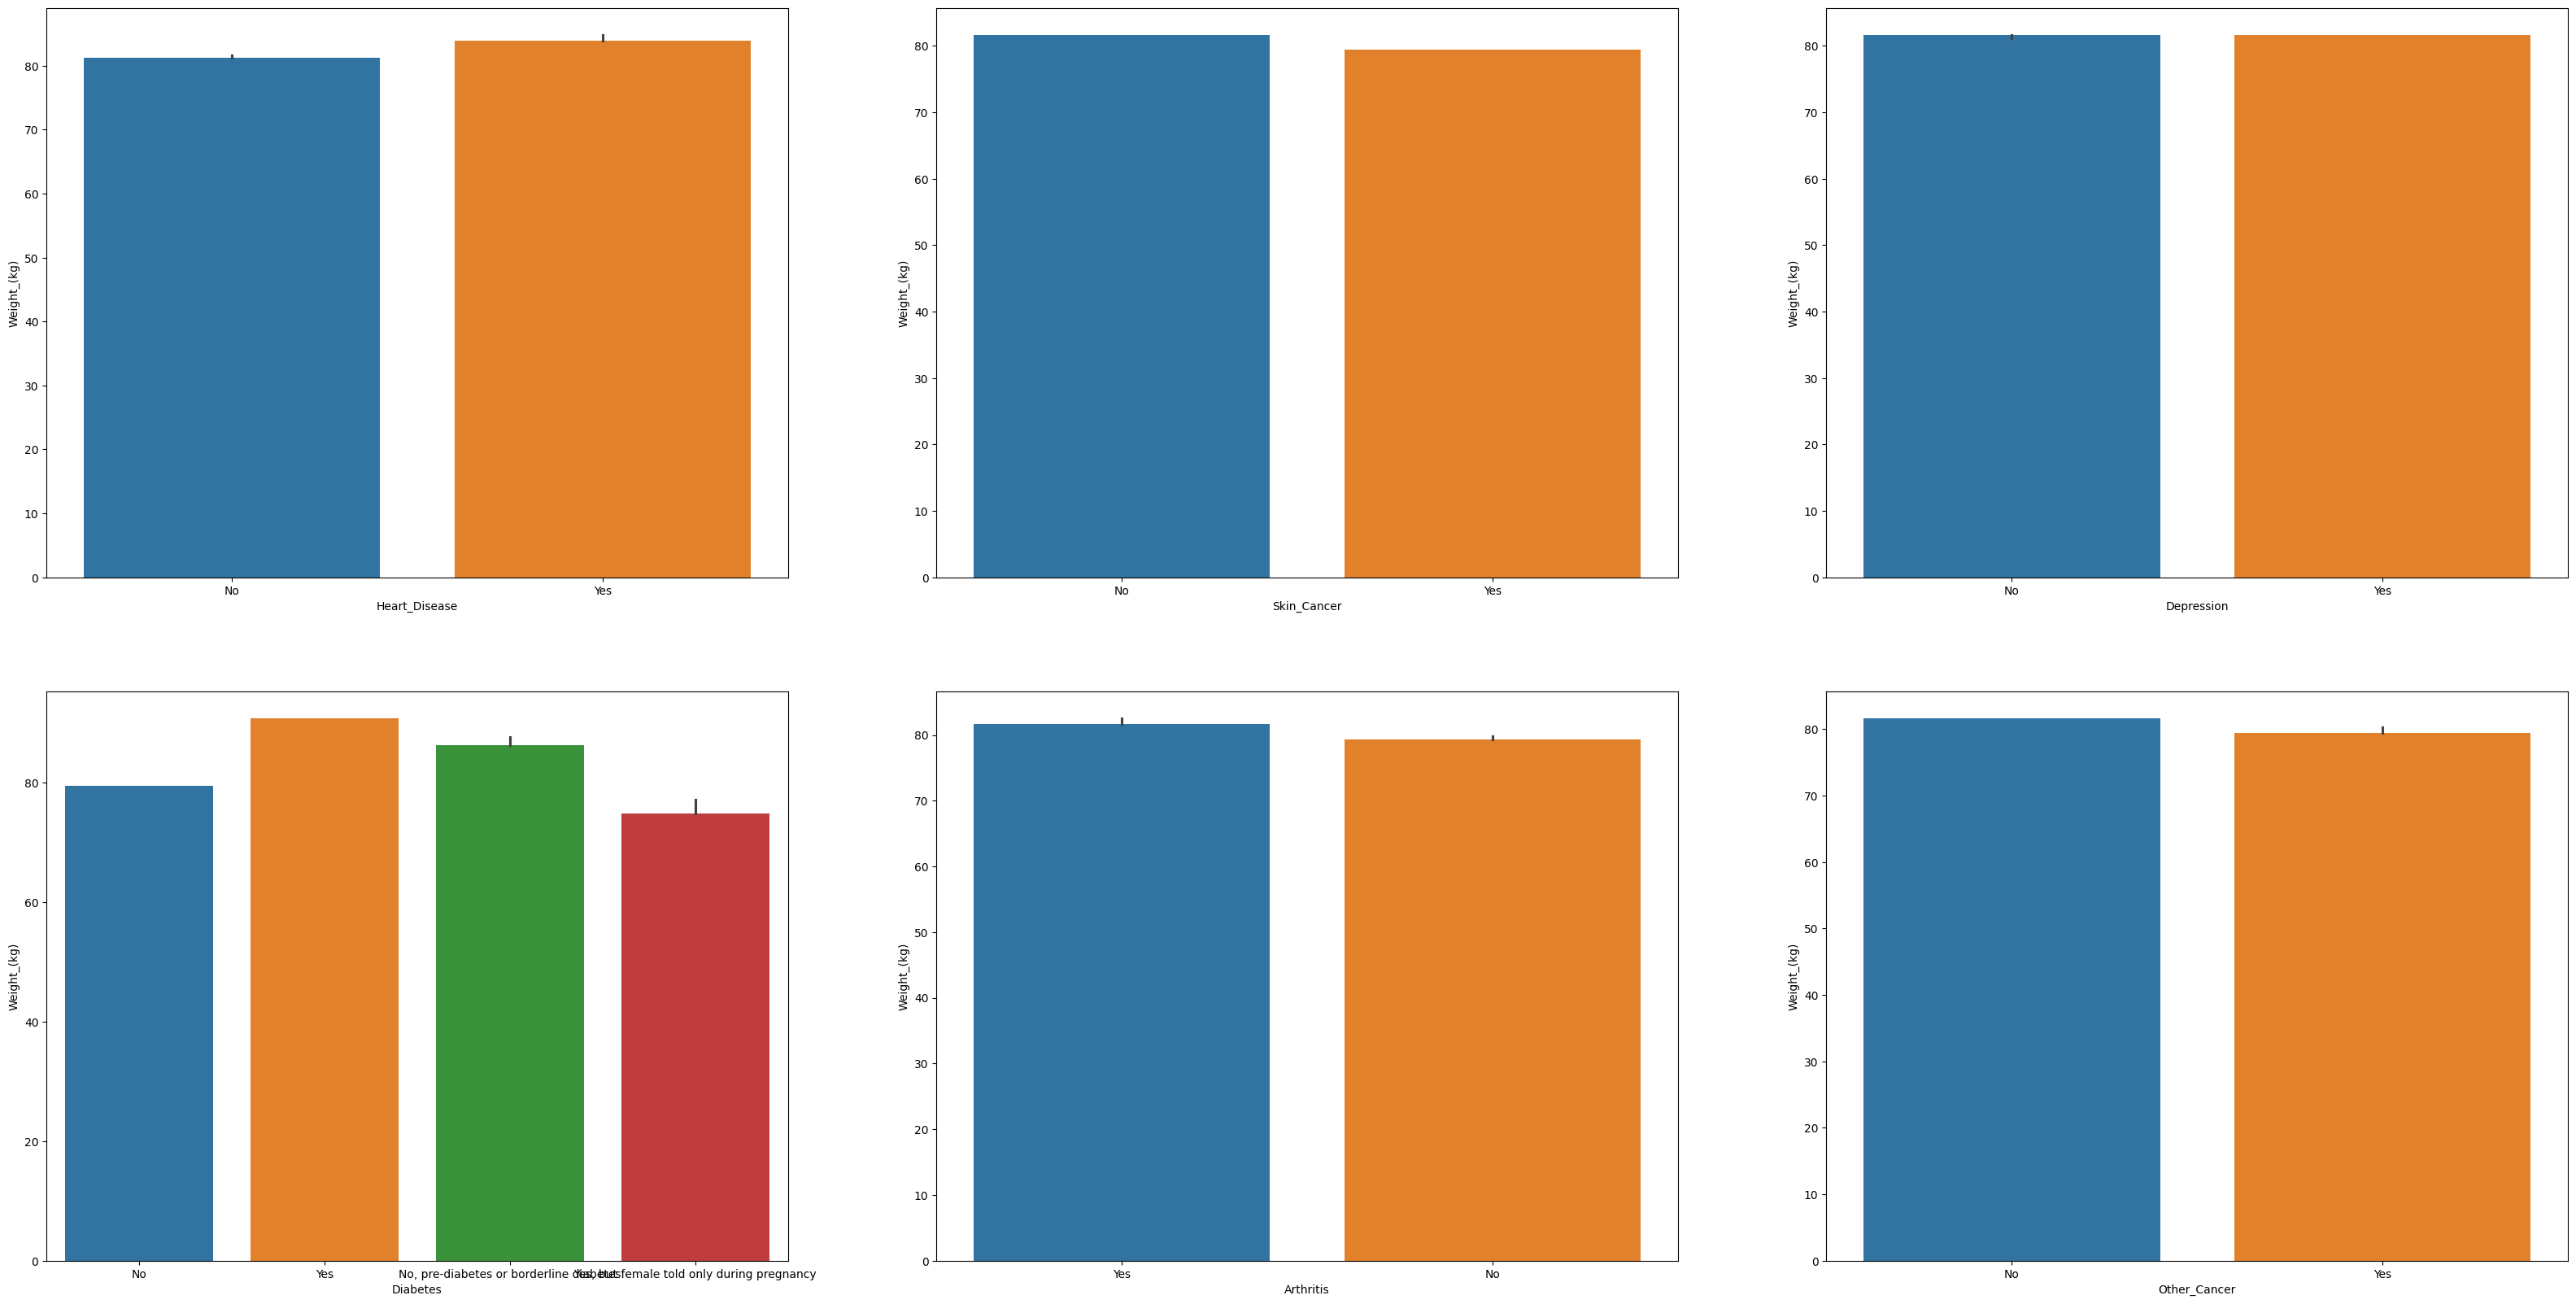

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  sns.barplot(x = df[focus_cols[k]], y = df["Weight_(kg)"], ax = ax[i, j], estimator = np.median, hue = df[focus_cols[k]])
  k = k+1



*   Weight column is also not associated with any diseases.



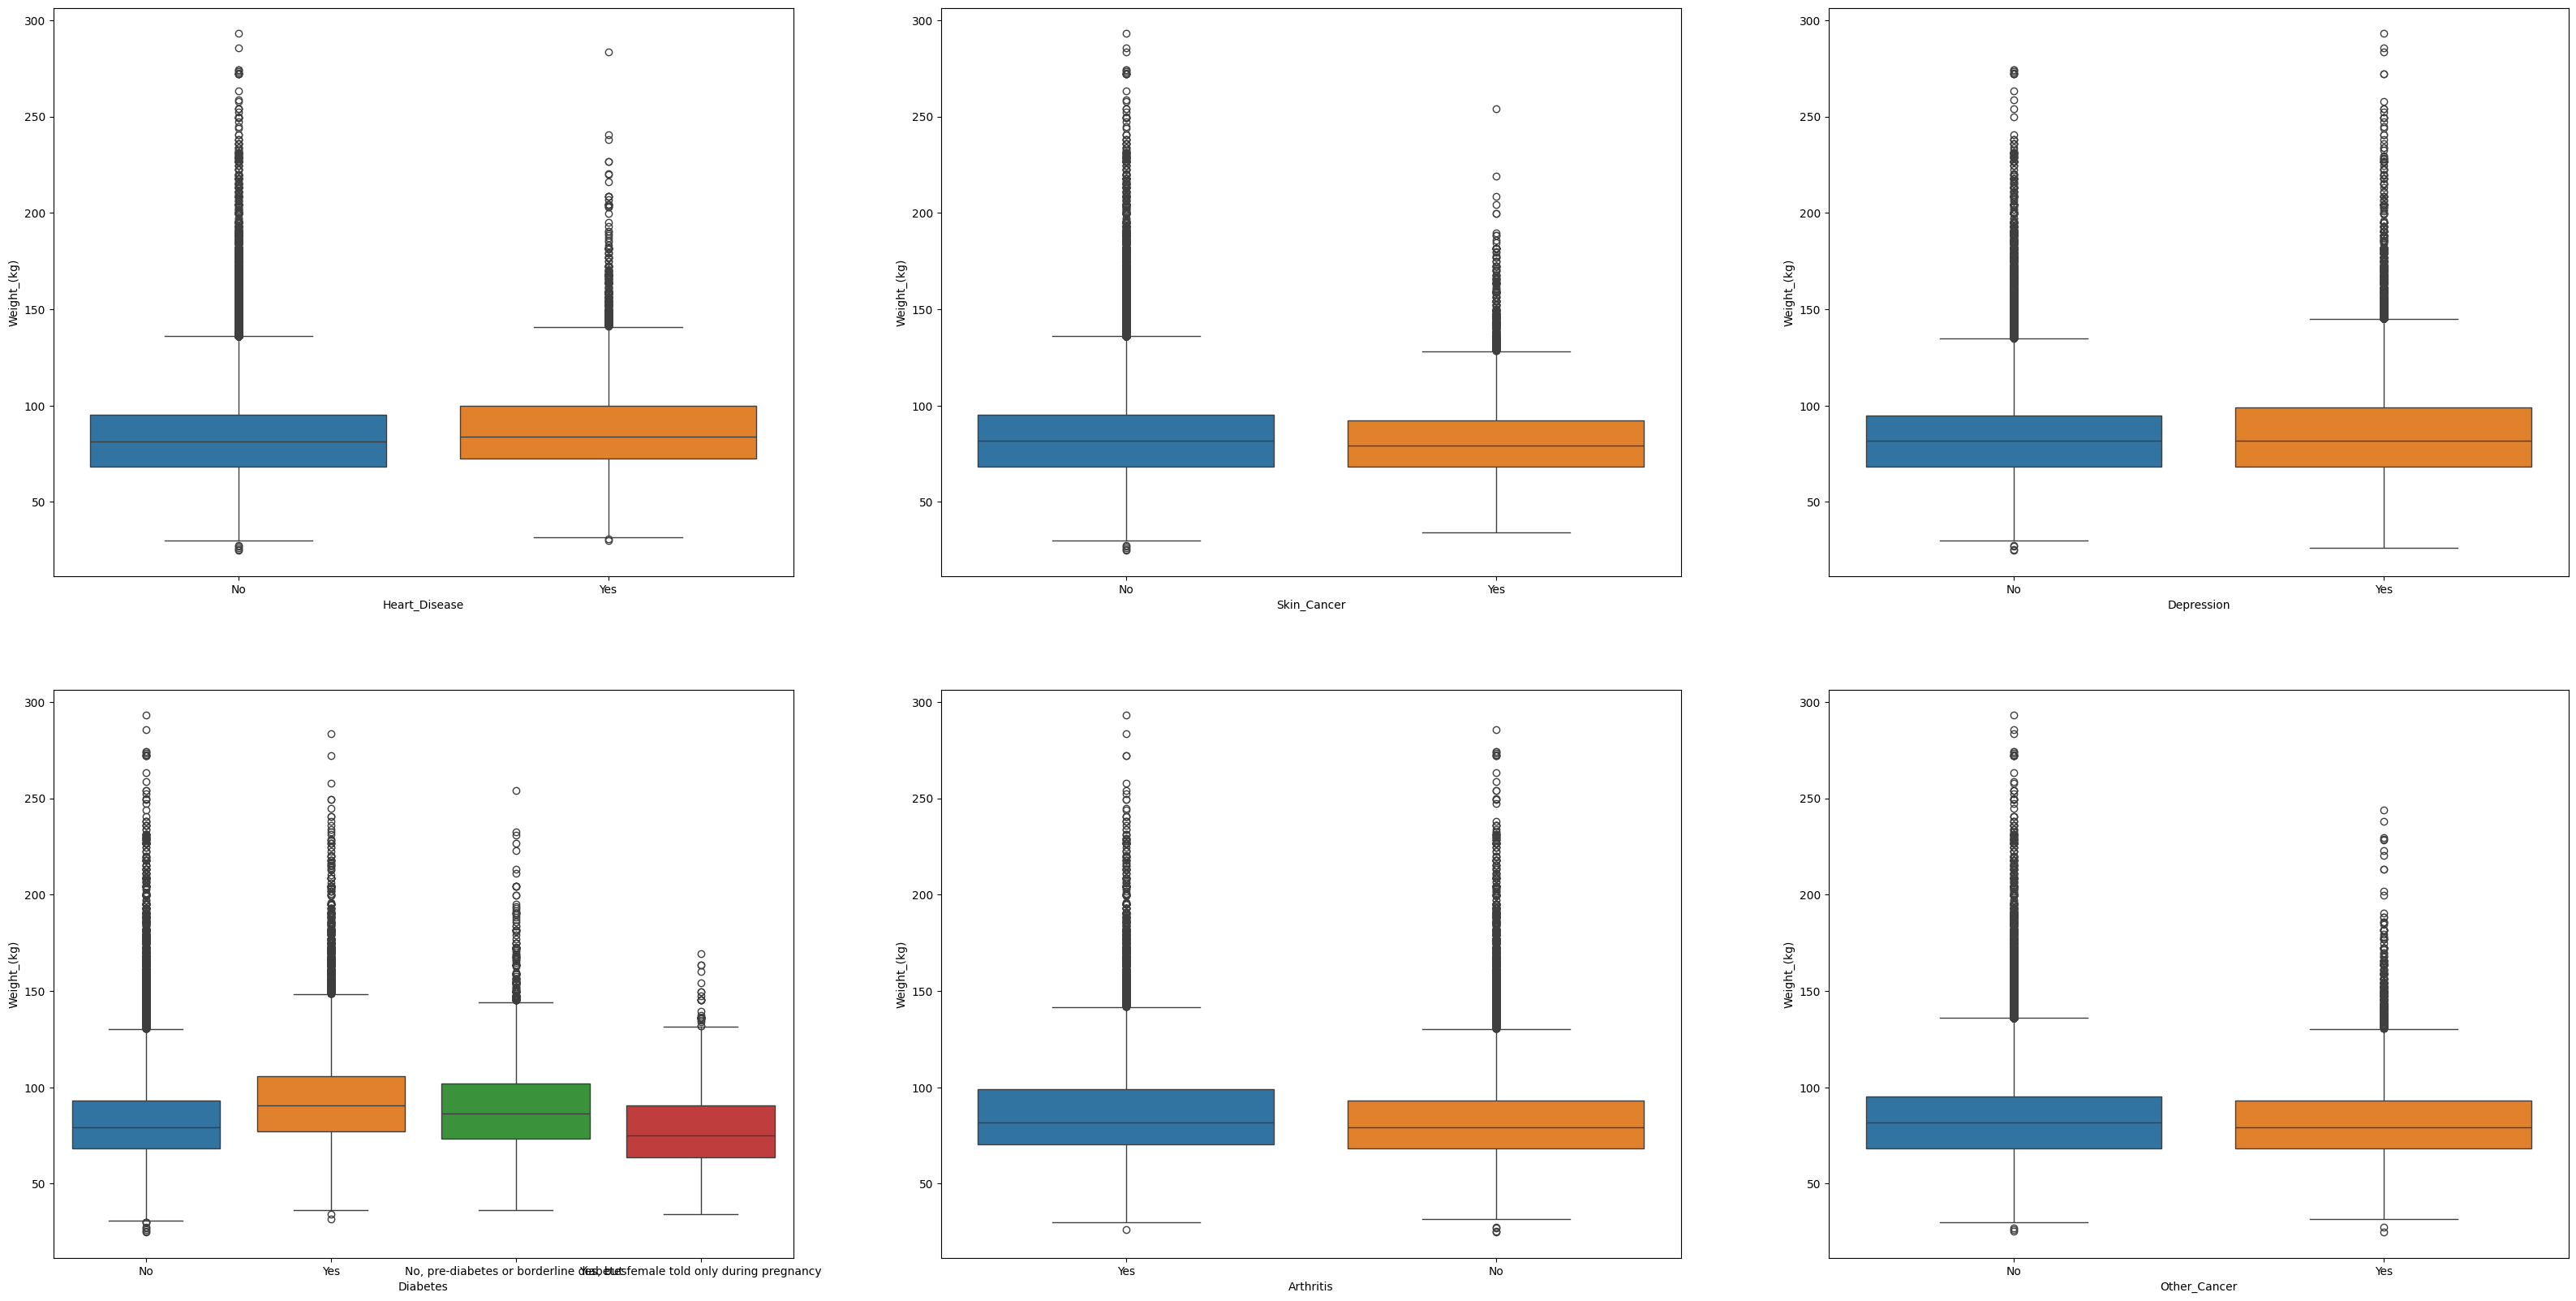

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (40,20))
k = 0
for i, j in axes:
  sns.boxplot(x = df[focus_cols[k]], y = df["Weight_(kg)"], ax = ax[i, j], hue = df[focus_cols[k]])
  k = k+1

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
remaining_num_cols = ["BMI", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

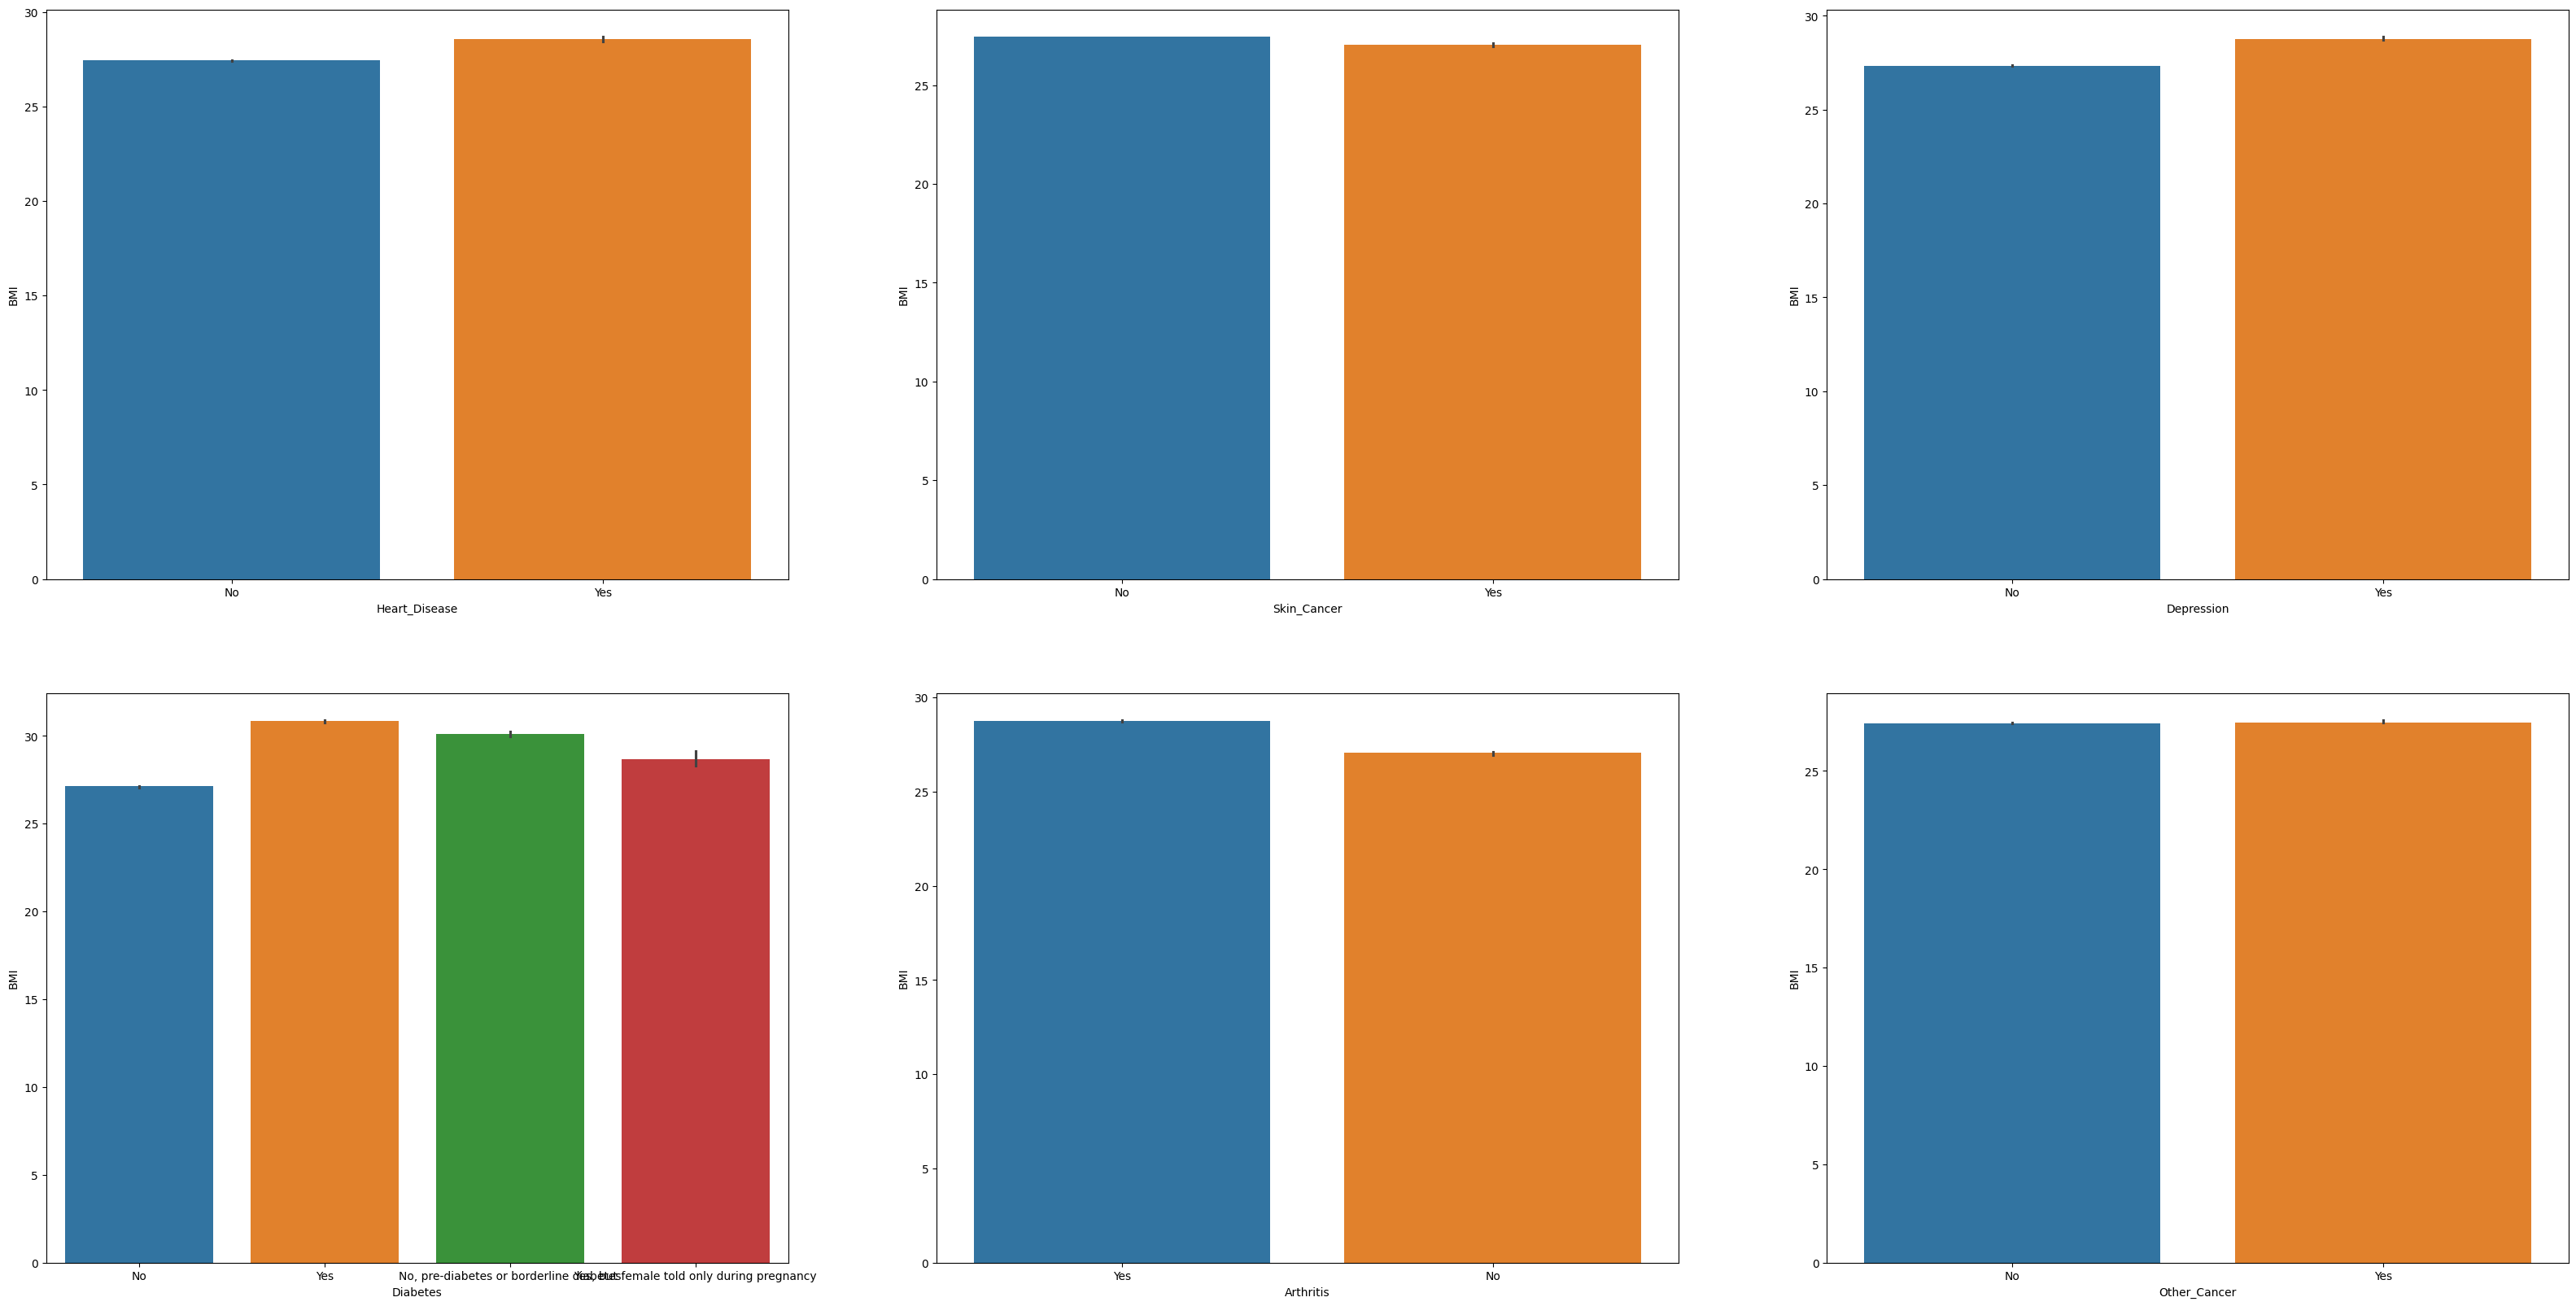

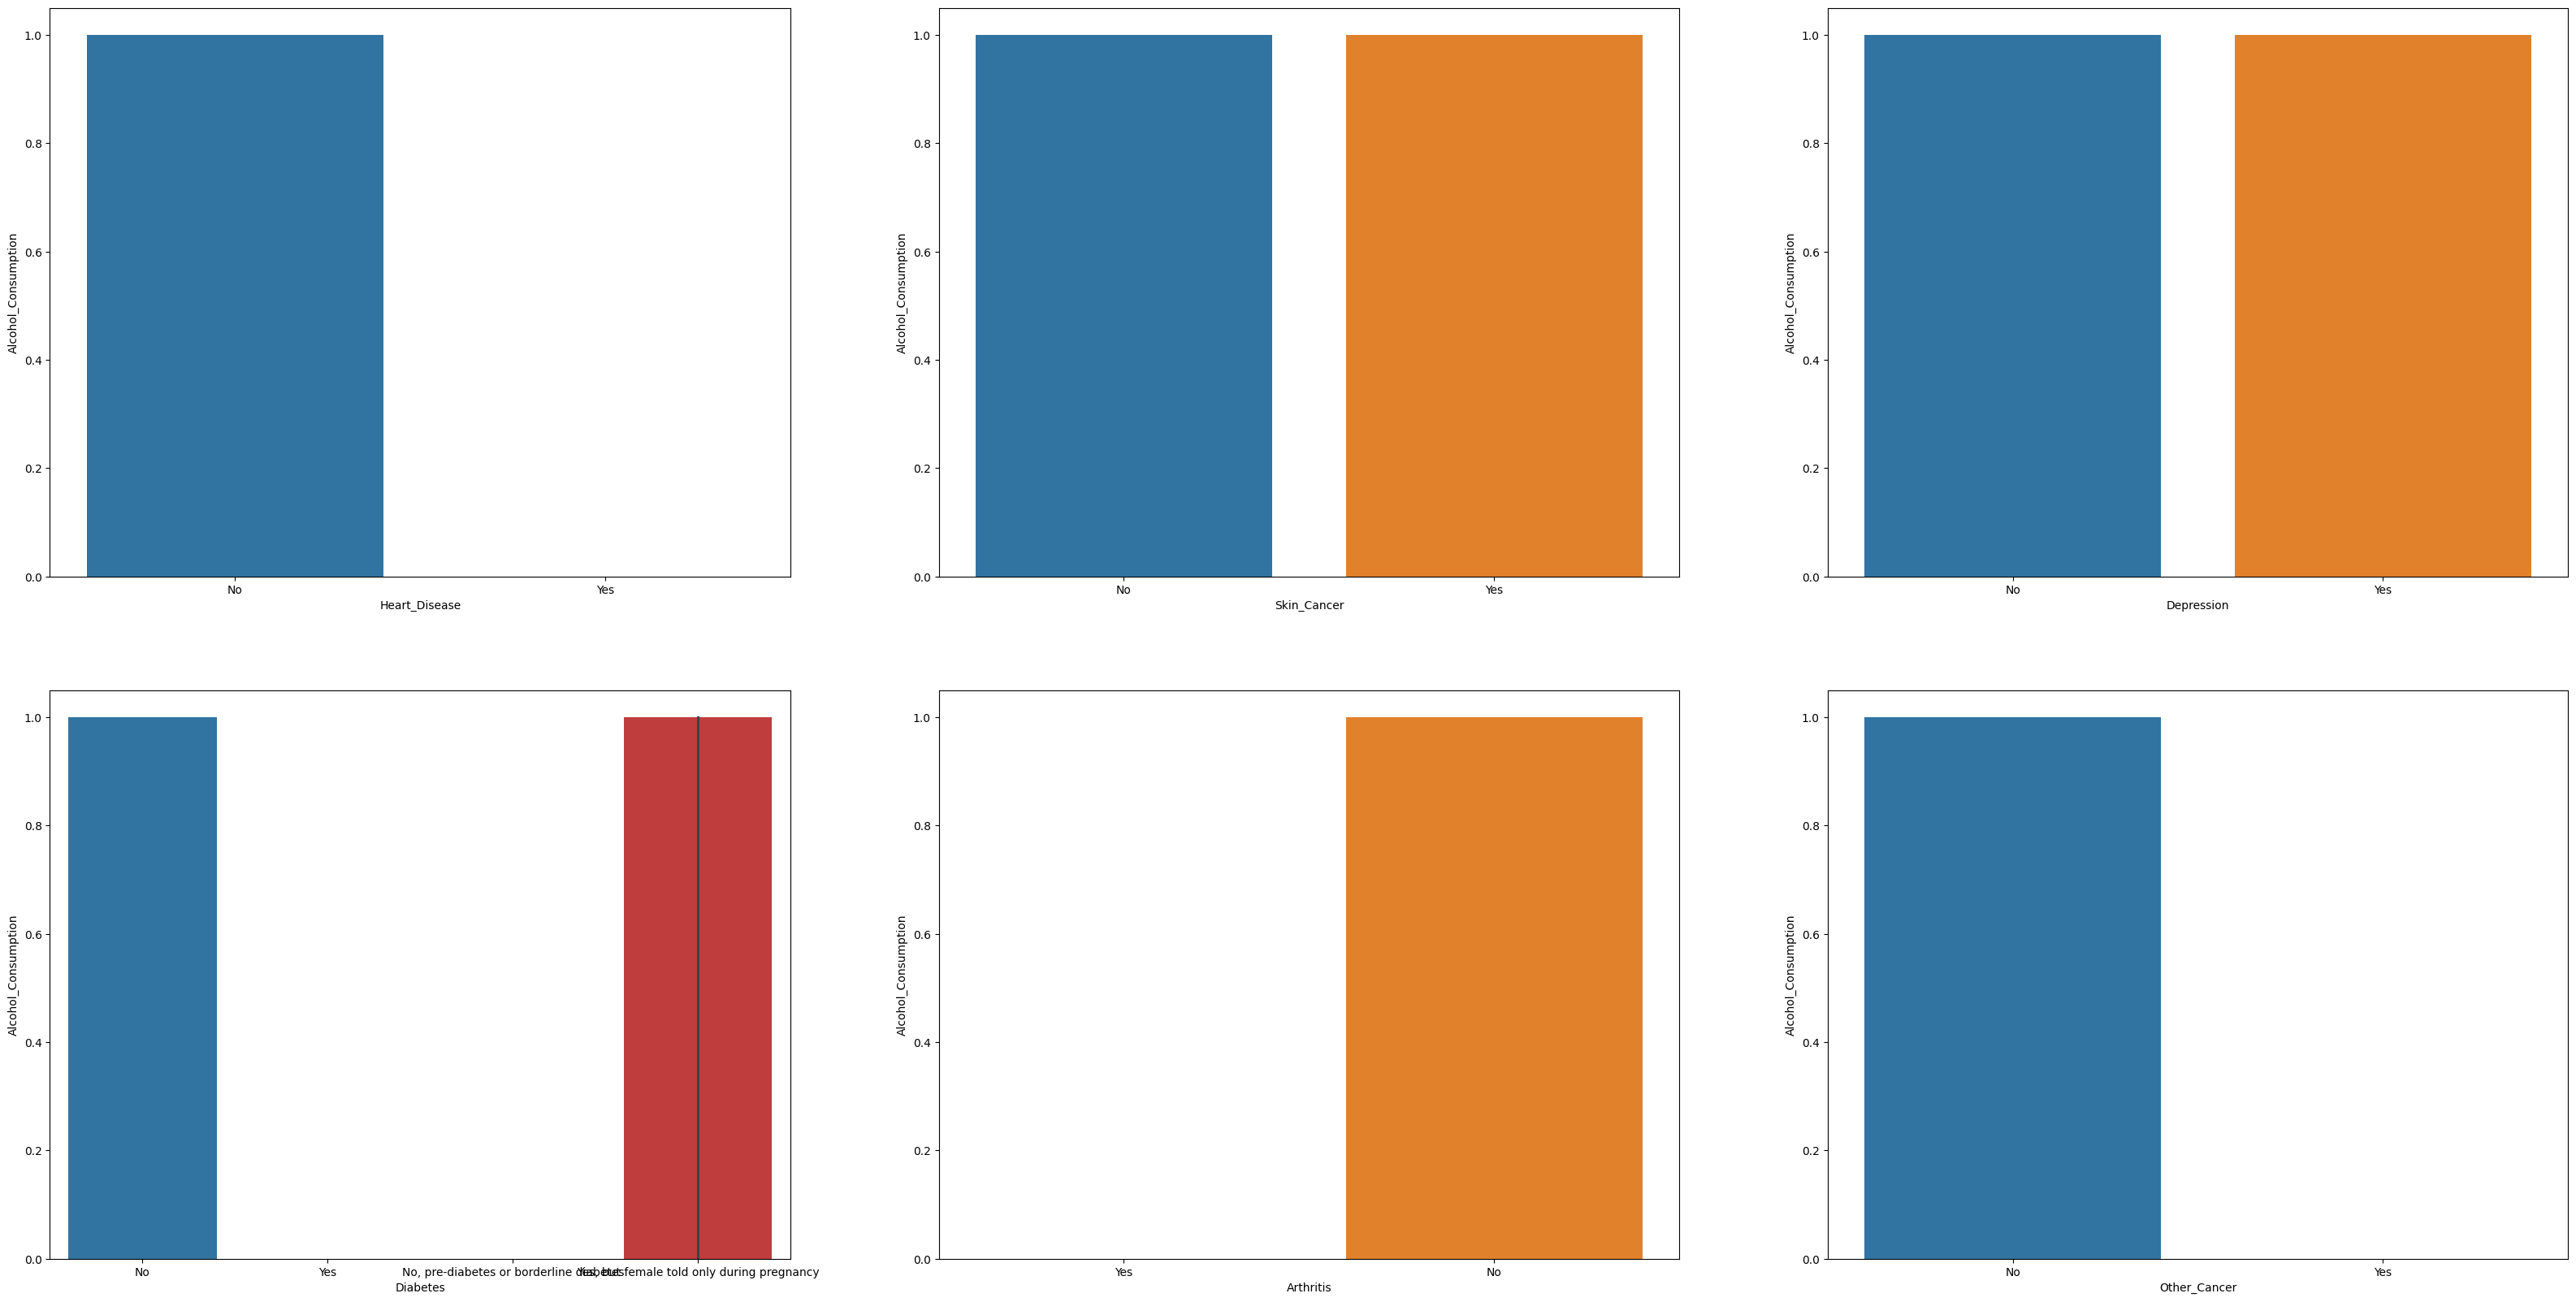

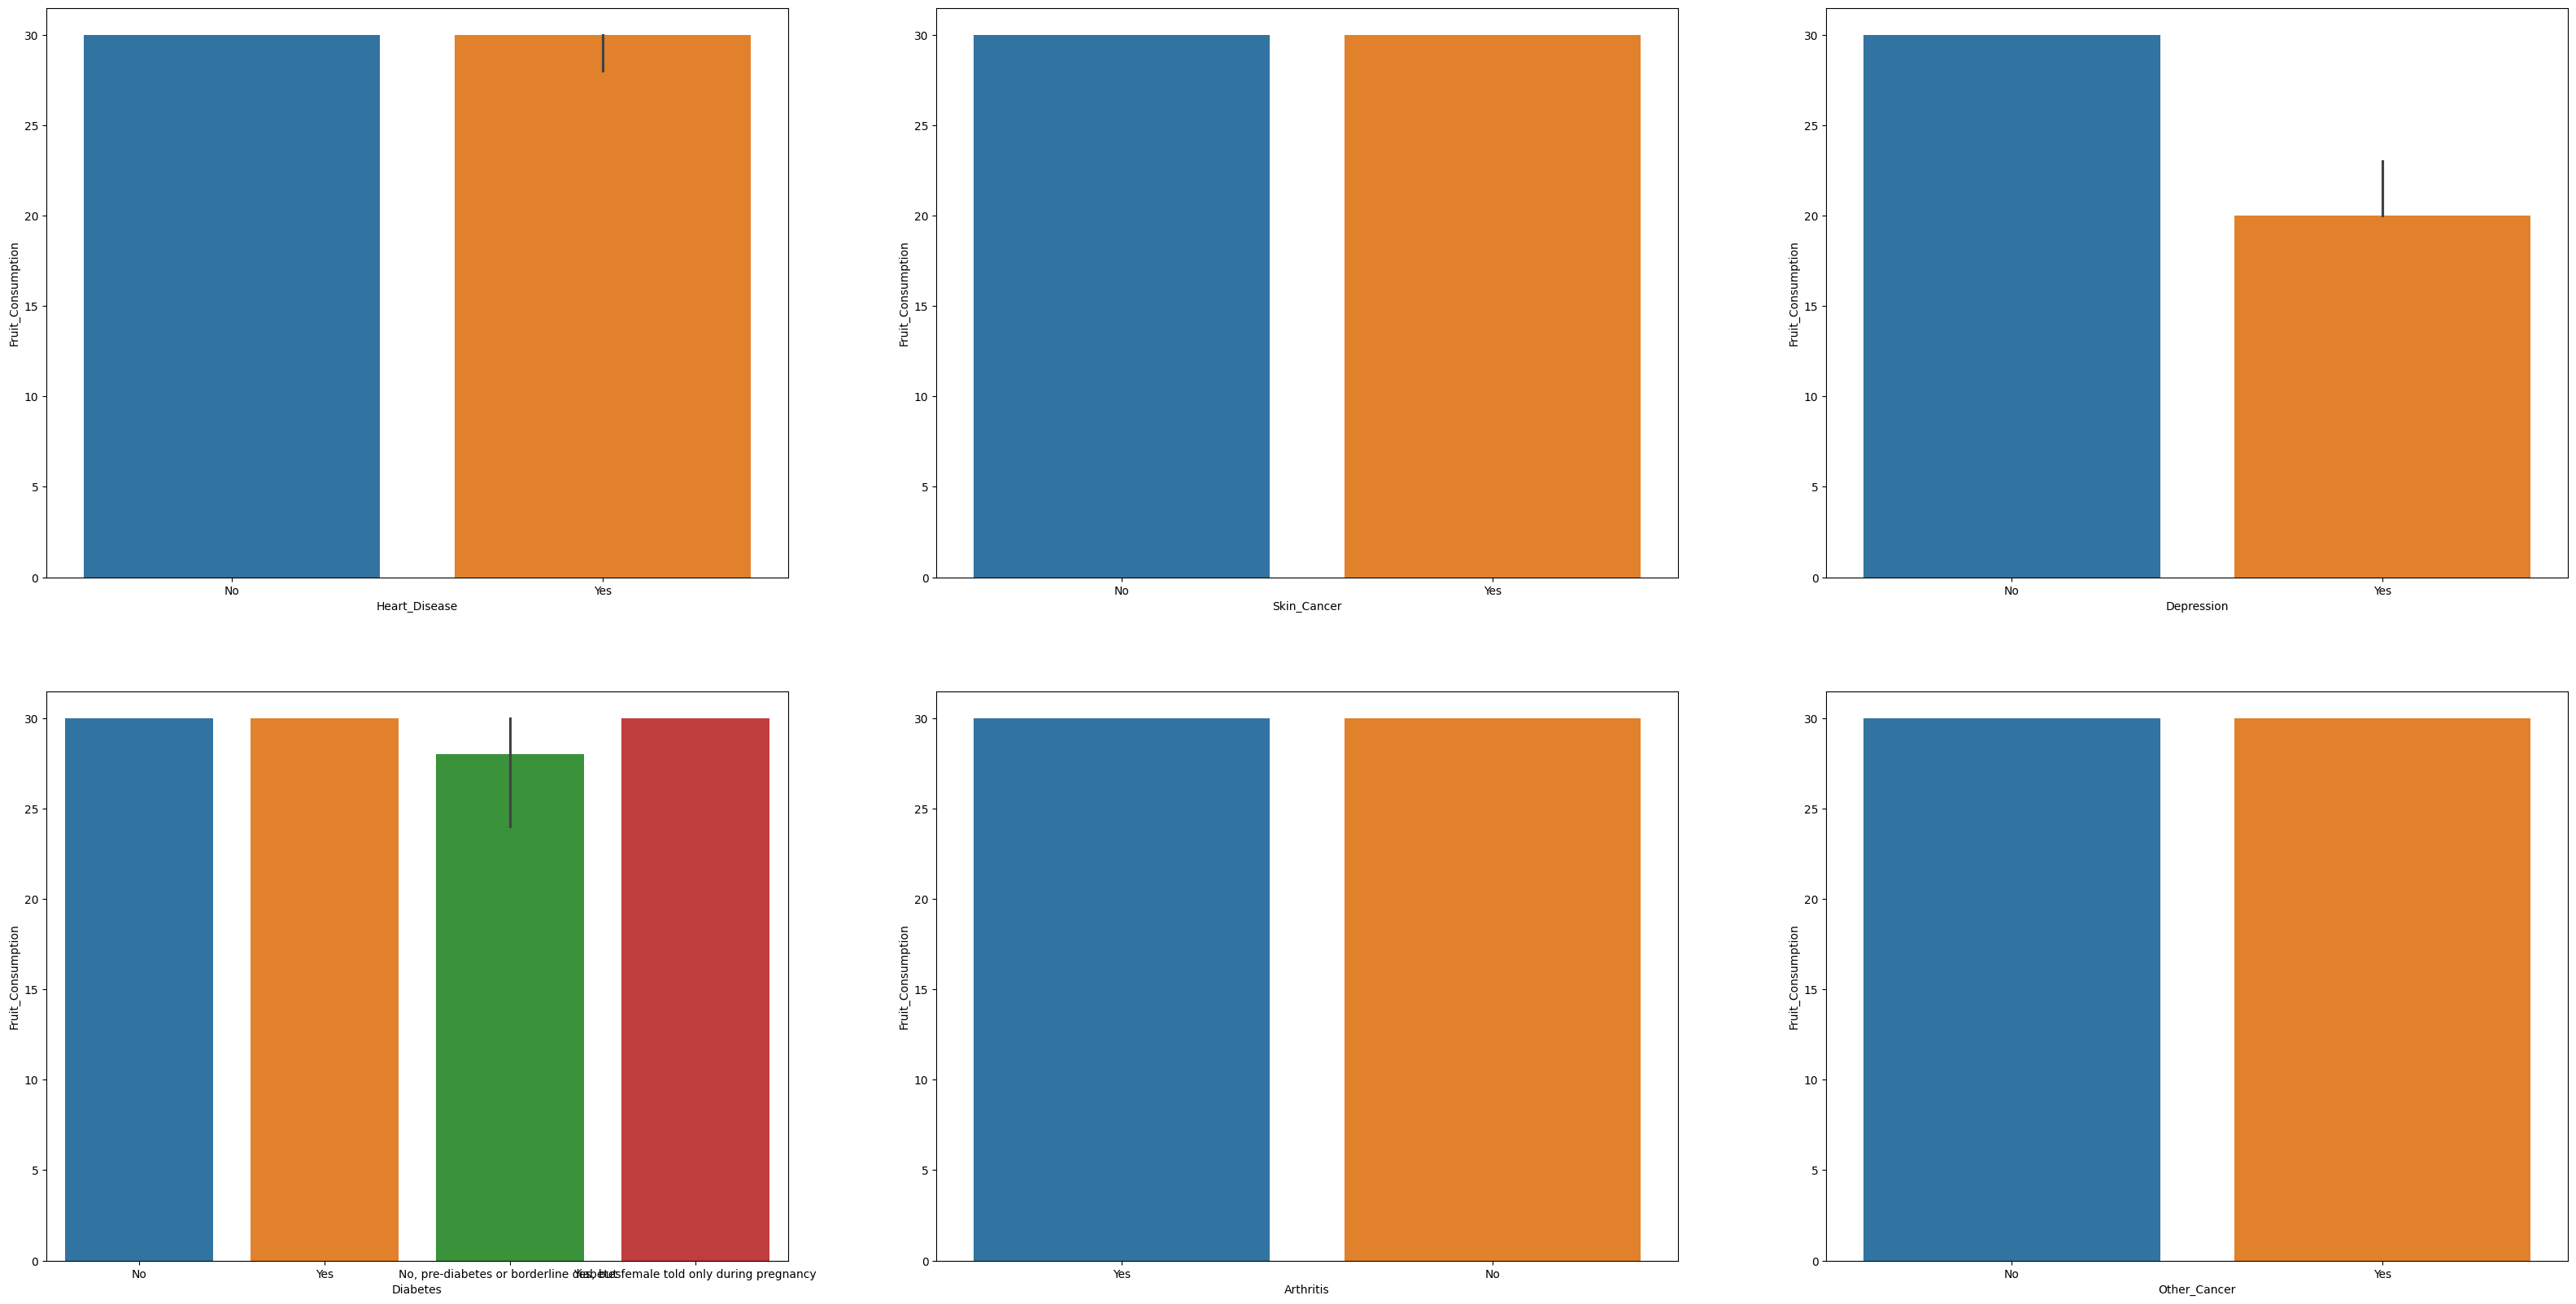

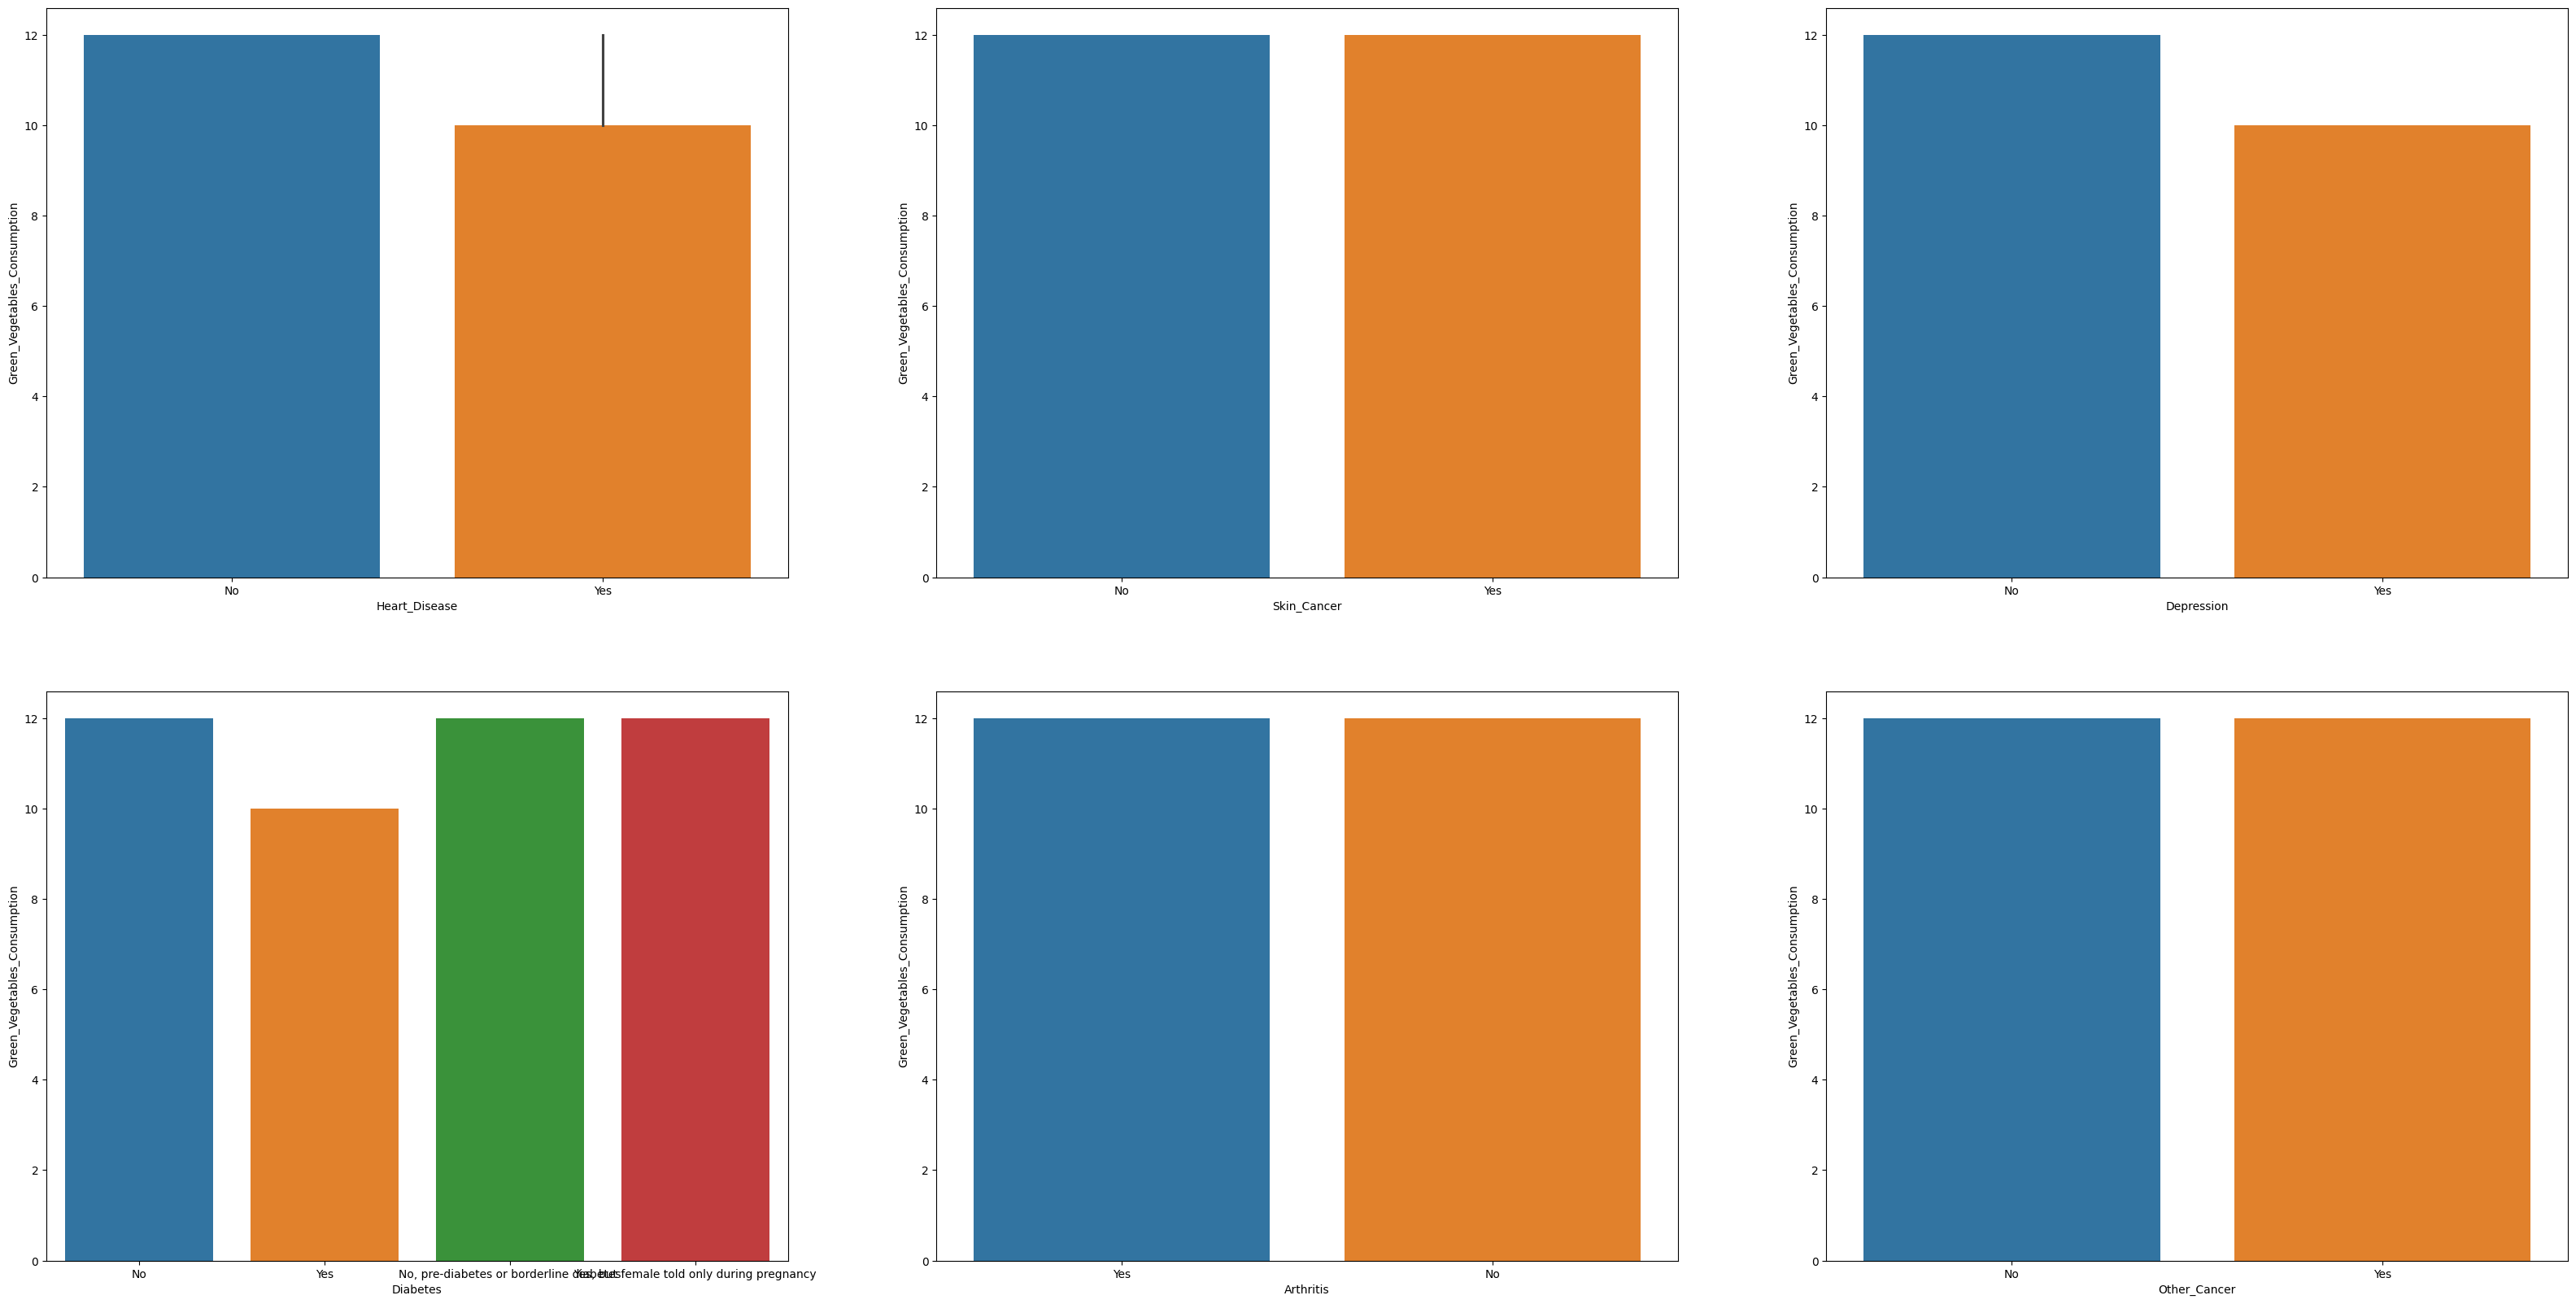

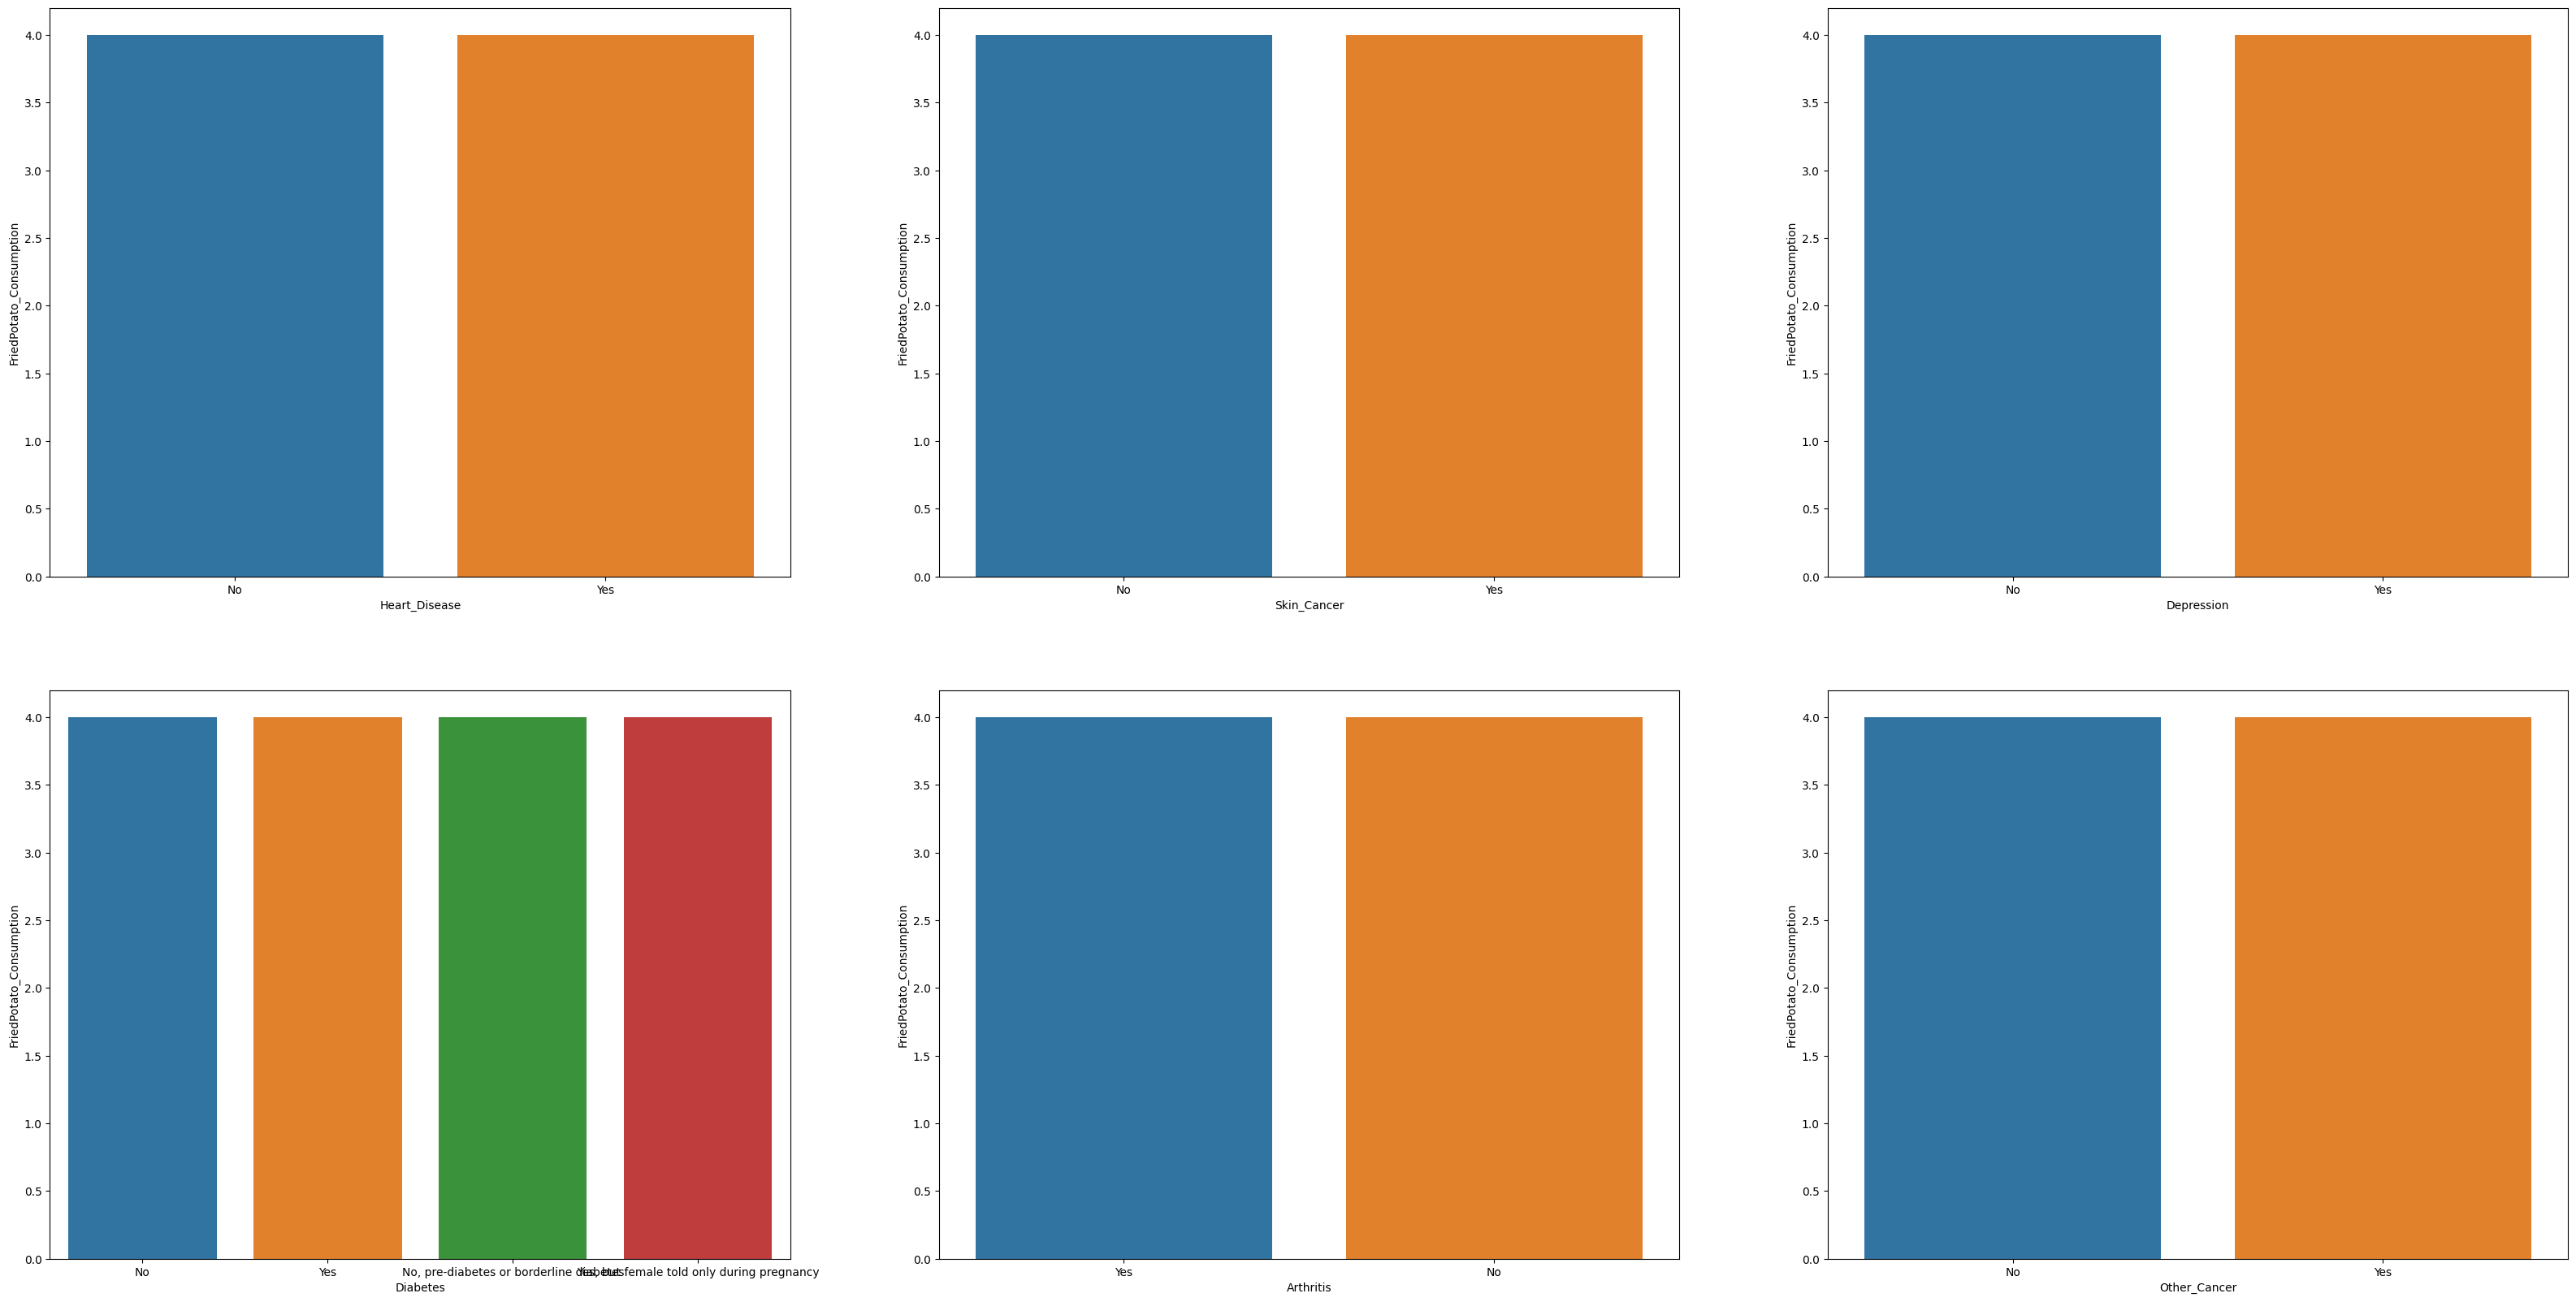

In [ ]:
for rem in remaining_num_cols:
  fig, ax = plt.subplots(2, 3, figsize = (40,20))
  k = 0
  for i, j in axes:
    sns.barplot(x = df[focus_cols[k]], y = df[rem], ax = ax[i, j], estimator = np.median, hue = df[focus_cols[k]])
    k = k+1

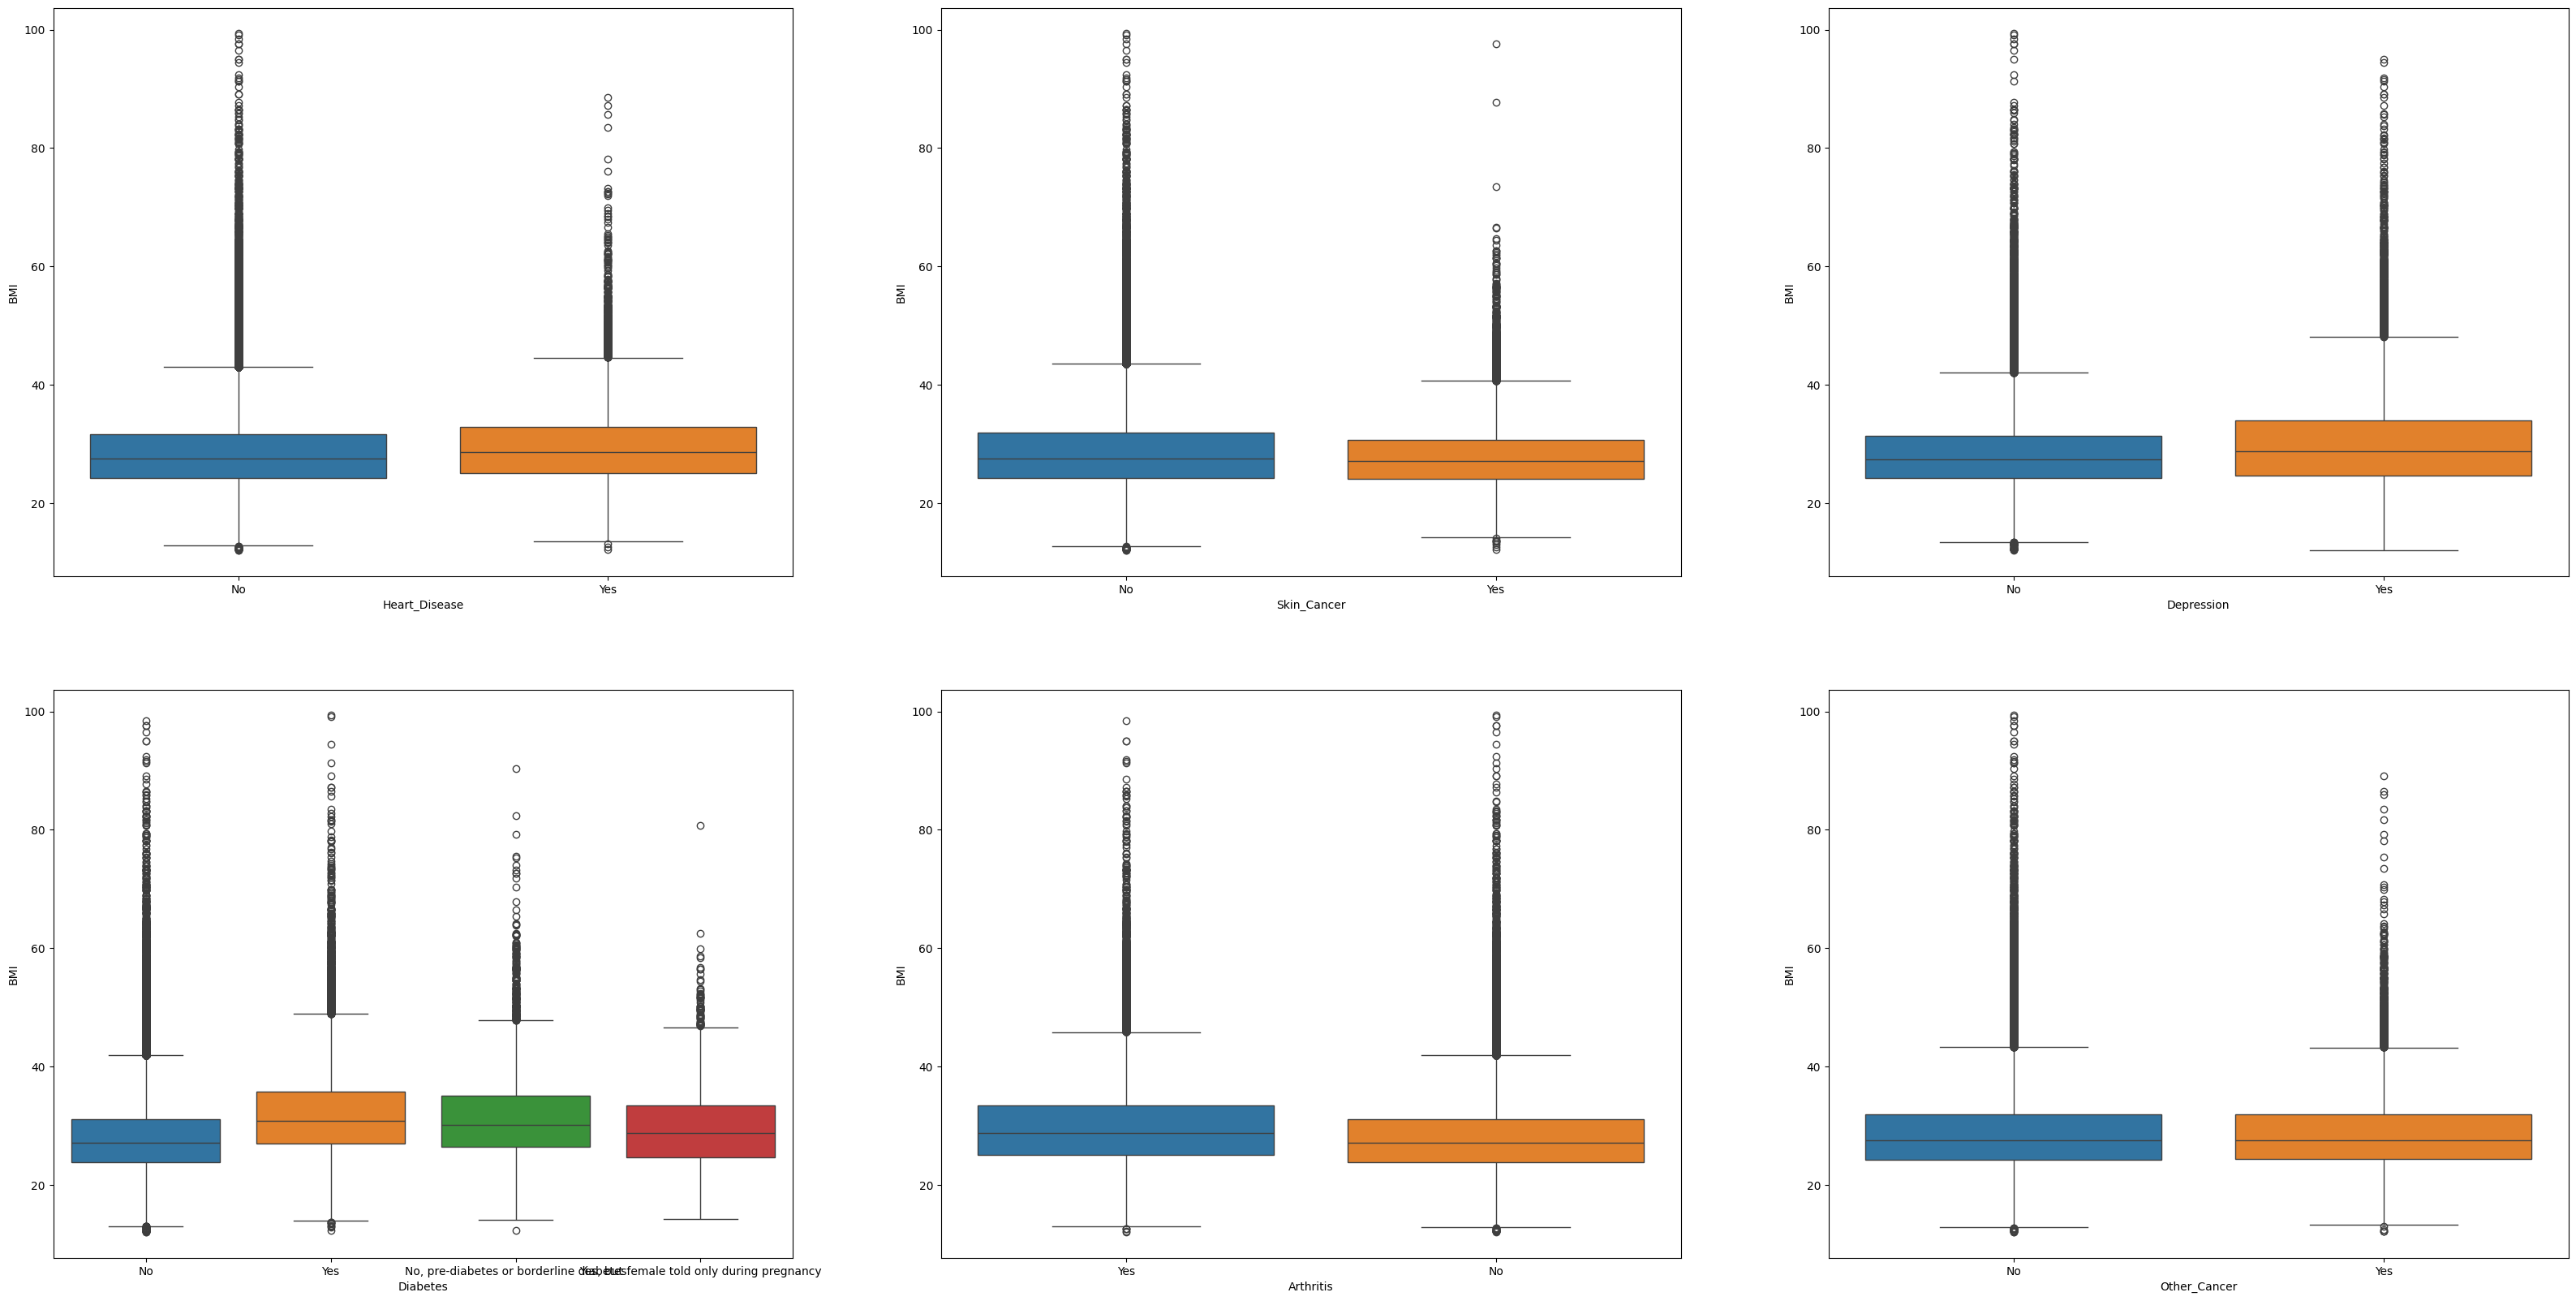

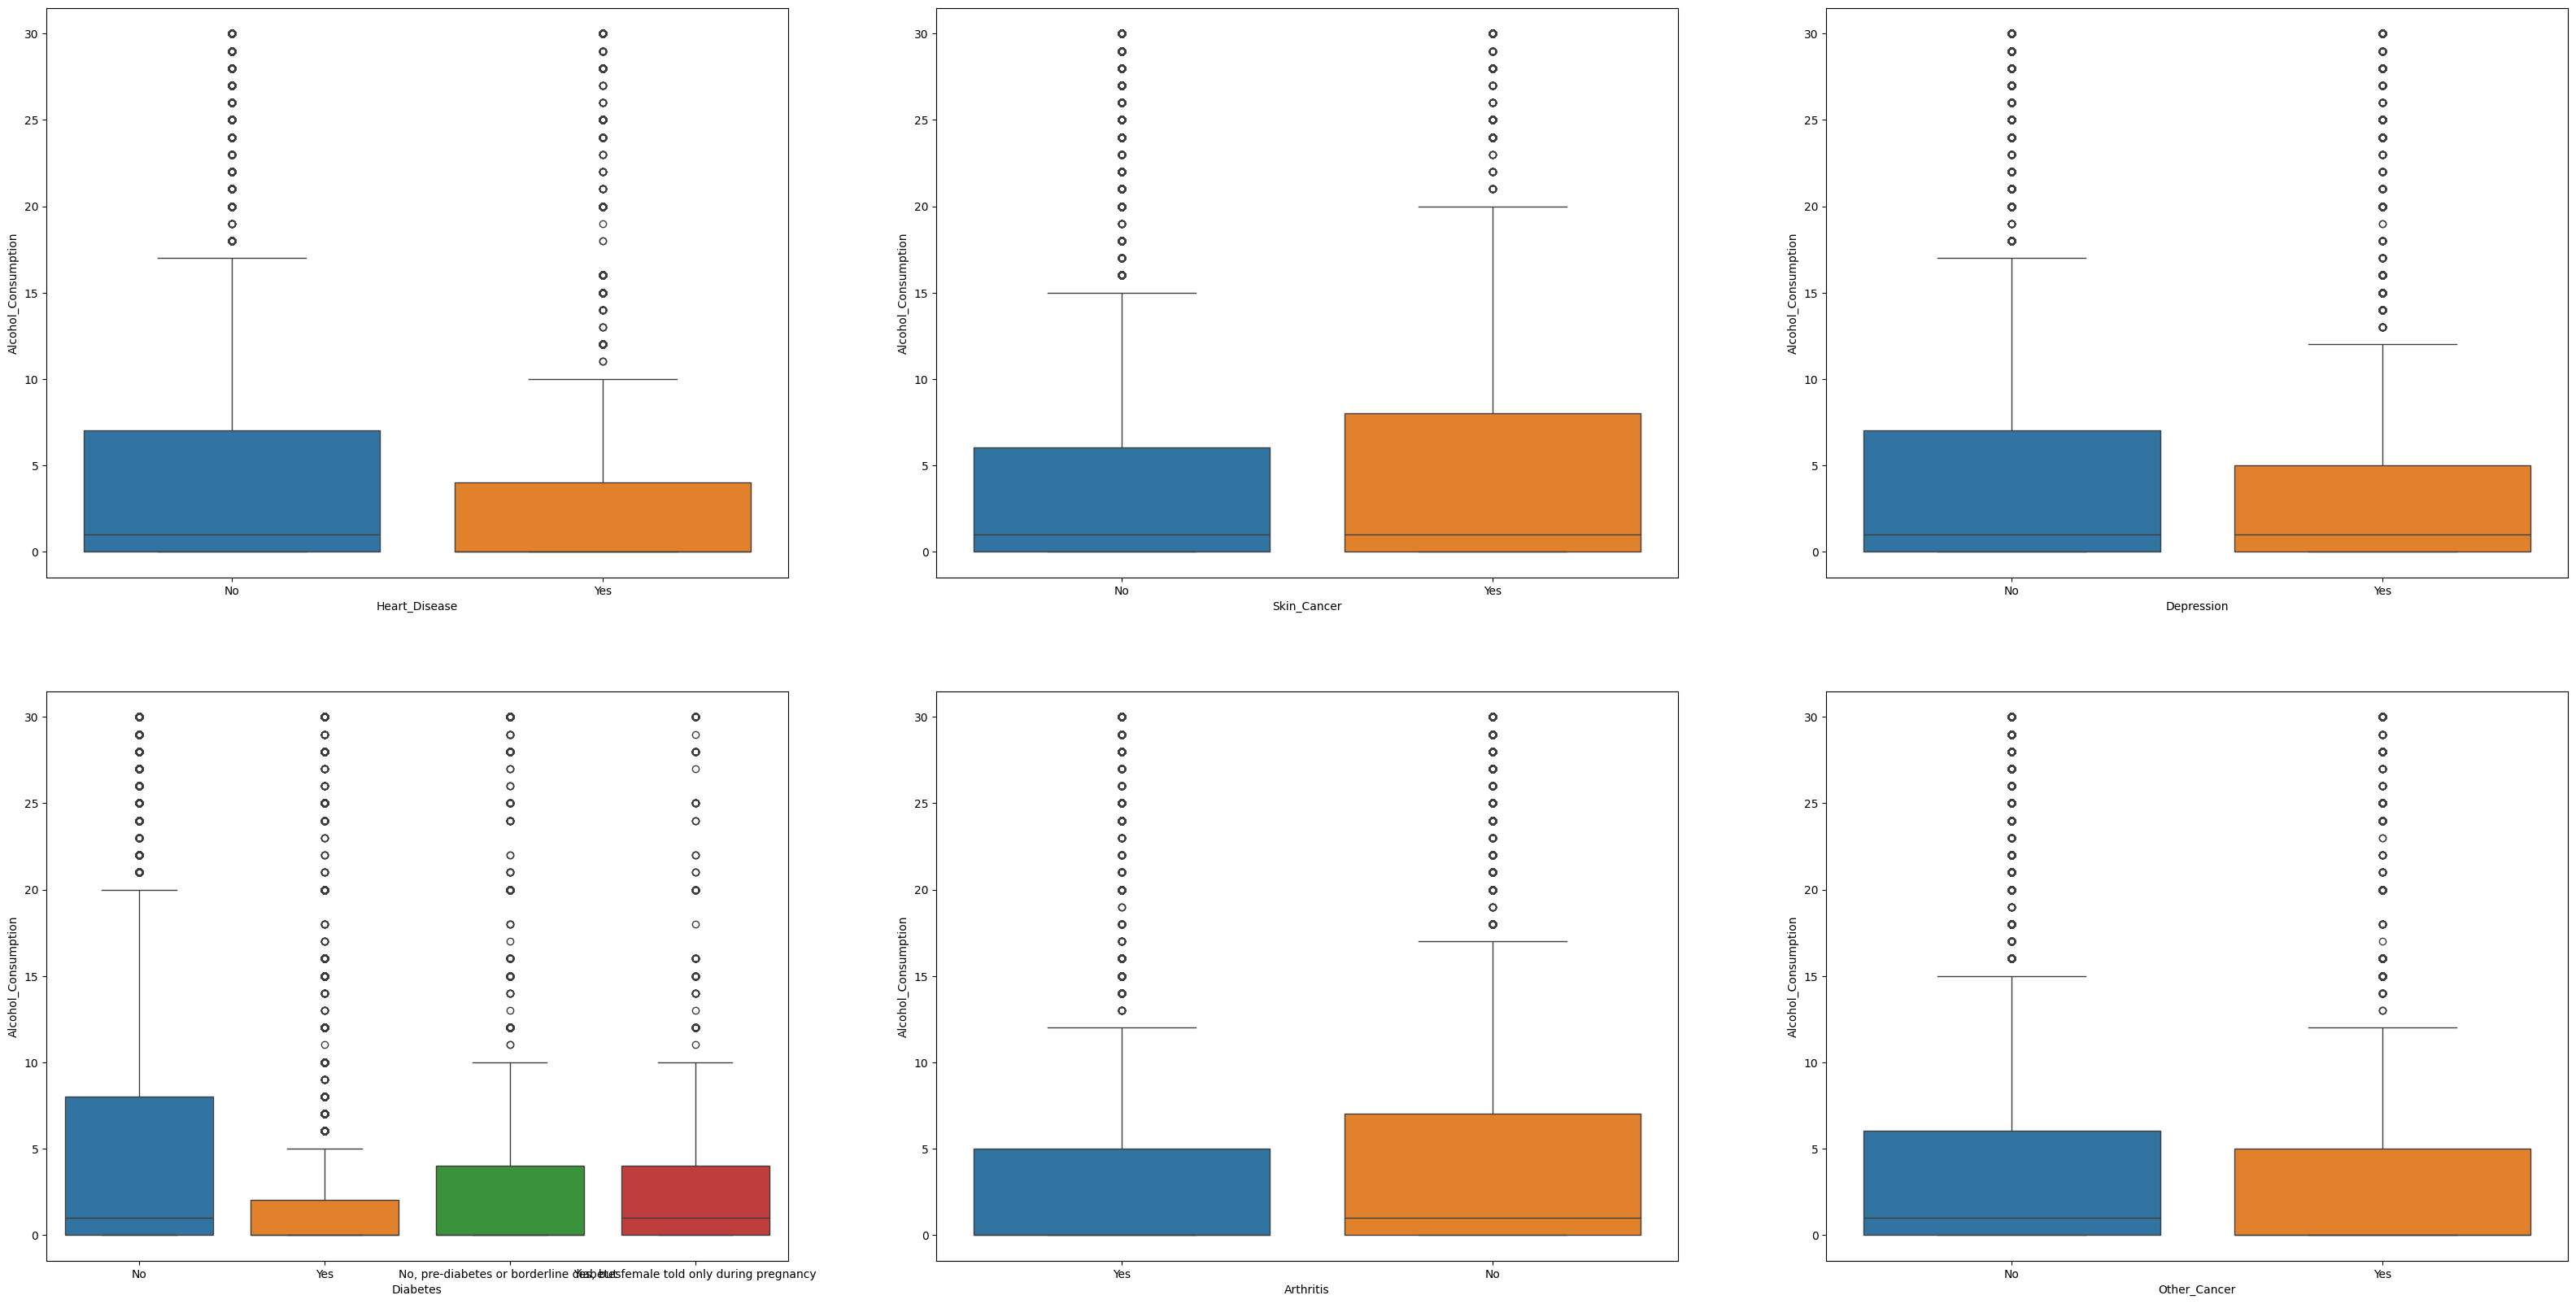

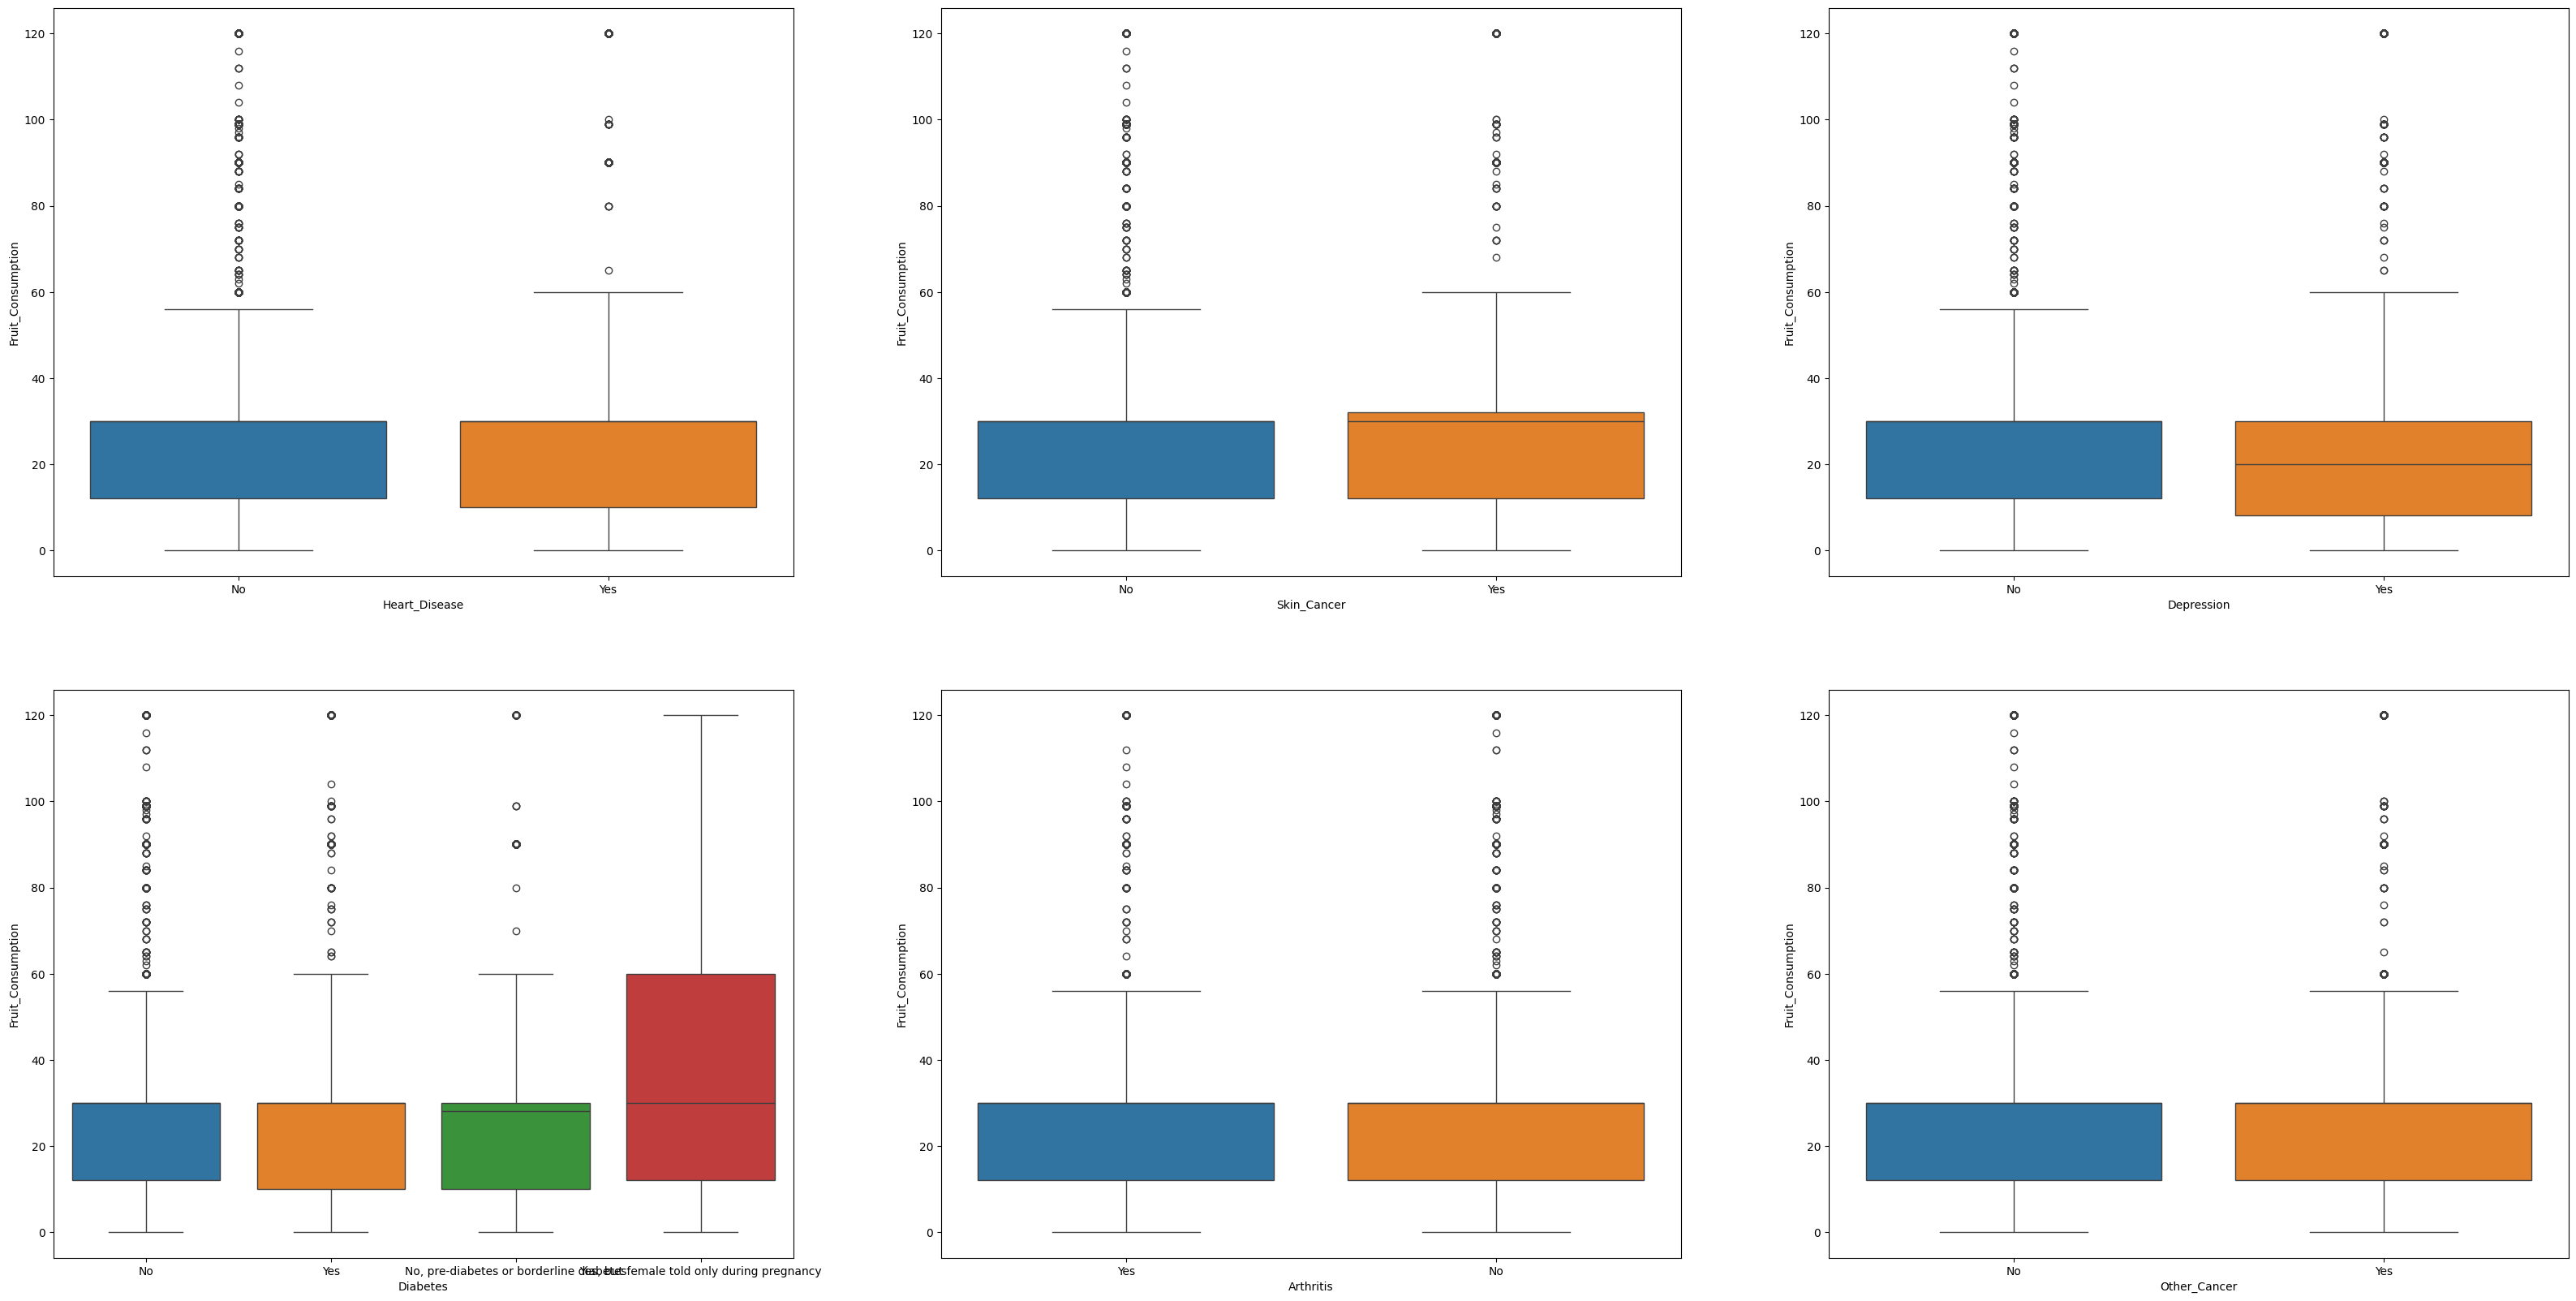

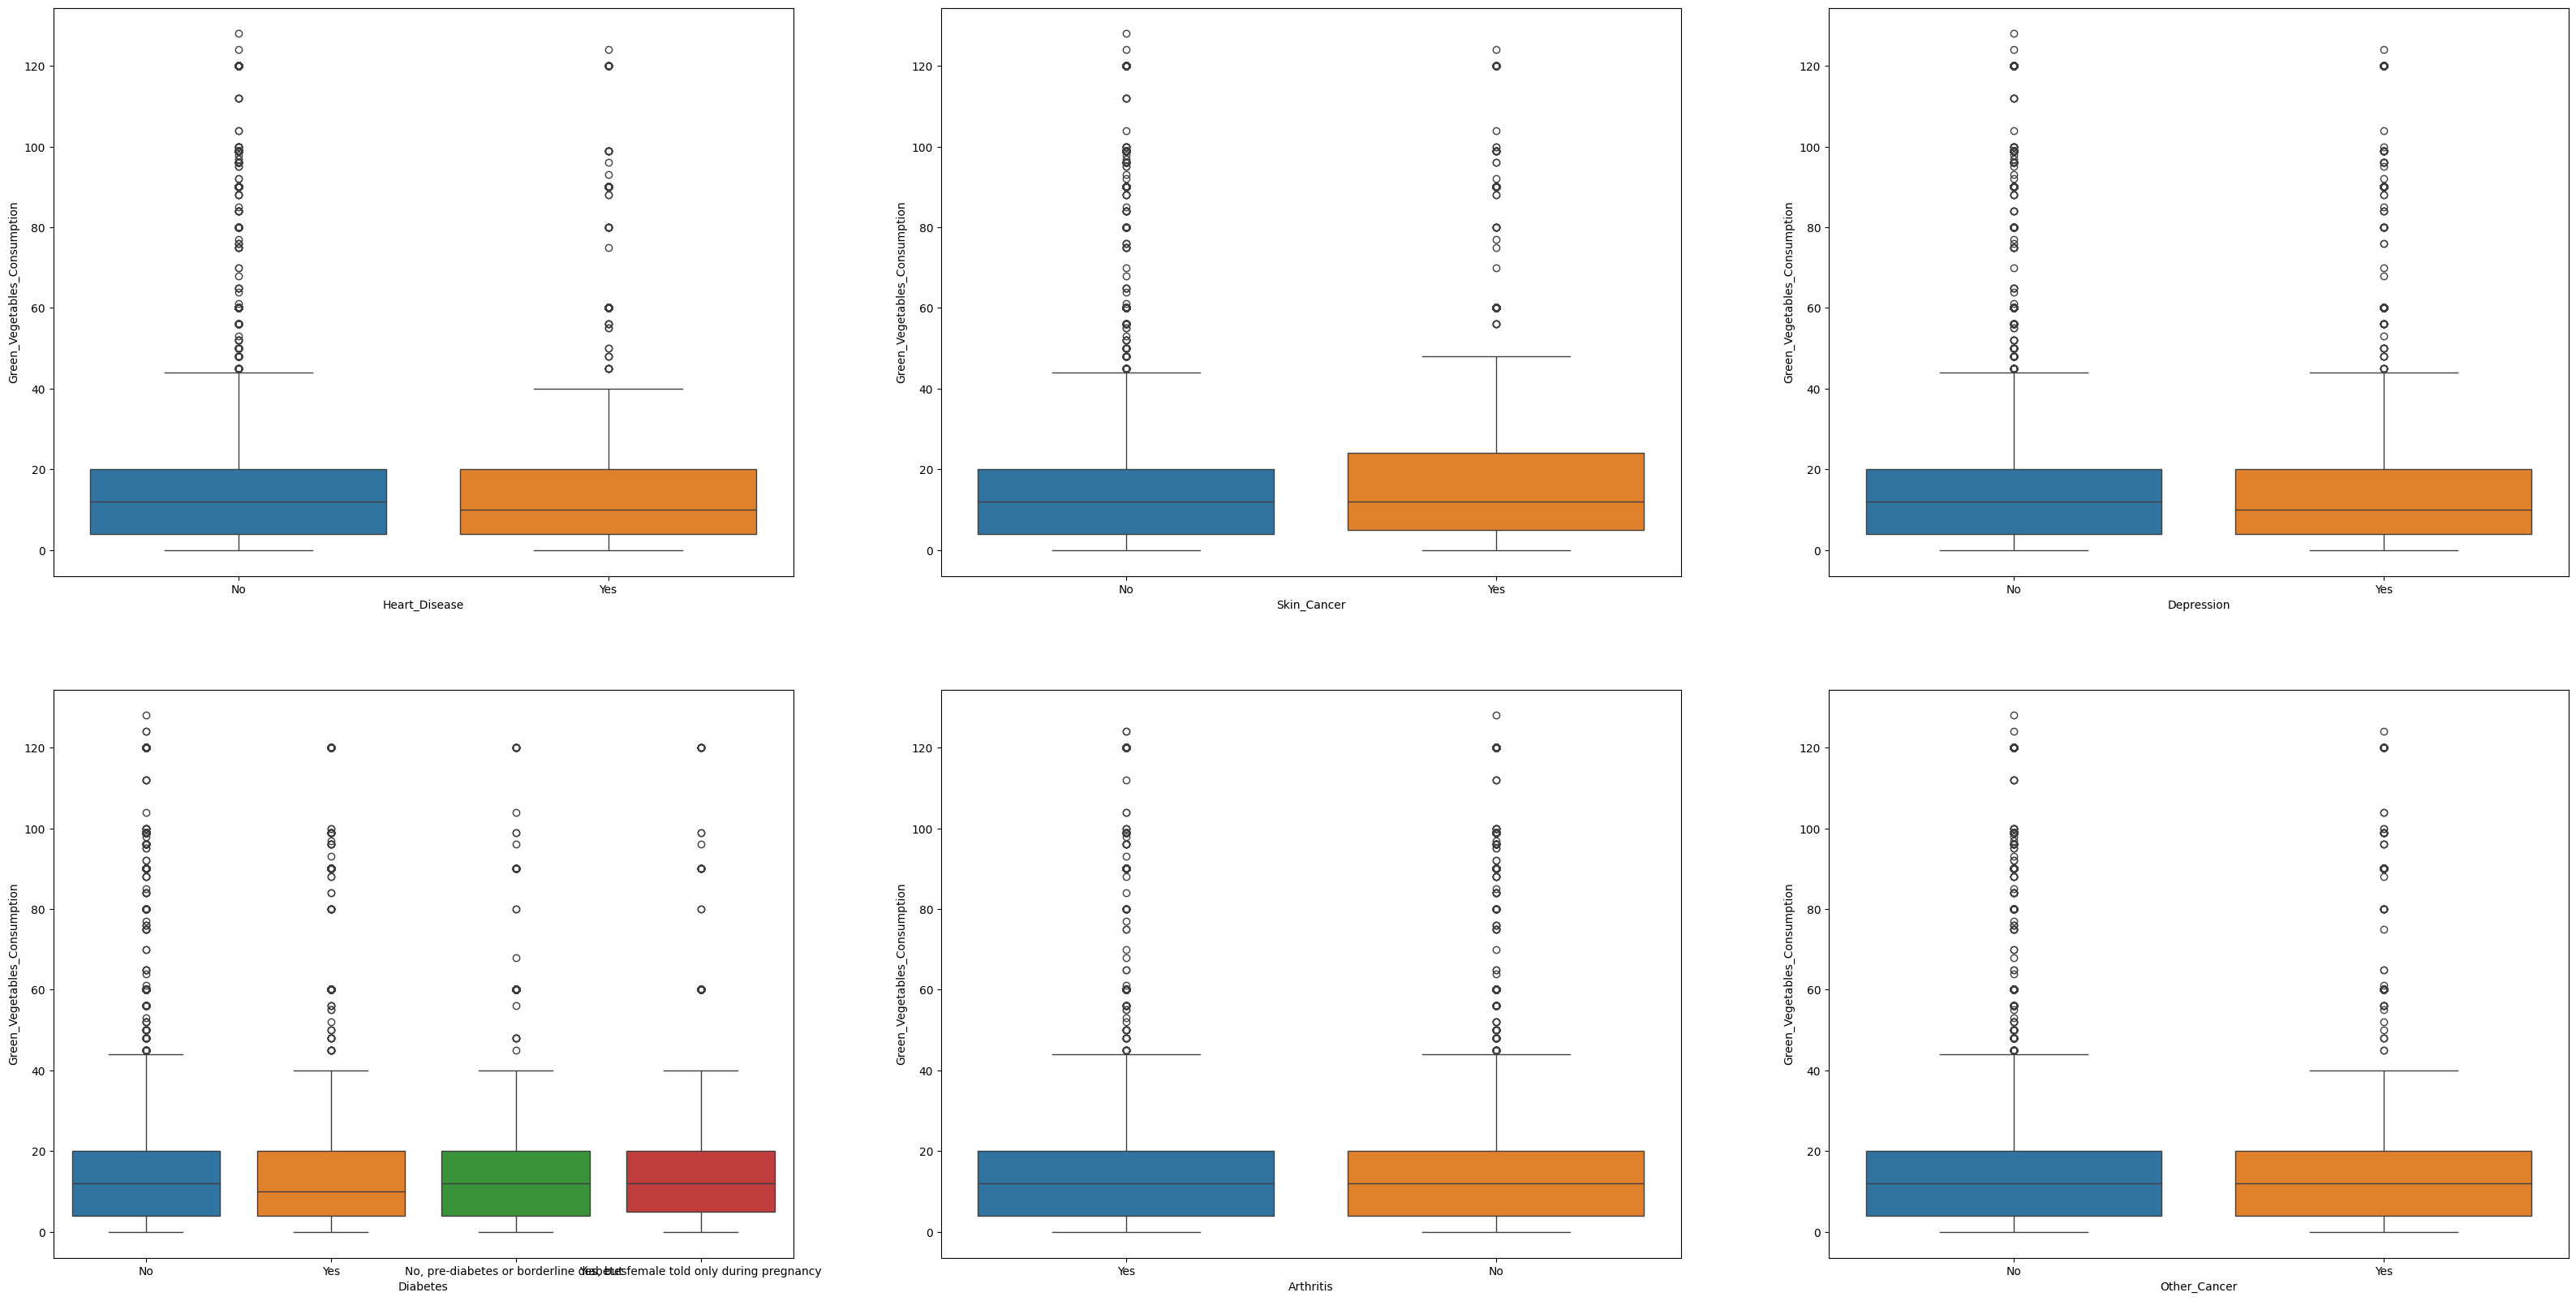

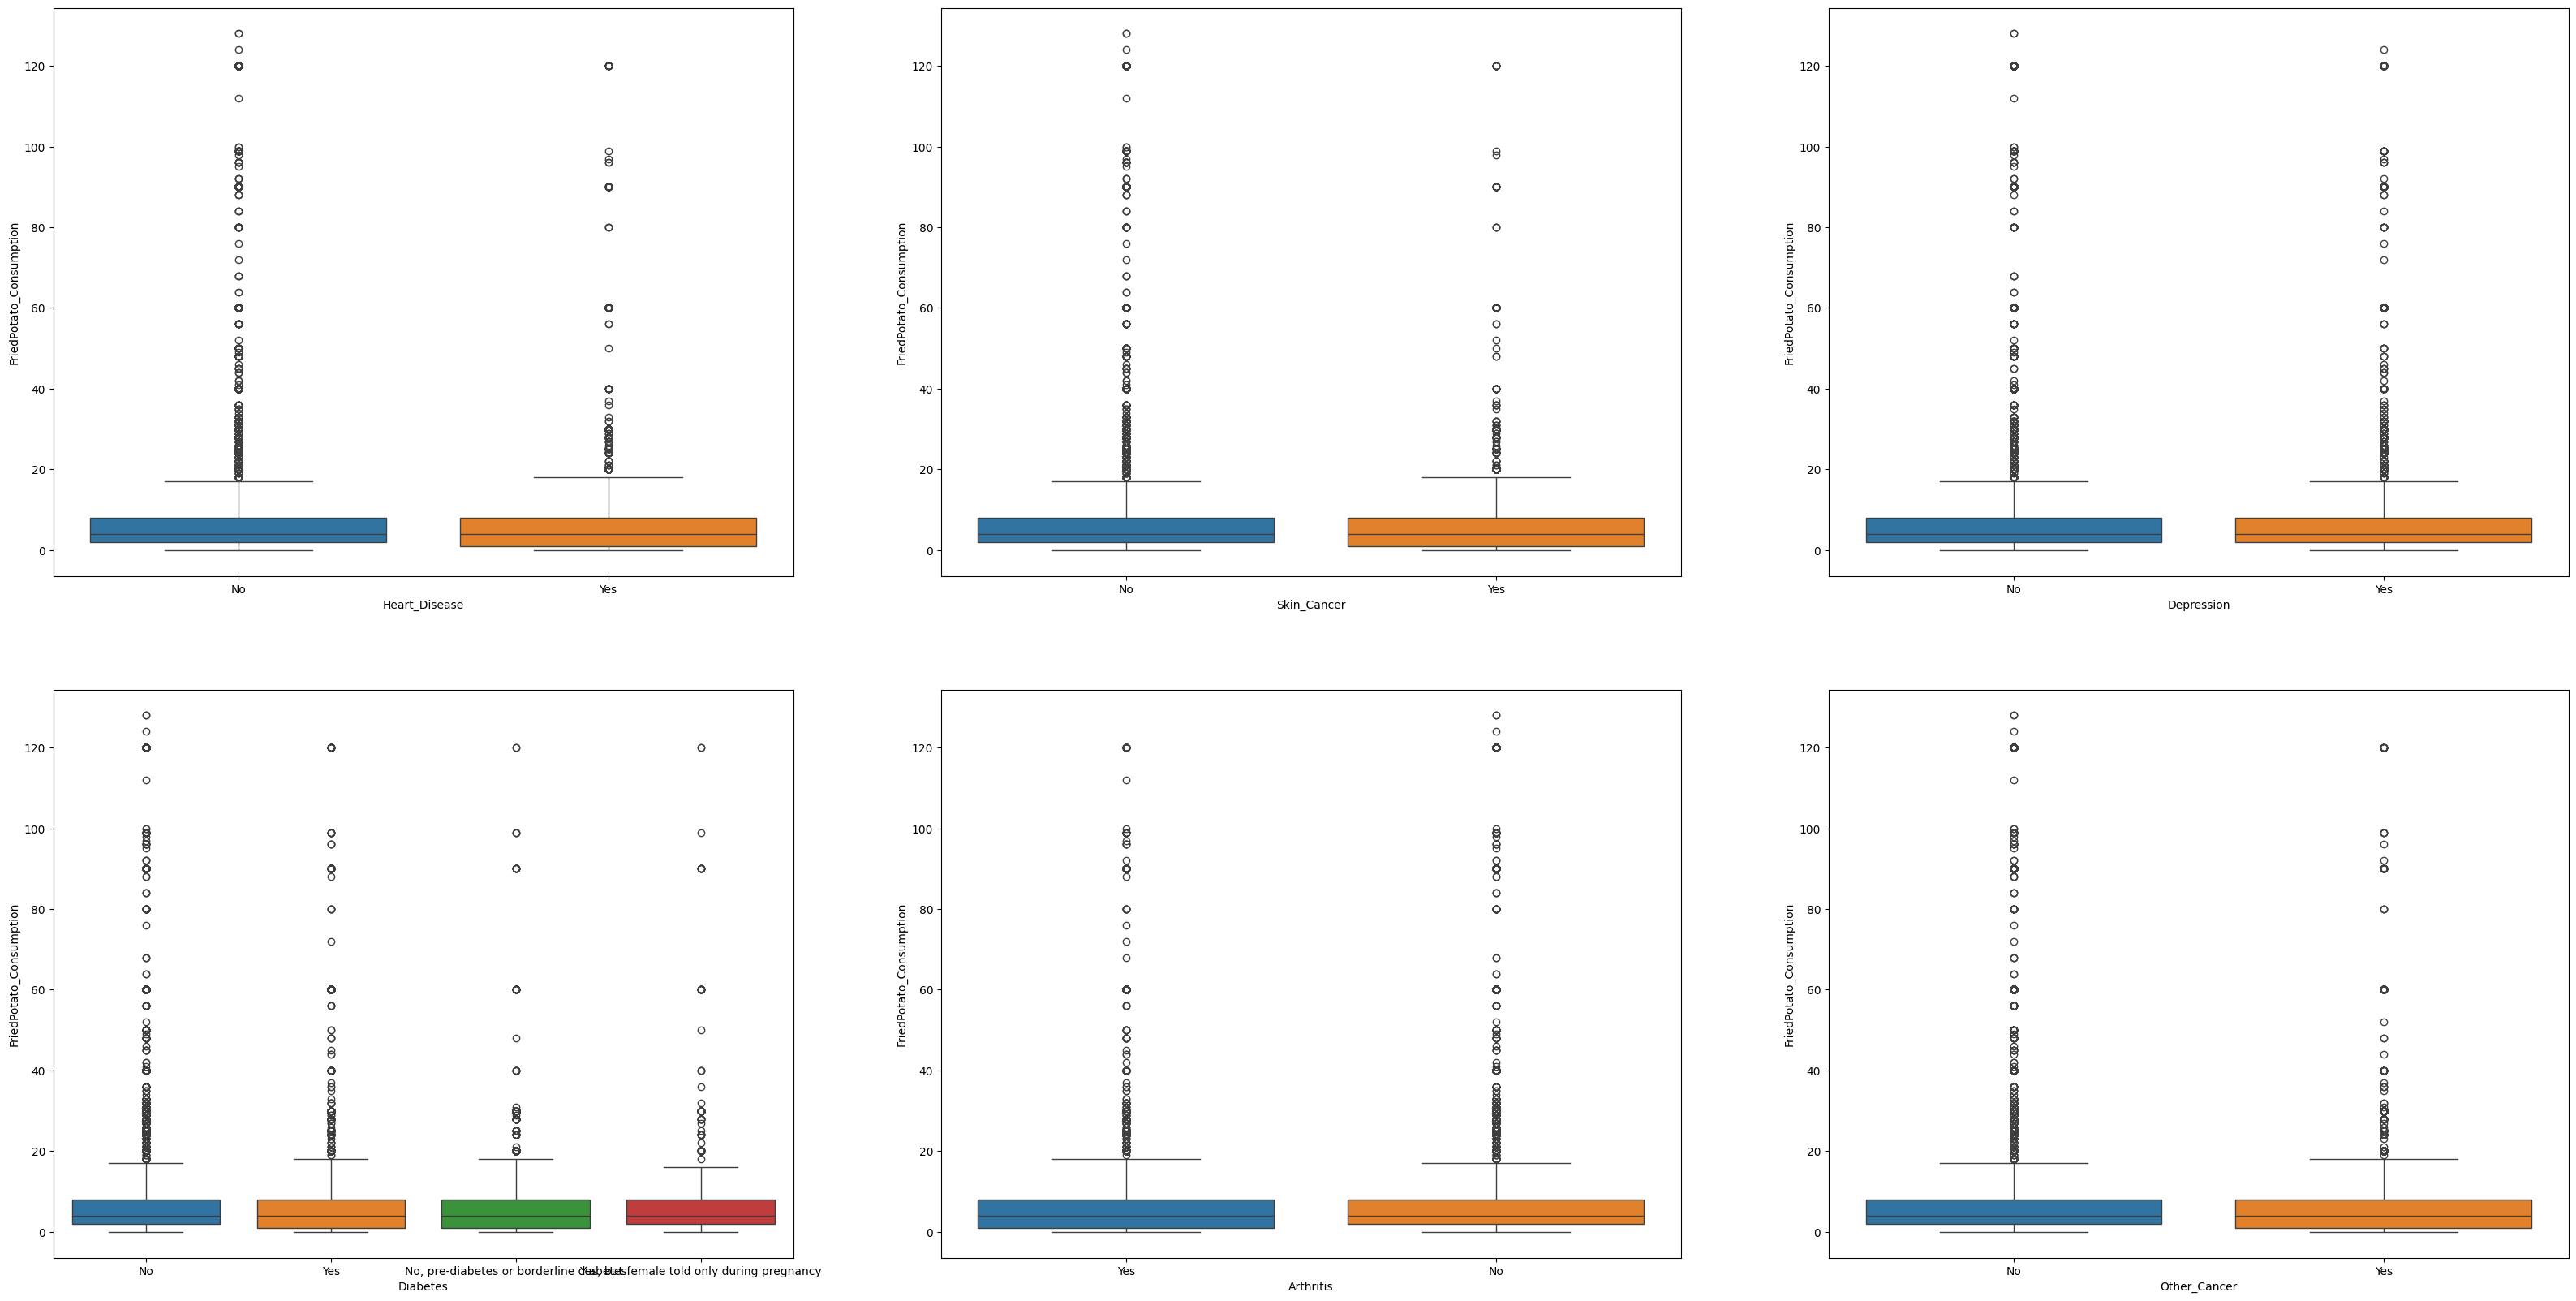

In [ ]:
for rem in remaining_num_cols:
  fig, ax = plt.subplots(2, 3, figsize = (40,20))
  k = 0
  for i, j in axes:
    sns.boxplot(x = df[focus_cols[k]], y = df[rem], ax = ax[i, j], hue = df[focus_cols[k]])
    k = k+1

In [ ]:
alc_cat = df.Alcohol_Consumption.value_counts().index

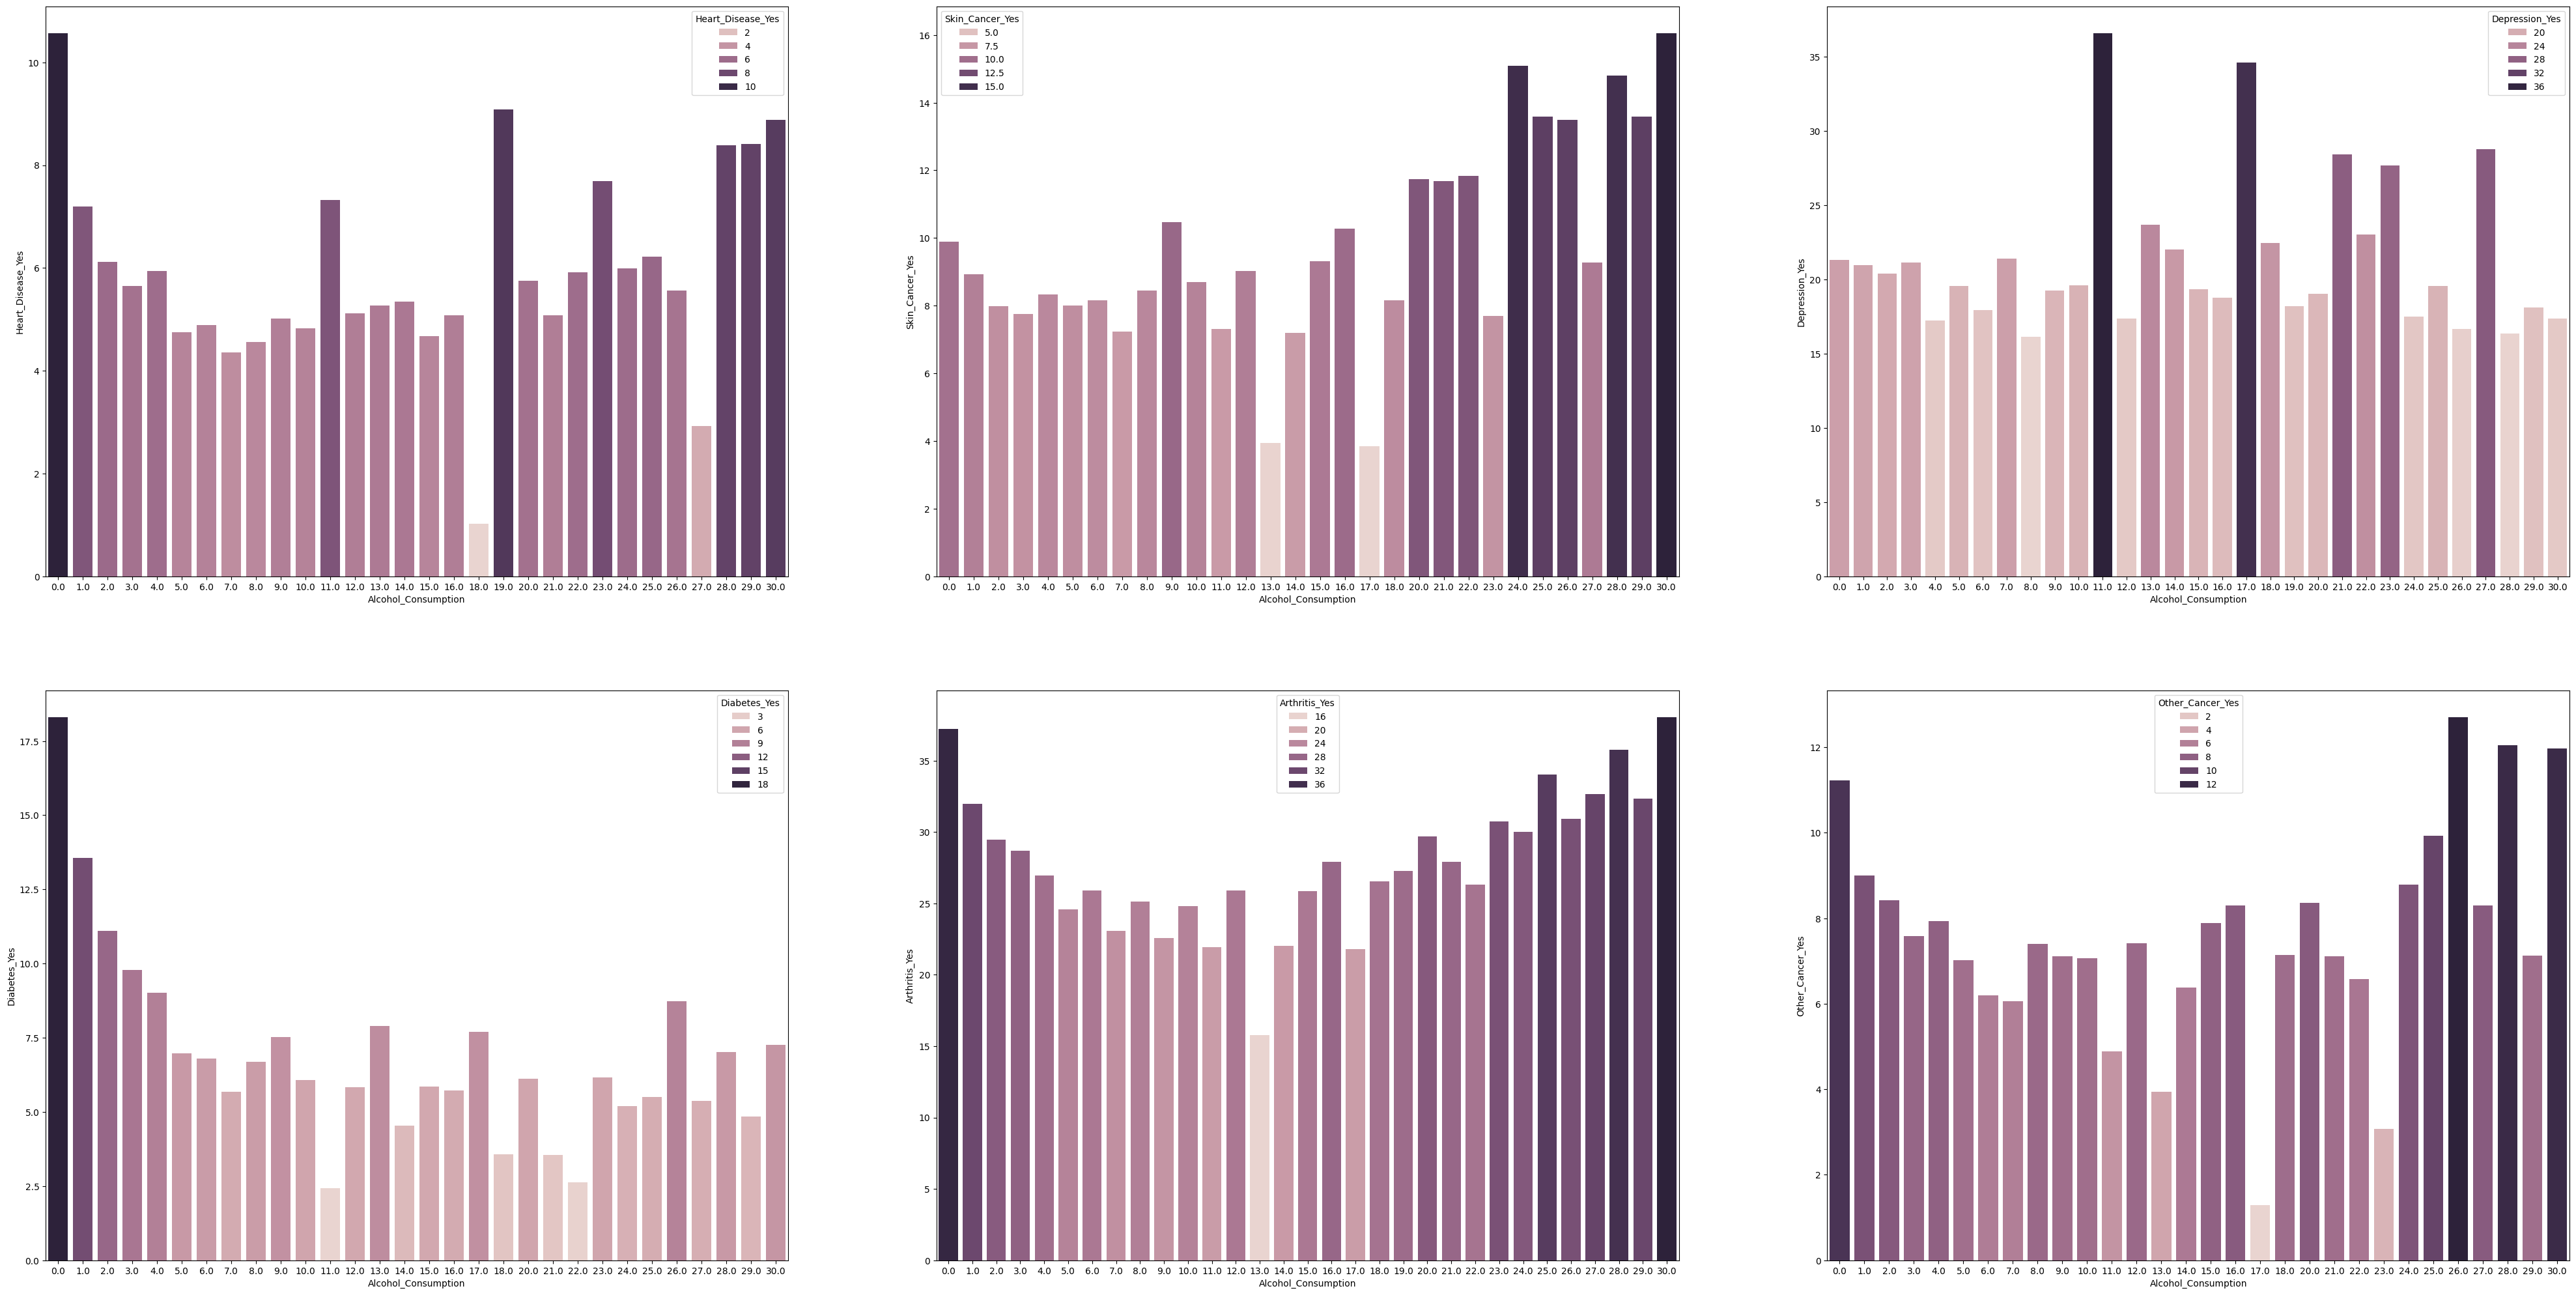

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (50,25))
k = 0
for i, j in axes:
  disease_df = pd.DataFrame(columns = ["Alcohol_Consumption", f"{focus_cols[k]}_Yes"])
  try:
    for c in range(len(alc_cat)):
      temp = df.groupby("Alcohol_Consumption")[focus_cols[k]].value_counts()[alc_cat[c]]
      try:
        disease_df.loc[c] = [alc_cat[c], ((temp/temp.sum())*100)["Yes"]]
      except:
        pass
    sns.barplot(data = disease_df, x = "Alcohol_Consumption", y = f"{focus_cols[k]}_Yes", ax = ax[i, j], hue = f"{focus_cols[k]}_Yes")
  except:
    pass
  finally:
    k = k+1



*   After treating alcohol consumption as a categorical variable, we found a random relationship between alcohol consumption and diseases.